<a href="https://colab.research.google.com/github/VenkyAdi/ML---Netflix-Movies-and-TV-Shows-Clustering-/blob/main/NetFlix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Netflix Movies and TV Shows Clustering**




##### **Project Type**    - Unsupervised Learning
##### **Contribution**    - Individual


# **Project Summary -**

In the contemporary landscape of streaming services, where competition is fierce and user expectations are continuously evolving, platforms like Netflix must continually innovate to maintain their edge. Central to this endeavor is the ability to provide personalized and relevant content recommendations, ensuring that users remain engaged and satisfied with their viewing experiences. The Netflix Dataset, comprising a vast array of movies and TV shows, serves as a treasure trove of insights that can be leveraged to enhance recommendation systems and ultimately mitigate subscriber churn.

The journey begins with data preprocessing, where meticulous attention is given to handling null values and restructuring nested columns for improved visualization. This foundational step is crucial for ensuring the integrity and usability of the dataset. Additionally, ratings are binned into distinct categories, allowing for more granular segmentation based on content suitability for different audience demographics.

Exploratory Data Analysis (EDA) serves as a compass, guiding the exploration of trends and patterns within the dataset. By delving into factors such as viewer preferences, popular genres, and regional variations in content consumption, valuable insights can be unearthed. These insights not only inform the clustering process but also provide actionable intelligence for strategic decision-making aimed at retaining subscribers.

The heart of the project lies in the application of NLP techniques to cluster content based on various attributes such as directors, cast, genres, and descriptions. Through tokenization, preprocessing, and vectorization using TF-IDF, textual data is transformed into numerical representations, enabling the application of clustering algorithms. Dimensionality reduction techniques like Principal Component Analysis (PCA) further streamline the process, enhancing computational efficiency without sacrificing information richness.

Clustering algorithms, including K-Means and Agglomerative Hierarchical Clustering, play a pivotal role in organizing the vast expanse of content into meaningful clusters. The determination of optimal cluster numbers through rigorous evaluation methods ensures that the resulting clusters are both cohesive and informative. These clusters serve as the building blocks for the subsequent development of the recommendation system.

The content-based recommender system is the culmination of the project, representing a sophisticated solution to the challenge of personalized content discovery. By leveraging cosine similarity matrices, the system is able to generate recommendations tailored to each user's unique preferences. By analyzing the similarity between a user's viewing history and the attributes of content clusters, the recommender system identifies relevant recommendations, thereby enhancing user engagement and satisfaction.

The implications of this comprehensive analysis and recommendation system extend far beyond mere algorithmic efficiency. At its core, this project is about understanding and catering to the diverse needs and preferences of Netflix's vast user base. By empowering users to discover content that resonates with them on a personal level, Netflix can forge deeper connections and foster loyalty among its subscribers.

Moreover, by mitigating subscriber churn through targeted recommendations, Netflix stands to benefit financially and strategically. A loyal and engaged user base not only translates to higher retention rates but also serves as a powerful marketing asset, driving word-of-mouth referrals and brand advocacy.

In essence, this project represents a symbiotic relationship between data science and user experience, where analytical insights are translated into tangible value for both the platform and its users. By harnessing the power of data-driven decision-making, Netflix is poised to maintain its position as a leader in the streaming entertainment industry, delighting audiences and driving sustainable growth for years to come.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The dataset comprises TV shows and movies accessible on Netflix as of 2019. Notably, a 2018 report revealed a significant trend: while Netflix's movie catalog has diminished by over 2,000 titles since 2010, the number of TV shows has surged nearly threefold during the same period. This dataset presents an intriguing opportunity to delve deeper into these trends and unearth additional insights.

Furthermore, augmenting this dataset with external sources such as IMDB ratings and Rotten Tomatoes reviews opens avenues for more comprehensive analysis. By integrating additional data points, researchers can uncover correlations between content availability, user ratings, and critical acclaim, shedding light on viewers' preferences and streaming trends. Such a holistic approach promises to unveil a wealth of insights into the dynamics of Netflix's content ecosystem and the evolving landscape of streaming entertainment.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# Import Libraries
## Data Maipulation Libraries
import numpy as np
import pandas as pd
import datetime as dt

## Data Visualisation Libraray
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go


# libraries used to process textual data
import string
string.punctuation
import nltk
nltk.download('punkt')
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# libraries used to implement clusters
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram

# Library of warnings would assist in ignoring warnings issued
import warnings;warnings.filterwarnings('ignore')
import warnings;warnings.simplefilter('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
netflix_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML - Final EDA and Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING (1).csv')

### Dataset First View

In [ ]:
# Dataset First Look
netflix_df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print('No of rows : ',netflix_df.shape[0])
print('No of columns ',netflix_df.shape[1])

No of rows :  7787
No of columns  12


### Dataset Information

In [ ]:
# Dataset Info
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate = len(netflix_df[netflix_df.duplicated()])
print('No of duplicate values : ',duplicate)


No of duplicate values :  0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_values = netflix_df.isnull().sum()
print('Missing Values',missing_values)


Missing Values show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


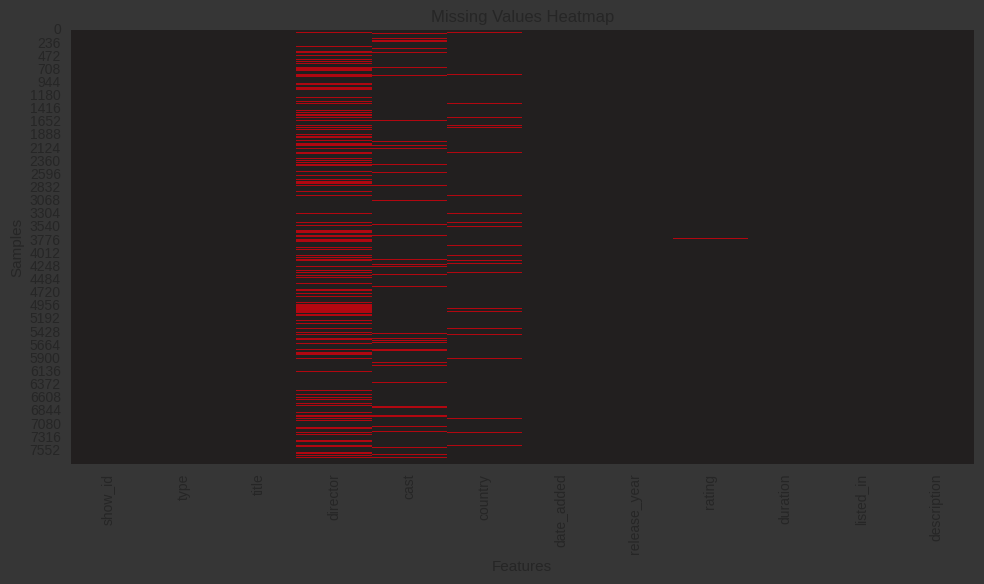

In [ ]:
import matplotlib.colors as mcolors

# Calculate missing values
missing_values = netflix_df.isnull().sum()

# Define custom colormap
colors = ['#221f1f', '#b20710']
custom_cmap = mcolors.LinearSegmentedColormap.from_list("", colors)

# Plot heatmap
plt.figure(figsize=(10, 6),facecolor = '#363636')
sns.heatmap(netflix_df.isnull(), cmap=custom_cmap, cbar=False)
plt.title('Missing Values Heatmap')
plt.xlabel('Features')
plt.ylabel('Samples')
plt.tight_layout()
plt.show()

### What did you know about your dataset?

The "Netflix Movies and TV Shows Clustering" dataset consists of 12 columns, primarily comprising categorical data. While most columns store textual information, only one column holds integer values. The dataset does not contain any duplicate entries, but it does have missing values in five columns: director, cast, country, date_added, and rating.

This dataset serves as a valuable resource for exploring trends in the vast array of movies and TV shows available on Netflix. With its diverse attributes, including genre, country of origin, and rating, it offers insights into the platform's content offerings. Moreover, it presents an opportunity for developing clustering models aimed at categorizing similar titles together. By leveraging shared attributes among the titles, such as genre and country of origin, clustering models can facilitate the discovery of patterns and trends within the Netflix content library. These clusters can potentially aid in content recommendation systems, content categorization, and understanding viewer preferences.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
netflix_col = netflix_df.columns
netflix_col_df = pd.DataFrame(netflix_col)
netflix_col_df

0
0        show_id
1           type
2          title
3       director
4           cast
5        country
6     date_added
7   release_year
8         rating
9       duration
10     listed_in
11   description

In [ ]:
# Dataset Describe
netflix_des = netflix_df
netflix_des_df = pd.DataFrame(netflix_des)
netflix_des_df.describe(include = 'all')

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   
mean       NaN    NaN   NaN                     NaN                 NaN   
std        NaN    NaN   NaN                     NaN                 NaN   
min        NaN    NaN   NaN                     NaN                 NaN   
25%        NaN    NaN   NaN                     NaN                 NaN   
50%        NaN    NaN   NaN                     NaN                 NaN   
75%        NaN    NaN   NaN                     NaN                 NaN   
max        NaN    NaN   NaN                     NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7280             7777   7787.000000   7780      7787   
unique            681             1565           NaN     14       216   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2555              118           NaN   2863      1608   
mean              NaN              NaN   2013.932580    NaN       NaN   
std               NaN              NaN      8.757395    NaN       NaN   
min               NaN              NaN   1925.000000    NaN       NaN   
25%               NaN              NaN   2013.000000    NaN       NaN   
50%               NaN              NaN   2017.000000    NaN       NaN   
75%               NaN              NaN   2018.000000    NaN       NaN   
max               NaN              NaN   2021.000000    NaN       NaN   

            listed_in                                        description  
count            7787                                               7787  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

### Variables Description


1. **show_id**: Unique identifier for each movie/show.
2. **type**: Indicates whether the entry is a movie or a TV show.
3. **title**: Name of the movie or TV show.
4. **director**: Name of the director(s) of the movie or TV show.
5. **cast**: Names of the actors and actresses featured in the movie or TV show.
6. **country**: Country or countries where the movie or TV show was produced.
7. **date_added**: Date when the movie or TV show was added to Netflix.
8. **release_year**: Year when the movie or TV show was released.
9. **rating**: TV rating or movie rating of the movie or TV show.
10. **duration**: Length of the movie or TV show in minutes or seasons.
11. **listed_in**: Categories or genres of the movie or TV show.
12. **description**: Brief synopsis or summary of the movie or TV show.



### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
unique_val = netflix_df.nunique()
unique_val_df  = pd.DataFrame(unique_val)
unique_val_df

0
show_id       7787
type             2
title         7787
director      4049
cast          6831
country        681
date_added    1565
release_year    73
rating          14
duration       216
listed_in      492
description   7769

## 3. ***Data Wrangling***

### Data Wrangling Code

**Handling Missing And Null Values**

In [ ]:
# Write your code to make your dataset analysis ready.
netflix_df[['director','cast']]=netflix_df[['director','cast']].fillna("Unknown")
netflix_df['country']=netflix_df['country'].fillna(netflix_df['country'].mode()[0])
netflix_df.dropna(axis=0, inplace=True)

In [ ]:
netflix_df["date_added"] = netflix_df['date_added']
netflix_df["date_added"] = pd.to_datetime(netflix_df['date_added'], errors='coerce')

netflix_df['day_added'] = netflix_df['date_added'].dt.day
netflix_df['month_added'] = netflix_df['date_added'].dt.month
netflix_df['month_name_added'] = netflix_df['date_added'].dt.month_name()
netflix_df['year_added'] = netflix_df['date_added'].dt.year

**Unnesting The Data**

In [ ]:
netflix_df_new = netflix_df.copy()

In [ ]:
dir_constraint=netflix_df['director'].apply(lambda x: str(x).split(', ')).tolist()
netflix_df1 = pd.DataFrame(dir_constraint, index = netflix_df['title'])
netflix_df1 = netflix_df1.stack()
netflix_df1 = pd.DataFrame(netflix_df1.reset_index())
netflix_df1.rename(columns={0:'Directors'},inplace=True)
netflix_df1 = netflix_df1.drop(['level_1'],axis=1)
netflix_df1.sample(10)

title           Directors
2978                                         Hit & Run        David Palmer
4649                         My Beautiful Broken Brain    Lotje Sodderland
7952                              Ultimate Beastmaster             Unknown
944                                 Bhaag Beanie Bhaag             Unknown
7110                               The Lady in Dignity             Unknown
5238                                         PhotoCopy        Vijay Maurya
4675  My Little Pony Equestria Girls: Friendship Games         Ishi Rudell
91                                           21 & Over         Scott Moore
2868                                           Haunted             Unknown
3588                               Katt Williams: Live  Alphonso J. Wesson

In [ ]:
cast_constraint=netflix_df['cast'].apply(lambda x: str(x).split(', ')).tolist()
netflix_df2 = pd.DataFrame(cast_constraint, index = netflix_df['title'])
netflix_df2 = netflix_df2.stack()
netflix_df2 = pd.DataFrame(netflix_df2.reset_index())
netflix_df2.rename(columns={0:'Actors'},inplace=True)
netflix_df2 = netflix_df2.drop(['level_1'],axis=1)
netflix_df2.sample(10)

title            Actors
45658                              The First Lady    Taiwo Familoni
47314                           The Last Hangover     Fábio de Luca
7319                                       Bleach     Yuki Matsuoka
44489  The Cat in the Hat Knows a Lot About That!     Jacob Ewaniuk
43830                               The Bachelors       Julie Delpy
45708                             The Five Venoms       Philip Kwok
36902                ReMastered: The Lion's Share           Unknown
53419                                  Unorthodox        Shira Haas
18173                                 Good People     Thomas Arnold
12846                               Die Ontwaking  Pete Spyropoulos

In [ ]:
# Unnesting 'listed_in' column
listed_constraint=netflix_df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
netflix_df3 = pd.DataFrame(listed_constraint, index = netflix_df['title'])
netflix_df3 = netflix_df3.stack()
netflix_df3 = pd.DataFrame(netflix_df3.reset_index())
netflix_df3.rename(columns={0:'Genre'},inplace=True)
netflix_df3 = netflix_df3.drop(['level_1'],axis=1)
netflix_df3.sample(10)

title                 Genre
15052                                      The Sleepover    Action & Adventure
5989                                          Hinterland        Crime TV Shows
4062          Dragons: Rescue Riders: Huttsgalor Holiday              Comedies
11503  Rolling Thunder Revue: A Bob Dylan Story by Ma...      Music & Musicals
15076                               The Space Between Us       Romantic Movies
14430                                       The Lift Boy                Dramas
6900                      Jen Kirkman: Just Keep Livin’?       Stand-Up Comedy
7440                                      Kiss the Girls             Thrillers
3143        Club Friday To Be Continued - Friend & Enemy             TV Dramas
2092                                Black Man White Skin  International Movies

In [ ]:
country_constraint=netflix_df['country'].apply(lambda x: str(x).split(', ')).tolist()
netflix_df4 = pd.DataFrame(country_constraint, index = netflix_df['title'])
netflix_df4 = netflix_df4.stack()
netflix_df4 = pd.DataFrame(netflix_df4.reset_index())
netflix_df4.rename(columns={0:'Country'},inplace=True)
netflix_df4 = netflix_df4.drop(['level_1'],axis=1)
netflix_df4.sample(10)

title        Country
692                Are We Done Yet?          Egypt
3959                        Justine  United States
1605   Chhota Bheem Aur Kaala Yodha  United States
7112  Super Monsters Save Christmas  United States
2378                 El desconocido  United States
7318                     The Aerial      Argentina
499       All The Reasons To Forget         Brazil
2451                Enter the Anime          Japan
2650           First Team: Juventus  United States
8848                  Triple Threat          China

In [ ]:
netflix_df5 = netflix_df2.merge(netflix_df1,on=['title'],how='inner')

# Merging listed_in with merged of (director and cast)
netflix_df6 = netflix_df5.merge(netflix_df3,on=['title'],how='inner')

# Merging country with merged of [listed_in with merged of (director and cast)]
netflix_df7 = netflix_df6.merge(netflix_df4,on=['title'],how='inner')

# Head of final merged dataframe
netflix_df7.head()

title            Actors Directors                   Genre Country
0    3%       João Miguel   Unknown  International TV Shows  Brazil
1    3%       João Miguel   Unknown               TV Dramas  Brazil
2    3%       João Miguel   Unknown     TV Sci-Fi & Fantasy  Brazil
3    3%  Bianca Comparato   Unknown  International TV Shows  Brazil
4    3%  Bianca Comparato   Unknown               TV Dramas  Brazil

In [ ]:
netflix_merge_df = netflix_df7.merge(netflix_df[['type', 'title', 'date_added', 'release_year', 'rating', 'duration','description']],on=['title'],how='left')
netflix_merge_df.head()

title            Actors Directors                   Genre Country     type  \
0    3%       João Miguel   Unknown  International TV Shows  Brazil  TV Show   
1    3%       João Miguel   Unknown               TV Dramas  Brazil  TV Show   
2    3%       João Miguel   Unknown     TV Sci-Fi & Fantasy  Brazil  TV Show   
3    3%  Bianca Comparato   Unknown  International TV Shows  Brazil  TV Show   
4    3%  Bianca Comparato   Unknown               TV Dramas  Brazil  TV Show   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2020-08-14          2020  TV-MA  4 Seasons   
2 2020-08-14          2020  TV-MA  4 Seasons   
3 2020-08-14          2020  TV-MA  4 Seasons   
4 2020-08-14          2020  TV-MA  4 Seasons   

                                         description  
0  In a future where the elite inhabit an island ...  
1  In a future where the elite inhabit an island ...  
2  In a future where the elite inhabit an island ...  
3  In a future where the elite inhabit an island ...  
4  In a future where the elite inhabit an island ...

**Binning of Rating attribute**

* **Adult Content**: TV-MA, NC-17, R
* **Children Content**:  TV-PG, PG, TV-G, G
* **Teen Content**: PG-13, TV-14
* **Family-friendly Content**: TV-Y, TV-Y7, TV-Y7-FV
* **Not Rated**: NR, UR

In [ ]:
# Binning the values in the rating column
rating_map = {'TV-MA':'Adult Content',
              'R':'Adult Content',
              'PG-13':'Teen Content',
              'TV-14':'Teen Content',
              'TV-PG':'Children Content',
              'NR':'Not Rated',
              'TV-G':'Children Content',
              'TV-Y':'Family-friendly Content',
              'TV-Y7':'Family-friendly Content',
              'PG':'Children Content',
              'G':'Children Content',
              'NC-17':'Adult Content',
              'TV-Y7-FV':'Family-friendly Content',
              'UR':'Not Rated'}

netflix_df['rating'].replace(rating_map, inplace = True)
netflix_df['rating'].unique()

array(['Adult Content', 'Teen Content', 'Children Content', 'Not Rated',
       'Family-friendly Content'], dtype=object)

**Typecasting Attributes**

In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 0 to 7786
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           7770 non-null   object        
 1   type              7770 non-null   object        
 2   title             7770 non-null   object        
 3   director          7770 non-null   object        
 4   cast              7770 non-null   object        
 5   country           7770 non-null   object        
 6   date_added        7682 non-null   datetime64[ns]
 7   release_year      7770 non-null   int64         
 8   rating            7770 non-null   object        
 9   duration          7770 non-null   object        
 10  listed_in         7770 non-null   object        
 11  description       7770 non-null   object        
 12  day_added         7682 non-null   float64       
 13  month_added       7682 non-null   float64       
 14  month_name_added  7682 non-nu

In [ ]:
netflix_df['duration']= netflix_df['duration'].apply(lambda x: int(x.split()[0]))

### What all manipulations have you done and insights you found?


1. **Handling Null Values:**
   In this initial step, we addressed missing data by employing various strategies:
   - For columns 'director' and 'cast', where missing values could indicate unknown information, we imputed the missing values with 'Unknown'.
   - For the 'country' column, we filled missing values with the mode (most frequently occurring country).
   - To preserve data integrity, we dropped rows with null values in 'date_added' and 'rating' columns, prioritizing columns with a relatively low percentage of missing values.

2. **Unnesting Nested Features:**
   Next, we focused on unnesting nested features, namely 'director', 'cast', 'listed_in', and 'country'. Unnesting involved extracting individual values from these features, storing them in separate dataframes, and then merging them back with the original dataframe using a left join. This process allowed us to isolate and analyze individual values within each feature more effectively.

3. **Typecasting and Feature Extraction:**
   In this step, we standardized data types and extracted additional features for enhanced analysis:
   - We converted the 'duration' feature into integer format, removing units such as minutes and seasons to facilitate numerical analysis.
   - The 'date_added' feature was converted to datetime format in the required standardized format.
   - Additionally, we extracted 'date', 'month', and 'year' features from 'date_added' to enable temporal analysis and visualization.

4. **Rating Categorization:**
   Recognizing the diverse ratings present in the 'rating' column, we categorized them into five bins for better interpretation:
   - **Adult**: Including ratings like TV-MA and NC-17.
   - **Restricted**: Covering ratings such as R and UR.
   - **Teen**: Encompassing PG-13 and TV-14 ratings.
   - **All Ages**: Consisting of ratings suitable for all age groups, such as TV-G, TV-Y, TV-Y7, TV-Y7-FV, PG, G, and TV-PG.
   - **Not Rated**: For entries without a specific rating (NR).

By systematically addressing missing values, standardizing data types, extracting relevant features, and categorizing ratings, we prepared the dataset for in-depth analysis and exploration of Netflix movies and TV shows. Each step contributes to a comprehensive data wrangling process aimed at enhancing data quality and facilitating meaningful analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

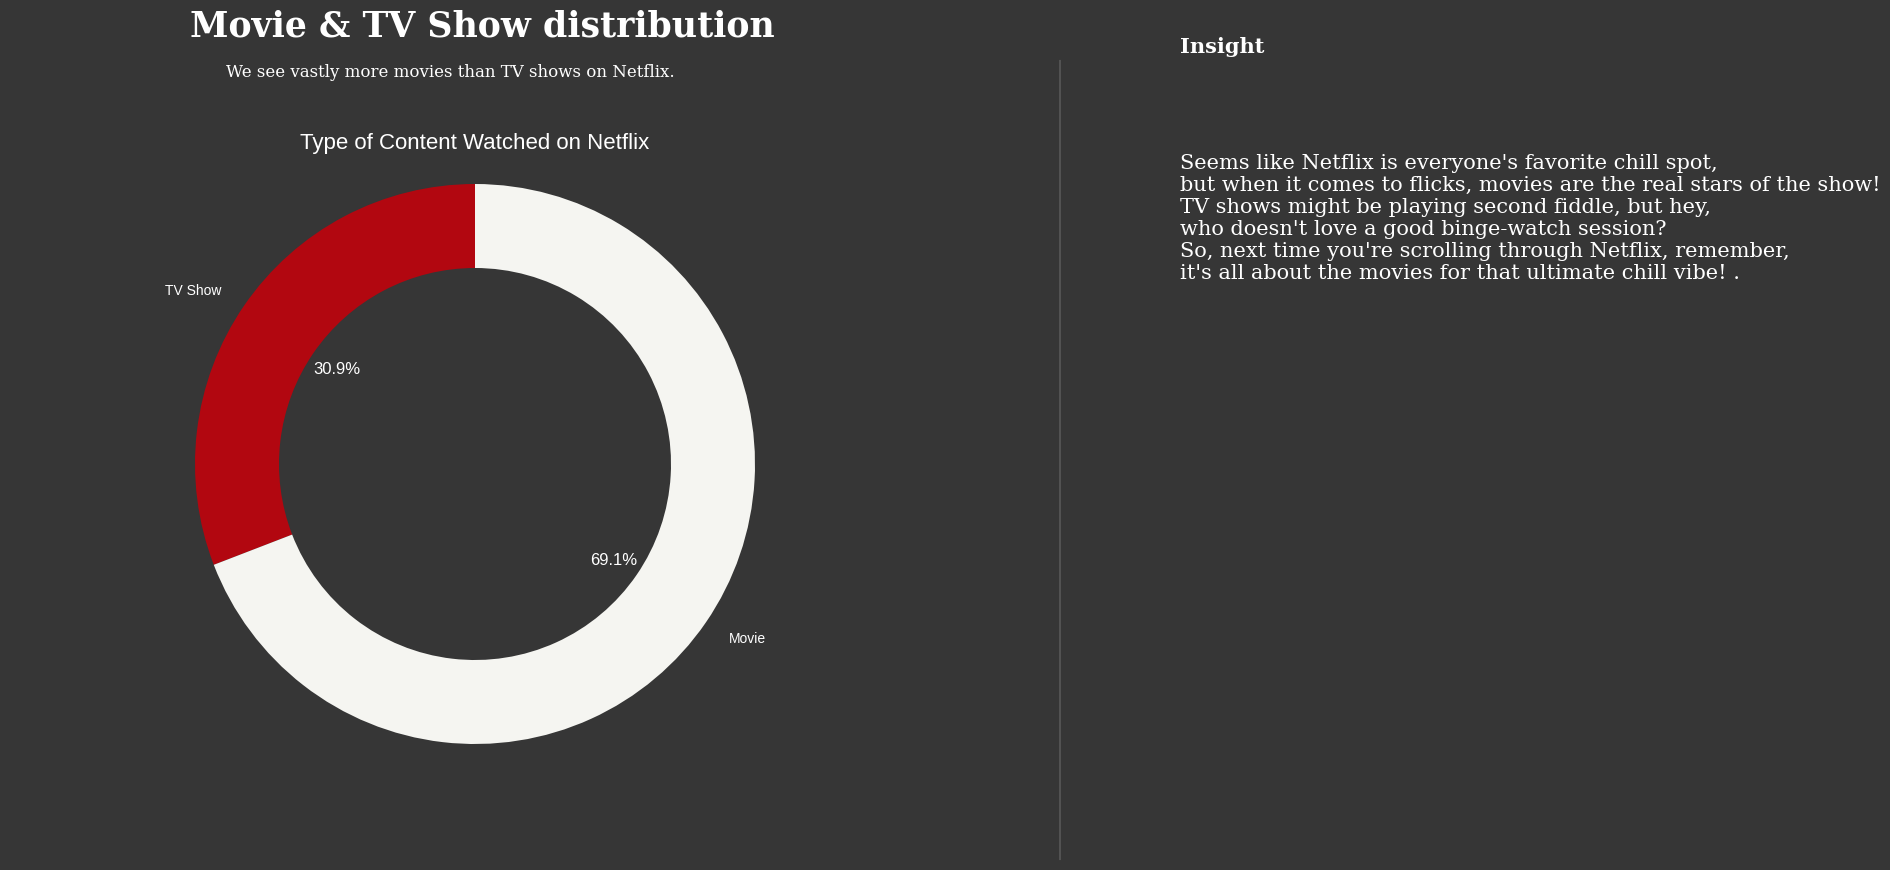

In [ ]:
# Data
labels = ['TV Show', 'Movie']
values = [netflix_df.type.value_counts()[1], netflix_df.type.value_counts()[0]]
colors = ['#b20710', '#f5f5f1']

# Create pie chart
fig, ax = plt.subplots(figsize=(12, 8), facecolor='#363636')  # Increased size and added facecolor
patches, texts, autotexts = ax.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))

# Draw a circle at the center to create a donut chart
centre_circle = plt.Circle((0, 0), 0.2, color='#363636', linewidth=0)  # Changed color
ax.add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Setting label color to white
for text in texts:
    text.set_color('white')

# Setting autopct color to white
for autotext in autotexts:
    autotext.set_color('white')

# Title
plt.title('Type of Content Watched on Netflix', fontsize=16, color='white')

# Title & Subtitle
fig.text(0.275, 1.03, 'Movie & TV Show distribution', fontfamily='serif', fontsize=25, fontweight='bold', color='white')
fig.text(0.305, 0.98, 'We see vastly more movies than TV shows on Netflix.', fontfamily='serif', fontsize=12, color='white')

# Remove spines
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

# Removing legend due to labelled plot
ax.legend().set_visible(False)

# Adding insight text
fig.text(1.1, 1.01, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif', color='white')
fig.text(1.1, 0.7, '''

Seems like Netflix is everyone's favorite chill spot,
but when it comes to flicks, movies are the real stars of the show!
TV shows might be playing second fiddle, but hey,
who doesn't love a good binge-watch session?
So, next time you're scrolling through Netflix, remember,
it's all about the movies for that ultimate chill vibe! .
''', fontsize=15, fontweight='light', fontfamily='serif', color='white')

# Adding a line
import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig, color='white', lw=0.2)
fig.lines.extend([l1])

plt.show()

##### 1. Why did you pick the specific chart?

This pie chart illustrates the proportion of TV shows and movies in the Netflix dataset. It offers a concise visual representation, showcasing the relative distribution of these two content types. Pie charts are suitable for displaying parts of a whole, making them ideal for highlighting the composition of categorical data, such as the distribution of TV shows and movies in this dataset.

##### 2. What is/are the insight(s) found from the chart?

The analysis reveals a significant prevalence of movies, constituting approximately 69.1% of the total content on Netflix, with TV shows comprising the remaining 30.9%. This insight underscores the platform's focus on movie offerings, reflecting a strategic alignment with consumer preferences for on-demand cinematic experiences. Understanding this content distribution enables informed decision-making for content acquisition, production, and platform optimization to meet evolving viewer demands and maximize engagement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Emphasizing quality movie production is imperative in a fiercely competitive market. With an abundance of content available, ensuring top-notch movie offerings enhances the production house's competitive edge and resonates with discerning audiences seeking premium entertainment experiences.

2. The relatively lower quantity of TV shows presents a lucrative business opportunity. Capitalizing on this niche segment allows for strategic content development and targeted marketing efforts, catering to audiences craving diverse and engaging episodic content. Leveraging this opportunity can drive audience engagement and foster long-term viewer loyalty, ultimately contributing to business growth and market differentiation.

#### Chart - 2

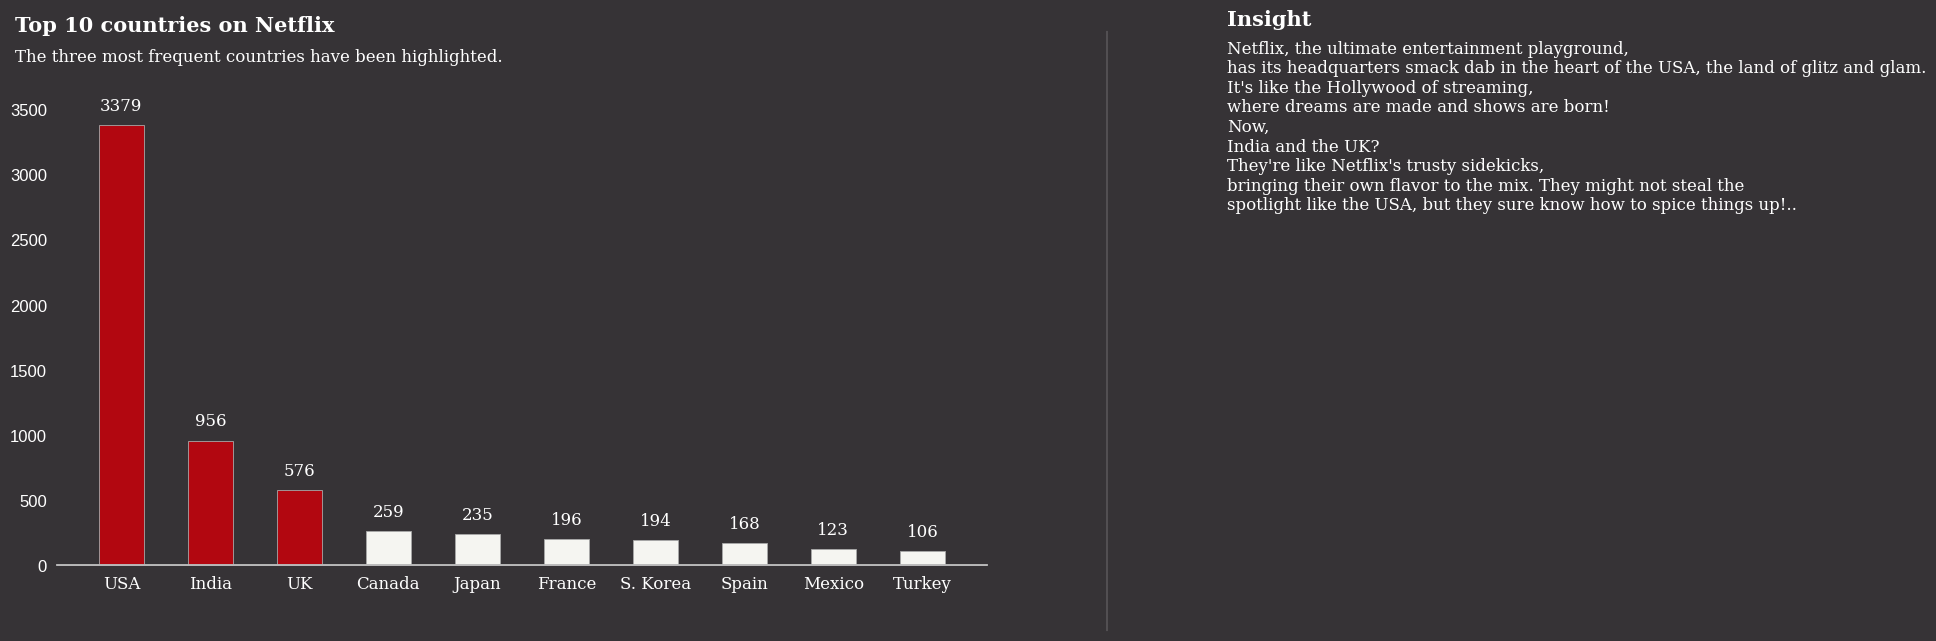

In [ ]:

netflix_df['country'] = netflix_df['country'].fillna('Unknown')

netflix_df['count'] = 1

# Lets retrieve just the first country
netflix_df['first_country'] = netflix_df['country'].apply(lambda x: x.split(",")[0])
netflix_df['first_country'].head()

# Genre

netflix_df['genre'] = netflix_df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))

# Reducing name length

netflix_df['first_country'].replace('United States', 'USA', inplace=True)
netflix_df['first_country'].replace('United Kingdom', 'UK',inplace=True)
netflix_df['first_country'].replace('South Korea', 'S. Korea',inplace=True)

data = netflix_df.groupby('first_country')['count'].sum().sort_values(ascending=False)[:10]

# Plot

color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#b20710' # color highlight

fig, ax = plt.subplots(1,1, figsize=(12, 6),facecolor="#363336")
ax.bar(data.index, data, width=0.5,
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

#annotations
for i in data.index:
    ax.annotate(f"{data[i]}",
                   xy=(i, data[i] + 150), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',color = 'white')



# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Tick labels

ax.set_xticklabels(data.index, fontfamily='serif', rotation=0,color = 'white')

# Title and sub-title

fig.text(0.09, 1, 'Top 10 countries on Netflix', fontsize=15, fontweight='bold', fontfamily='serif',color = 'white')
fig.text(0.09, 0.95, 'The three most frequent countries have been highlighted.', fontsize=12, fontweight='light', fontfamily='serif',color = 'white')

fig.text(1.1, 1.01, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif',color = 'white')

fig.text(1.1, 0.67, '''
Netflix, the ultimate entertainment playground,
has its headquarters smack dab in the heart of the USA, the land of glitz and glam.
It's like the Hollywood of streaming,
where dreams are made and shows are born!
Now,
India and the UK?
They're like Netflix's trusty sidekicks,
bringing their own flavor to the mix. They might not steal the
spotlight like the USA, but they sure know how to spice things up!..
'''
, fontsize=12, fontweight='light', fontfamily='serif',color = 'white')

ax.grid(False)

grid_y_ticks = np.arange(0, 4000, 500)
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)
ax.patch.set_facecolor('#363336')

# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)
[tick.set_color('white') for tick in ax.get_yticklabels()]


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='white',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

##### 1. Why did you pick the specific chart?

This chart provides detailed insights into the binge-watching habits of Netflix viewers across different countries. Utilizing a bar plot to represent the data offers significant advantages as it effectively categorizes the data based on countries, allowing for clear visualization and interpretation of relevant outcomes. The distinct bars enable easy comparison of binge-watching trends among various countries, facilitating actionable insights for content creators, marketers, and platform optimization strategies.

##### 2. What is/are the insight(s) found from the chart?

1. The dominance of the United States as the primary producer of both movies and TV shows on Netflix underscores the significant influence of American content on the platform.

2. India emerges as the second-largest contributor to Netflix's movie catalog, highlighting the increasing global appeal of Bollywood films.

3. Additionally, countries like Canada, France, and Japan make notable appearances in the dataset, reflecting the diverse range of content available on Netflix from around the world.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gleaned insights offer valuable avenues for Netflix's business enhancement, pointing towards strategic growth opportunities. By emphasizing investment in American and Bollywood content, Netflix can capitalize on existing strengths while broadening its global appeal. Furthermore, diversifying content acquisition to include a wider range of offerings from diverse countries like Canada, France, and Japan can enrich the platform's catalog, fostering greater viewer engagement and market expansion.

#### Chart - 3

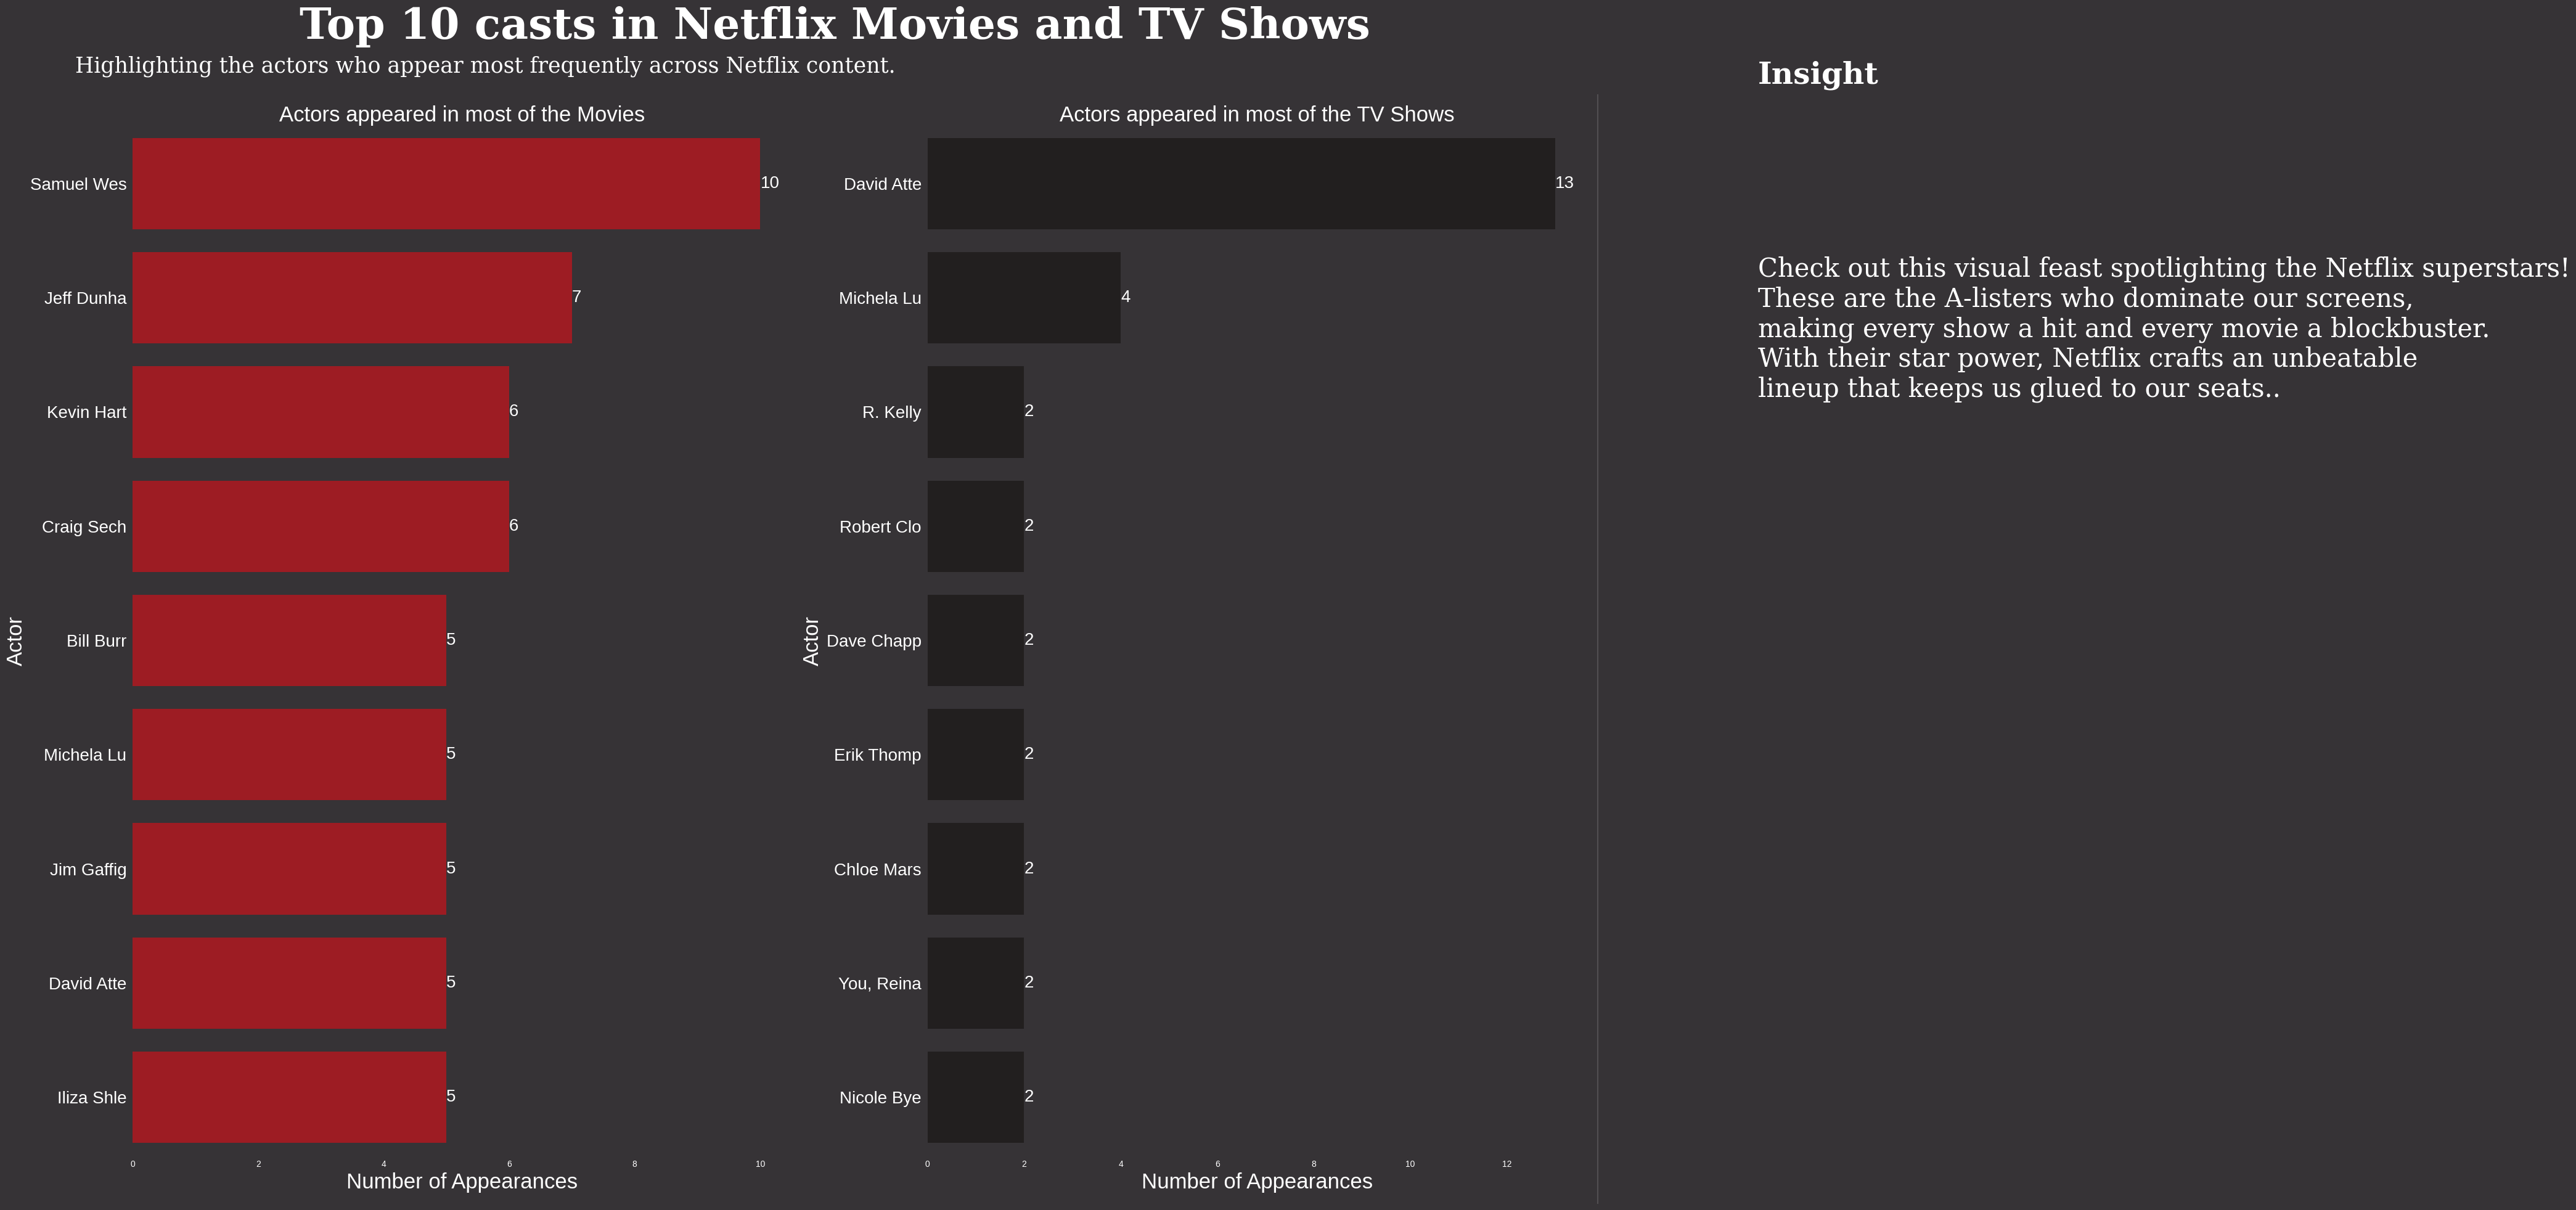

In [ ]:
# Top 10 casts in Movies and TV Shows
netflix_movies = netflix_df[netflix_df['type'] == 'Movie']
netflix_tvshows = netflix_df[netflix_df['type'] == 'TV Show']

fig, axs = plt.subplots(1, 2, figsize=(26, 18), facecolor="#363336")

# Define colors for movies and TV shows
movie_color = '#b20710'  # Red color for movies
tv_show_color = '#221f1f'  # Green color for TV shows

for ax, data, title, color in zip(axs, [netflix_movies, netflix_tvshows], ['Movies', 'TV Shows'], [movie_color, tv_show_color]):
    df_actor = data.groupby(['cast']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[1:10]
    df_actor['cast'] = df_actor['cast'].apply(lambda x: x[:10])  # Limiting cast names to 2 characters
    plots = sns.barplot(y="cast", x='title', data=df_actor, color=color, ax=ax)  # Set color here
    ax.set_title(f'Actors appeared in most of the {title}', fontsize=25,color ='white')
    ax.grid(False)
    plots.bar_label(plots.containers[0], fontsize=20,color = 'white')

    # Increase size of x and y axis labels
    ax.set_xlabel('Number of Appearances', fontsize=25,color = 'white')
    ax.set_ylabel('Actor', fontsize=25,color = 'white')
    ax.tick_params(axis='x', colors='white')
    # Increase font size of y-axis labels
    ax.tick_params(axis='y', labelsize=20)
    [tick.set_color('white') for tick in ax.get_yticklabels()]
    ax.patch.set_facecolor('#363336')
    # Additional constraints
    for s in ['top', 'left', 'right', 'bottom']:
        ax.spines[s].set_visible(False)

# Title and sub-title
fig.text(0.19, 1.05, 'Top 10 casts in Netflix Movies and TV Shows', fontsize=50, fontweight='bold', fontfamily='serif',color = 'white')
fig.text(0.05, 1.02, 'Highlighting the actors who appear most frequently across Netflix content.', fontsize=25, fontweight='light', fontfamily='serif',color ='white')

fig.text(1.1, 1.01, 'Insight', fontsize=35, fontweight='bold', fontfamily='serif',color = 'white')

fig.text(1.1, 0.7, '''
Check out this visual feast spotlighting the Netflix superstars!
These are the A-listers who dominate our screens,
making every show a hit and every movie a blockbuster.
With their star power, Netflix crafts an unbeatable
lineup that keeps us glued to our seats..
''', fontsize=30, fontweight='light', fontfamily='serif',color = 'white')

# Add parallel line
import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig, color='white', lw=0.2)
fig.lines.extend([l1])

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Identifying the most popular actors on Netflix provides valuable insights into audience preferences. By analyzing viewer engagement with content featuring specific actors, Netflix can tailor its content offerings to maximize viewer satisfaction and retention. This understanding enables Netflix to strategically cast actors who resonate with its audience, ultimately contributing to the platform's success and growth.

##### 2. What is/are the insight(s) found from the chart?

Actors like David Atlee and Michela Lu emerge as prominent figures across both movie and TV show content on Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights on popular actors in movies and TV shows can inform casting decisions, potentially increasing viewer interest and retention. However, relying too heavily on a small pool of actors may lead to a lack of diversity and vulnerability if their popularity wanes. To ensure sustained growth, Netflix should strive for a balance between leveraging popular actors and fostering diversity by exploring new talent and varied casting choices.

#### Chart - 4

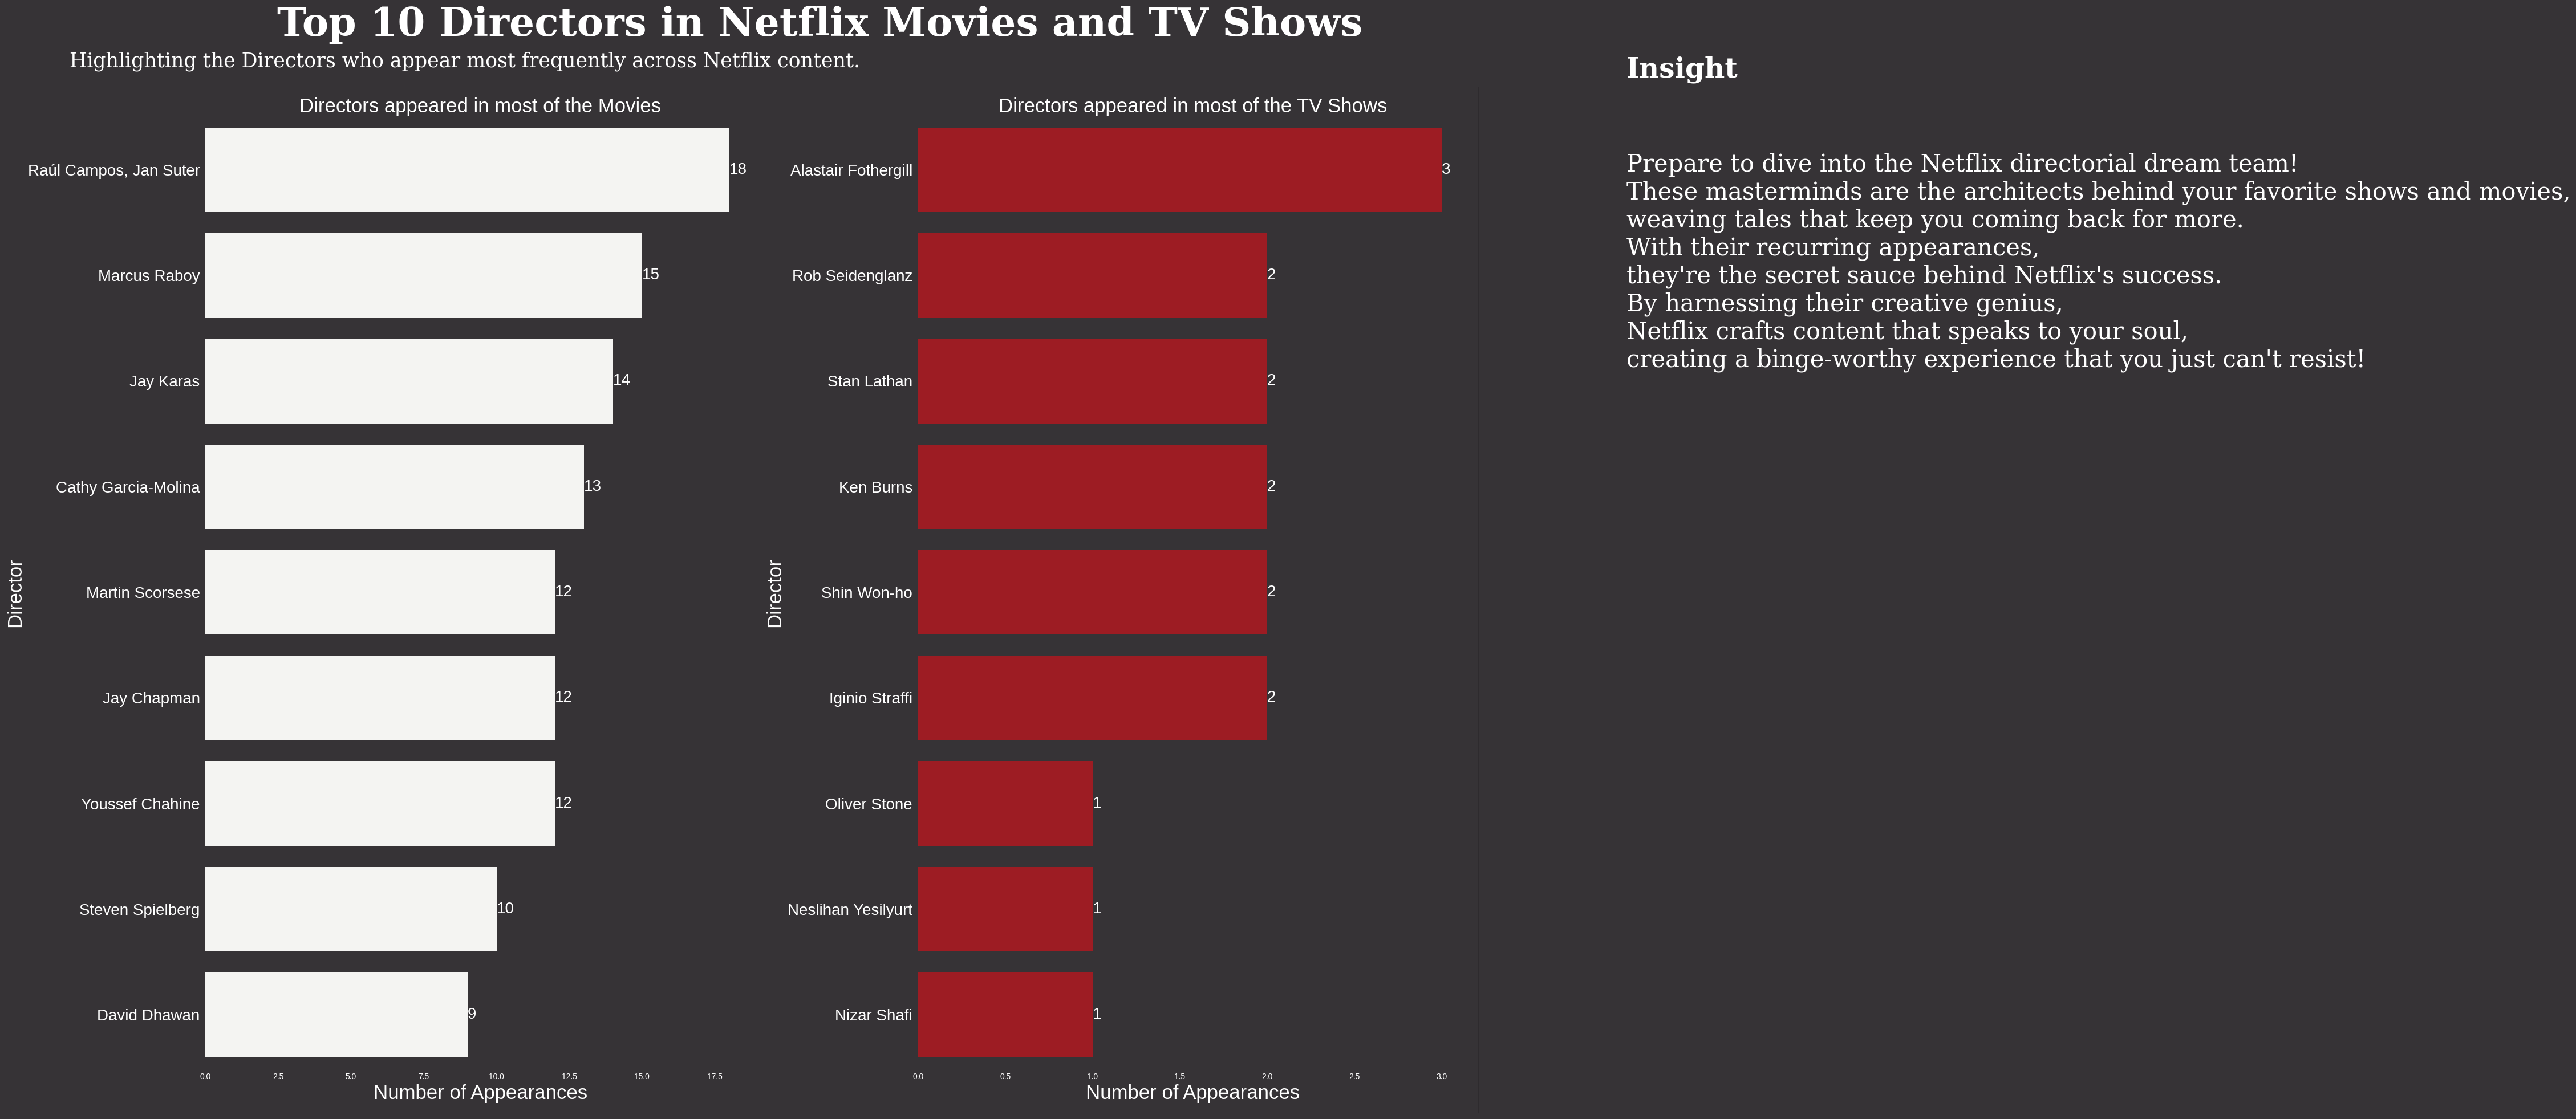

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 casts in Movies and TV Shows
netflix_movies = netflix_df[netflix_df['type'] == 'Movie']
netflix_tvshows = netflix_df[netflix_df['type'] == 'TV Show']

fig, axs = plt.subplots(1, 2, figsize=(26, 18), facecolor="#363336")

# Define colors for movies and TV shows
movie_color = '#f5f5f1'
tv_show_color = '#b20710'

for ax, data, title, color in zip(axs, [netflix_movies, netflix_tvshows], ['Movies', 'TV Shows'], [movie_color, tv_show_color]):
    df_director = data.groupby(['director']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[1:10]
    plots = sns.barplot(y="director", x='title', data=df_director, color=color, ax=ax)  # Set color here
    ax.set_title(f'Directors appeared in most of the {title}', fontsize=25, color='white')
    ax.grid(False)
    plots.bar_label(plots.containers[0], fontsize=20, color='white')

    # Increase size of x and y axis labels
    ax.set_xlabel('Number of Appearances', fontsize=25, color='white')
    ax.set_ylabel('Director', fontsize=25, color='white')

    # Increase font size of y-axis labels
    ax.tick_params(axis='y', labelsize=20)

    # Set background color behind the bar plots
    ax.patch.set_facecolor('#363336')

    # Set x-axis tick labels color to white
    ax.tick_params(axis='x', colors='white')

    # Set y-axis tick labels color to white
    [tick.set_color('white') for tick in ax.get_yticklabels()]

    # Additional constraints
    for s in ['top', 'left', 'right', 'bottom']:
        ax.spines[s].set_visible(False)

# Title and sub-title
fig.text(0.19, 1.05, 'Top 10 Directors in Netflix Movies and TV Shows', fontsize=50, fontweight='bold', fontfamily='serif', color='white')
fig.text(0.05, 1.02, 'Highlighting the Directors who appear most frequently across Netflix content.', fontsize=25, fontweight='light', fontfamily='serif', color='white')

fig.text(1.1, 1.01, 'Insight', fontsize=35, fontweight='bold', fontfamily='serif', color='white')

fig.text(1.1, 0.7, '''
Prepare to dive into the Netflix directorial dream team!
These masterminds are the architects behind your favorite shows and movies,
weaving tales that keep you coming back for more.
With their recurring appearances,
they're the secret sauce behind Netflix's success.
By harnessing their creative genius,
Netflix crafts content that speaks to your soul,
creating a binge-worthy experience that you just can't resist!
''', fontsize=30, fontweight='light', fontfamily='serif', color='white')

# Add parallel line
import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig, color='black', lw=0.2)
fig.lines.extend([l1])
ax.grid(False)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Analyzing the popularity of directors in movies and TV shows can provide valuable insights into audience preferences and content trends on Netflix. By examining factors such as viewer ratings, viewer engagement, and critical acclaim, Netflix can identify directors who resonate strongly with audiences in each category. This information can then be used to inform content acquisition decisions, production strategies, and marketing efforts. For example, if certain directors consistently receive high ratings and positive reviews for their movies, Netflix may prioritize acquiring their films or collaborating with them on original content. Similarly, recognizing directors who excel in the realm of TV shows can help Netflix develop targeted programming that appeals to specific viewer demographics and interests. Overall, understanding the popularity of directors in movies and TV shows enables Netflix to curate a diverse and engaging content library that caters to the preferences of its global audience.

##### 2. What is/are the insight(s) found from the chart?

The analysis reveals that **Raul Campos and Jan Suter** emerges as the predominant director for movies on Netflix, indicating a significant presence and perhaps a strong audience following in the realm of cinematic storytelling. This insight suggests that Suter's films have garnered considerable attention and viewership, potentially due to factors such as compelling narratives, unique visual styles, or successful marketing strategies. As a result, Netflix could capitalize on Suter's popularity by featuring more of their films or exploring opportunities for exclusive collaborations, leveraging their appeal to enhance the platform's movie offerings and attract a broader audience base.

On the other hand, **Alastair fothergill** stands out as the primary director for TV shows on Netflix, signifying a notable influence and recognition within the television landscape. Burns' prominence in TV show direction suggests a track record of delivering captivating and culturally significant content that resonates with viewers. This observation underscores the importance of high-quality storytelling and production values in driving audience engagement and retention for TV programming on Netflix. Leveraging Burns' expertise and reputation could enable Netflix to curate a diverse array of compelling TV shows that cater to varied viewer interests and preferences, further enhancing the platform's appeal and competitiveness in the streaming market.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights on popular directors in movies and TV shows can positively influence content decisions, enhancing audience engagement and retention. However, overreliance on a few directors may limit diversity and pose a risk if their popularity declines. To sustain growth, Netflix should balance using popular directors with diversifying content and nurturing emerging talent.

#### Chart - 5

There are 20 types in the Netflix Movie Dataset


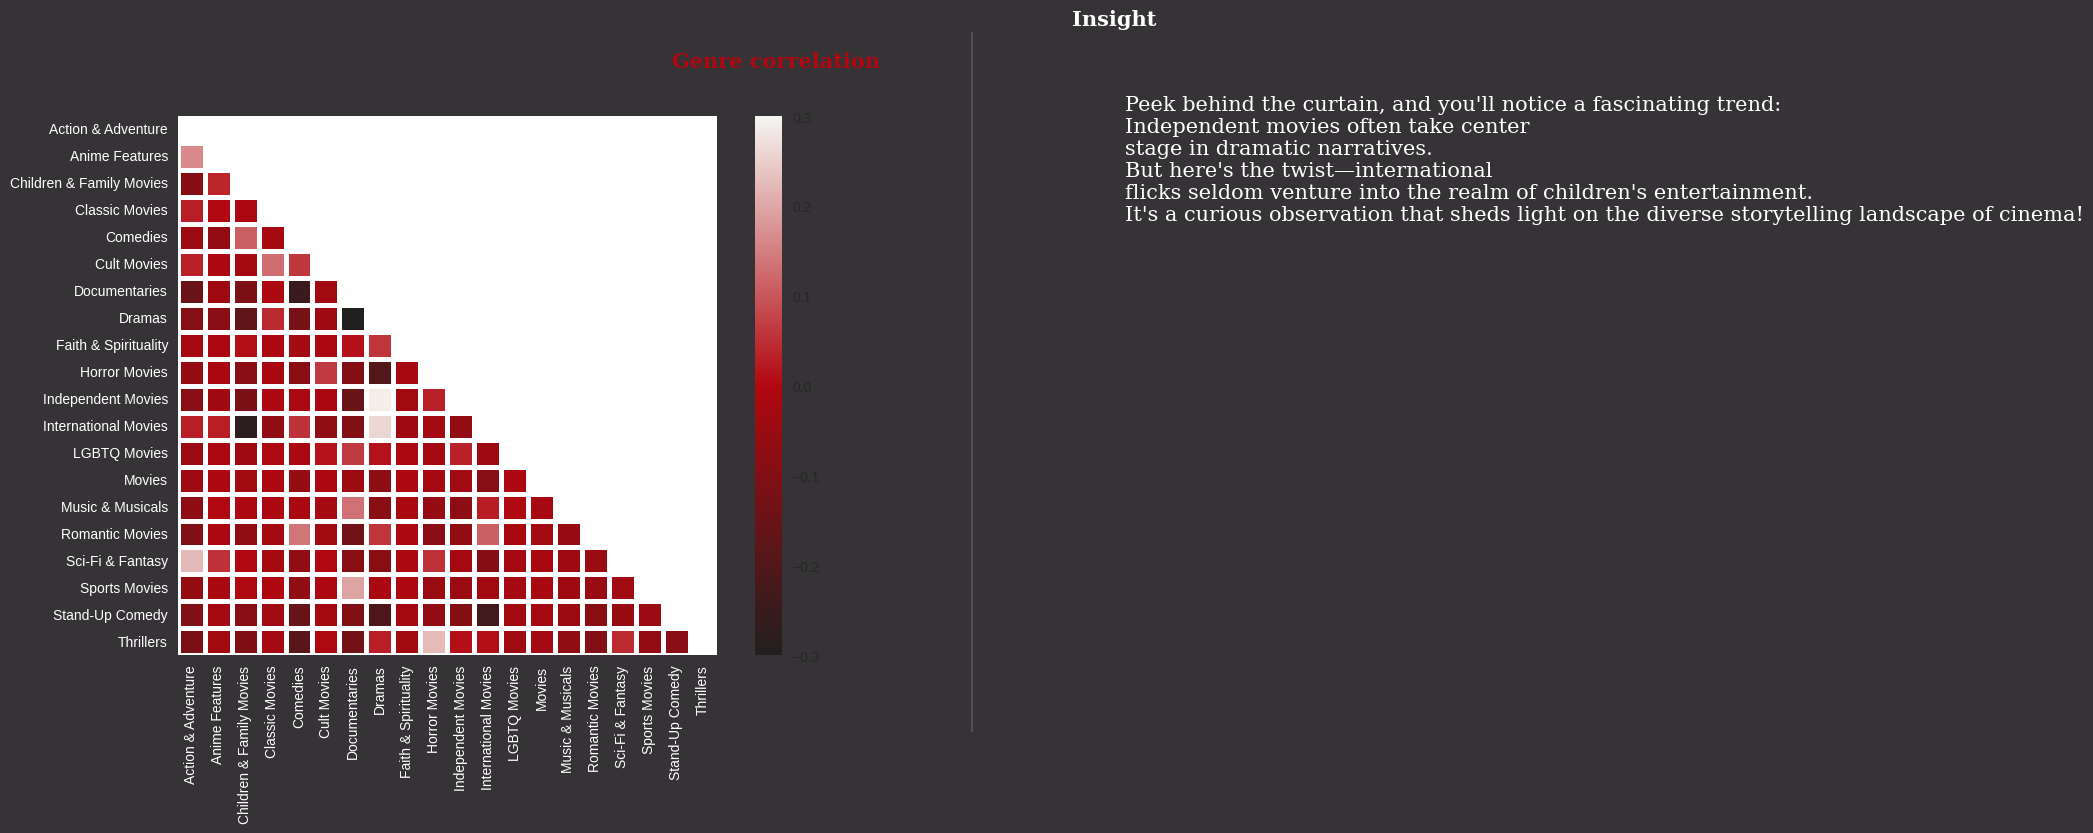

In [ ]:
# Genres
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.colors

# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710', '#f5f5f1'])

def genre_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x: x.replace(' ,', ',').replace(', ', ',').split(','))
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print("There are {} types in the Netflix {} Dataset".format(len(Types), title))
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(10, 7), facecolor="#363336")
    fig.text(.70, .95, 'Genre correlation', fontfamily='serif', fontweight='bold', fontsize=15,color = '#b20710')
    pl = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, vmin=-.3, center=0, square=True, linewidths=2.5)

    # Customize x-axis and y-axis labels color
    pl.set_xticklabels(pl.get_xticklabels(), color='white')
    pl.set_yticklabels(pl.get_yticklabels(), color='white')

    ax.grid(False)

    fig.text(1.1, 1.01, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif', color='white')

    fig.text(1.1, 0.7, '''
        Peek behind the curtain, and you'll notice a fascinating trend:
        Independent movies often take center
        stage in dramatic narratives.
        But here's the twist—international
        flicks seldom venture into the realm of children's entertainment.
        It's a curious observation that sheds light on the diverse storytelling landscape of cinema!
             ''', fontsize=15, fontweight='light', fontfamily='serif', color='white')

    import matplotlib.lines as lines
    l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig, color='white', lw=0.2)
    fig.lines.extend([l1])
    ax.grid(False)
    plt.show()

df_tv = netflix_df[netflix_df["type"] == "TV Show"]
df_movies = netflix_df[netflix_df["type"] == "Movie"]

genre_heatmap(df_movies, 'Movie')

##### 1. Why did you pick the specific chart?

I chose the specific chart because it provides insights into the correlation between different genres in the Netflix dataset, which can help identify patterns and trends in viewer preferences. Additionally, the heatmap visualization effectively highlights the strength and direction of these correlations using color gradients, making it easier to interpret the relationships between genres.

##### 2. What is/are the insight(s) found from the chart?

The heatmap reveals interesting insights into the correlation between different genres in the Netflix movie dataset. One notable observation is that independent movies often dominate dramatic narratives, indicating a strong association between these two genres. However, it's intriguing to note that international films rarely intersect with children's entertainment, suggesting distinct storytelling preferences across cultures. This diversity in genre preferences underscores the rich and varied landscape of cinematic storytelling on Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the genre correlation heatmap can indeed contribute to creating a positive business impact for Netflix. By understanding the interplay between different genres, Netflix can tailor its content acquisition and production strategies to better meet the diverse preferences of its global audience. For example, recognizing the strong correlation between independent movies and dramatic narratives could inform Netflix's investment decisions in acquiring or producing such content, potentially leading to increased viewership and subscriber satisfaction.

However, there are also potential insights that could lead to negative growth if not addressed properly. For instance, the observation that international films rarely intersect with children's entertainment genres may indicate a gap in Netflix's content offerings for certain demographics. Neglecting to bridge this gap could result in decreased engagement and subscriber retention among families and viewers interested in children's content. Therefore, it's essential for Netflix to use these insights to diversify its content library strategically and ensure it caters to a wide range of audience preferences, thereby mitigating the risk of negative growth.

#### Chart - 6

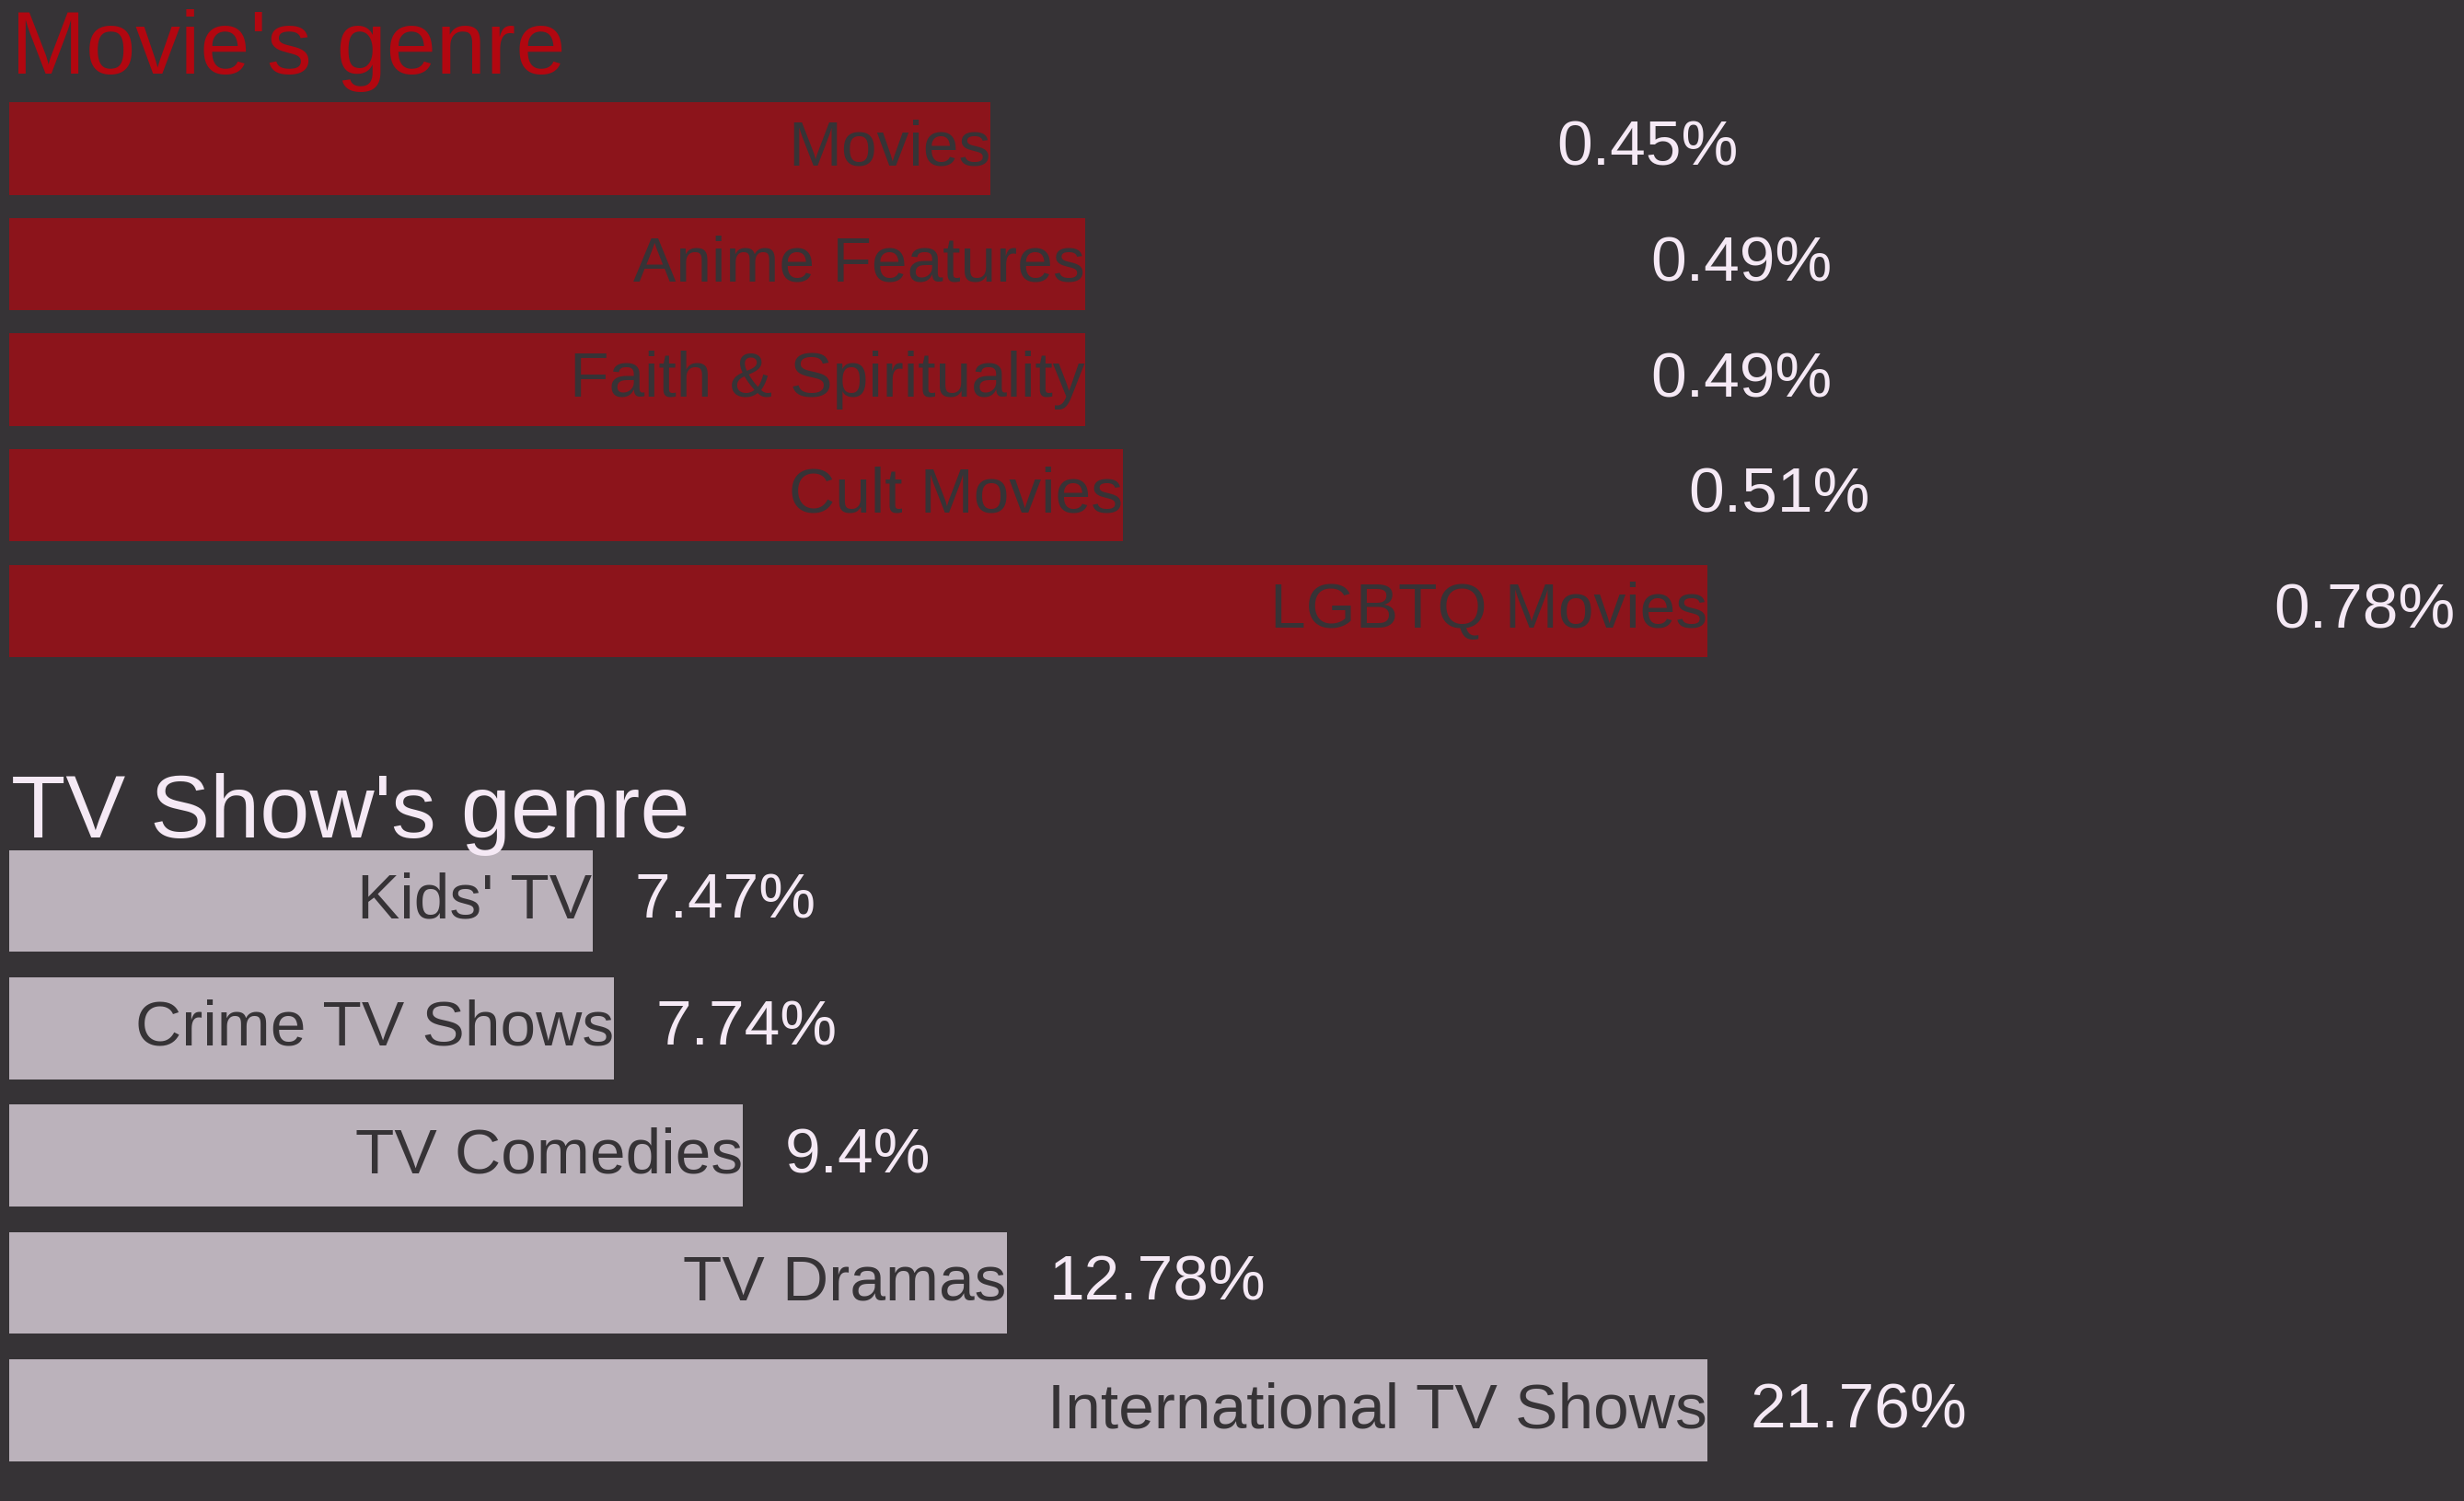

In [ ]:
from collections import Counter
import matplotlib.gridspec as gridspec

movie_genre = []
TV_genre = []

for index, row in netflix_df.iterrows():
    genres = row['listed_in'].split(", ")
    if row['type'] == 'TV Show':
        TV_genre.extend(genres)
    else:
        movie_genre.extend(genres)

movie_genre_counts = Counter(movie_genre)
TV_genre_counts = Counter(TV_genre)

movie_genre_df = pd.DataFrame(movie_genre_counts.items(), columns=['genre', 'movie_count'])
TV_genre_df = pd.DataFrame(TV_genre_counts.items(), columns=['genre', 'tv_count'])

movie_genre_df = movie_genre_df.sort_values(by='movie_count', ascending=False).reset_index(drop=True)
TV_genre_df = TV_genre_df.sort_values(by='tv_count', ascending=False).reset_index(drop=True)

movie_genre_df['per'] = round(movie_genre_df['movie_count'] / movie_genre_df['movie_count'].sum() * 100, 2)
TV_genre_df['per'] = round(TV_genre_df['tv_count'] / TV_genre_df['tv_count'].sum() * 100, 2)

fig, ax = plt.subplots(figsize=(25,20), facecolor="#363336")
ax.patch.set_facecolor('#363336')
spec = gridspec.GridSpec(ncols=21, nrows=23, figure=fig)
ax1 = fig.add_subplot(spec[:10, :], facecolor="#363336")
ax2 = fig.add_subplot(spec[12:,:], facecolor="#363336")

ax1.barh(y=movie_genre_df['genre'][-5:], width=movie_genre_df['movie_count'][-5:], color='#b20710', alpha=0.7)
for i in range(15,20):
    ax1.text(s=movie_genre_df.loc[i,'genre'], x= movie_genre_df.loc[i,'movie_count'],y =i-15, va='center', ha='right', color = "#363336",fontsize=50)
    ax1.text(s=f"{movie_genre_df.loc[i,'per']}%", x= movie_genre_df.loc[i,'movie_count']+30,y =i-15, va='center', ha='left', color = '#F5E9F5',fontsize=50)
ax1.set_yticks([])
ax1.set_xticks([])

ax2.barh(y=TV_genre_df['genre'][:5], width=TV_genre_df['tv_count'][:5],color='#F5E9F5',alpha=0.7)
for i in range(5):
    ax2.text(s=TV_genre_df.loc[i,'genre'], x= TV_genre_df.loc[i,'tv_count'],y =i, va='center', ha='right', color = "#363336",fontsize=50)
    ax2.text(s=f"{TV_genre_df.loc[i,'per']}%", x= TV_genre_df.loc[i,'tv_count']+30,y =i, va='center', ha='left', color = '#F5E9F5',fontsize=50)
ax2.set_yticks([])
ax2.set_xticks([])

ax.set_xticks([])
ax.set_yticks([])

direct = ['right', 'left','bottom','top']
for di in direct:
    ax1.spines[di].set_visible(False)
    ax2.spines[di].set_visible(False)
    ax.spines[di].set_visible(False)

plt.text(s= "Movie's genre", x=1, y= 10.5, fontsize=70, color = '#b20710')
plt.text(s= "TV Show's genre", x=1, y= 4.5, fontsize=70, color = '#F5E9F5')

plt.show()

##### 1. Why did you pick the specific chart?

The grouped horizontal bar chart, was chosen to effectively compare the top genres for movies and TV shows on Netflix. This chart allows for easy visualization of the most prominent genres for each content type, making it clear which genres are most popular in each category. Additionally, the use of color differentiation aids in distinguishing between movie and TV show genres. Overall, this chart provides a concise and visually appealing way to present genre distribution insights for both movies and TV shows on Netflix.

##### 2. What is/are the insight(s) found from the chart?

The chart highlights the most popular genres in both movies and TV shows on Netflix. It indicates that LGBTQ-themed movies have gained significant popularity, while international TV shows are highly favored among viewers. This suggests that there is a diverse range of audience preferences, and catering to these preferences can lead to increased viewership and engagement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can positively impact Netflix's business strategy by allowing them to focus on genres that have high viewer engagement. For example, prioritizing LGBTQ-themed movies in their content acquisition and production can attract and retain subscribers interested in this genre. However, overemphasizing a single genre or neglecting diversity in content offerings could lead to negative growth by alienating subscribers with diverse preferences. Thus, maintaining a balanced and diverse content library is crucial for sustained positive growth and subscriber satisfaction.

#### Chart - 7

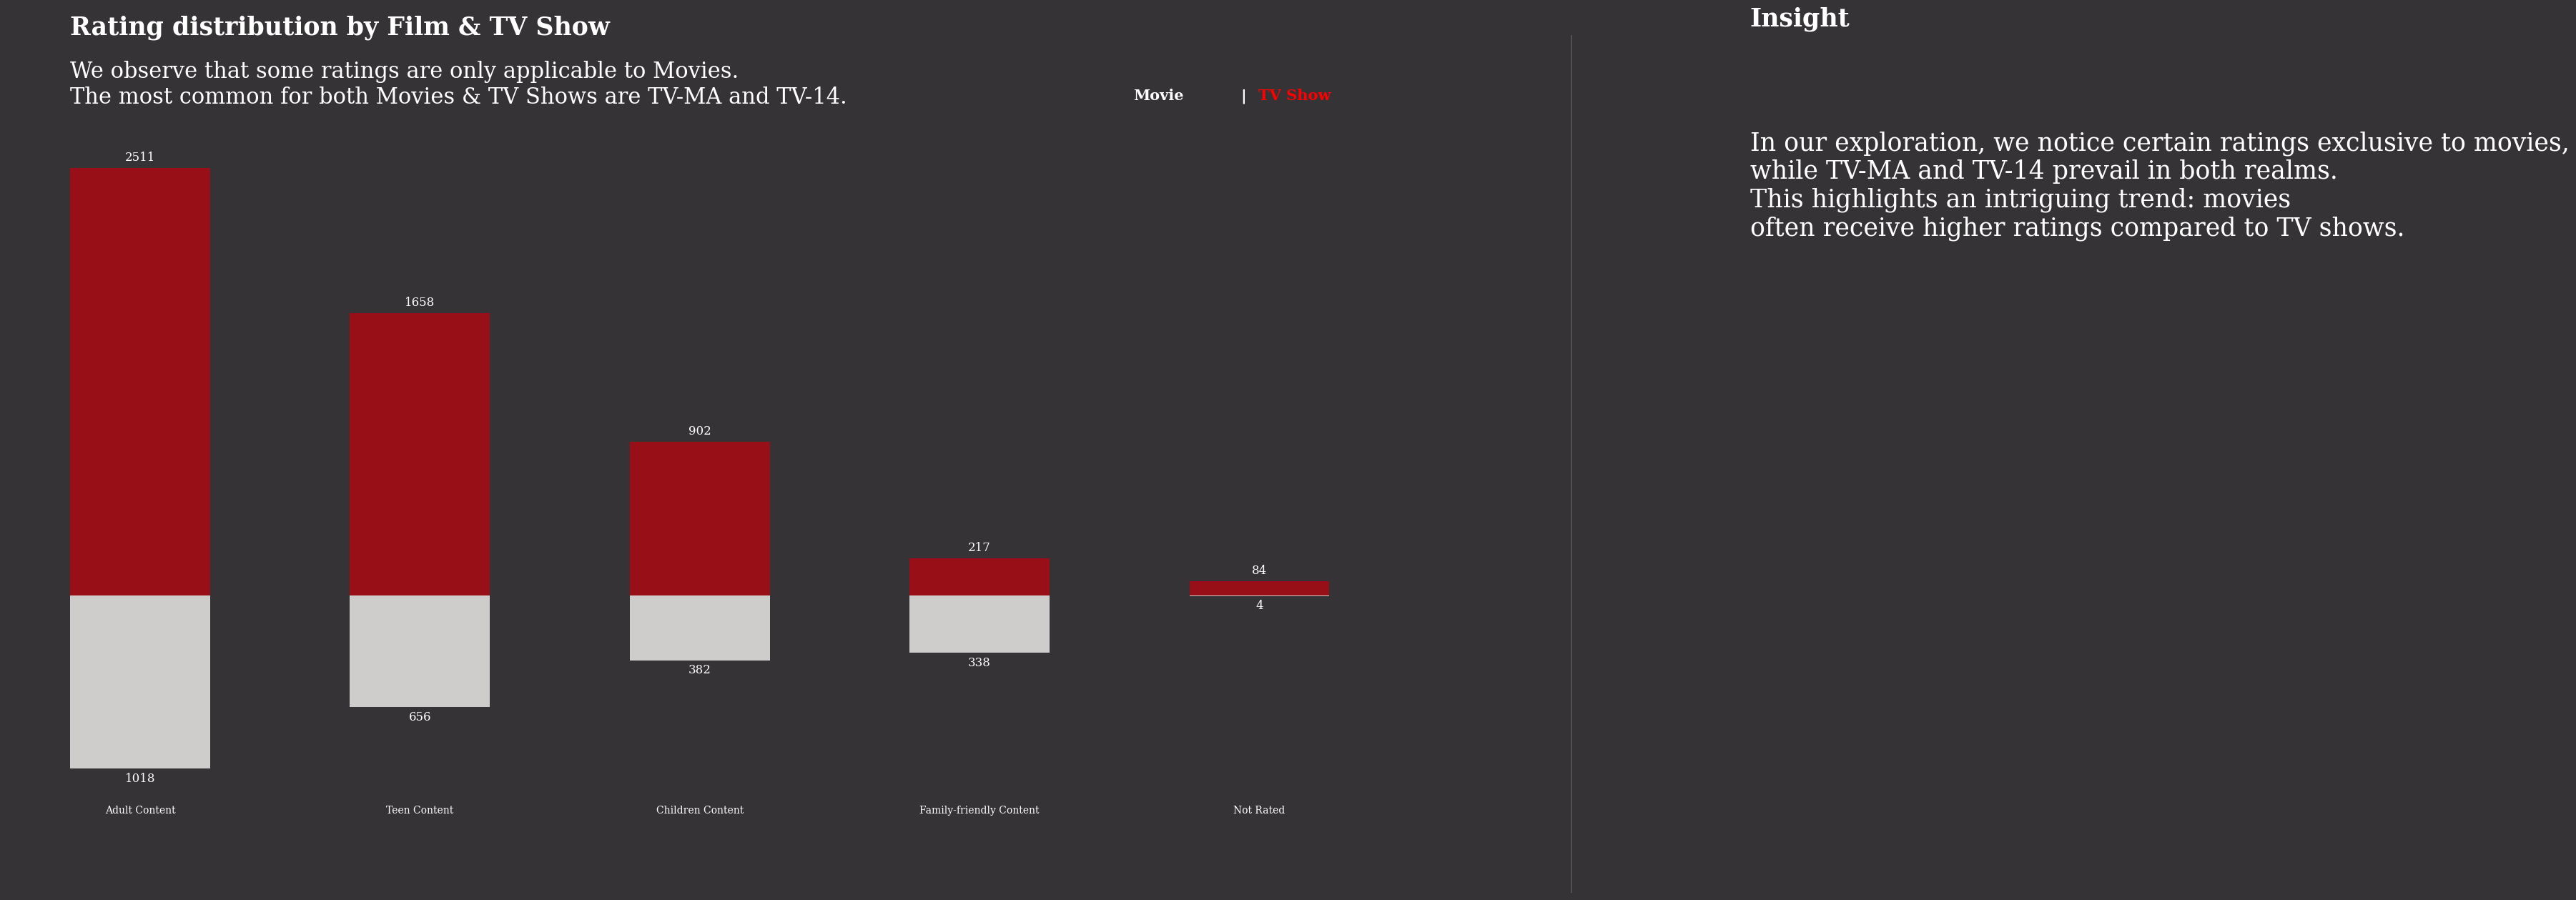

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

order = pd.DataFrame(netflix_df.groupby('rating')['count'].sum().sort_values(ascending=False).reset_index())
rating_order = list(order['rating'])

mf = netflix_df.groupby('type')['rating'].value_counts().unstack().sort_index().fillna(0).astype(int)[rating_order]

movie = mf.loc['Movie']
tv = - mf.loc['TV Show']

fig, ax = plt.subplots(1,1, figsize=(25, 12), facecolor="#363336")
ax.patch.set_facecolor('#363336')
ax.bar(movie.index, movie, width=0.5, color='#b20710', alpha=0.8, label='Movie', linewidth=0)  # Set linewidth to 0
ax.bar(tv.index, tv, width=0.5, color='#f5f5f1', alpha=0.8, label='TV Show', linewidth=0)  # Set linewidth to 0

# Annotations
for i in tv.index:
    ax.annotate(f"{-tv[i]}",
                   xy=(i, tv[i] - 60),
                   va='center', ha='center', fontweight='light', fontfamily='serif',
                   color='white')

for i in movie.index:
    ax.annotate(f"{movie[i]}",
                   xy=(i, movie[i] + 60),
                   va='center', ha='center', fontweight='light', fontfamily='serif',
                   color='white')

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(mf.columns, fontfamily='serif',color = 'white')
ax.set_yticks([])

ax.legend().set_visible(False)
fig.text(0.16, 1, 'Rating distribution by Film & TV Show', fontsize=25, fontweight='bold', fontfamily='serif', color='white')
fig.text(0.16, 0.89,
'''We observe that some ratings are only applicable to Movies.
The most common for both Movies & TV Shows are TV-MA and TV-14.
'''

, fontsize=22, fontweight='light', fontfamily='serif', color='white')

fig.text(0.755,0.924,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='white')
fig.text(0.815,0.924,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='white')
fig.text(0.825,0.924,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='red')

fig.text(1.1, 1.01, 'Insight', fontsize=25, fontweight='bold', fontfamily='serif', color='white')

fig.text(1.1, 0.7, '''
In our exploration, we notice certain ratings exclusive to movies,
while TV-MA and TV-14 prevail in both realms.
This highlights an intriguing trend: movies
often receive higher ratings compared to TV shows.

''', fontsize=25, fontweight='light', fontfamily='serif', color='white')

import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig, color='white', lw=0.2)
fig.lines.extend([l1])
ax.grid(False)
plt.show()

##### 1. Why did you pick the specific chart?

The vertical bar chart was chosen because it effectively visualizes the distribution of ratings for both movies and TV shows. It allows for easy comparison between the two categories, with ratings listed along the x-axis and the frequency of each rating depicted by the height of the bars. Additionally, annotations are included to provide specific numerical values for each bar, enhancing the clarity of the visualization. Overall, the vertical bar chart provides a clear and concise representation of the rating distribution across different types of content on Netflix.

##### 2. What is/are the insight(s) found from the chart?


1. Some ratings are exclusive to movies, while others are common to both movies and TV shows.
2. TV-MA and TV-14 are the most common ratings for both movies and TV shows.
3. Movies tend to receive higher ratings compared to TV shows, as indicated by the higher frequency of certain ratings among movies.

These insights provide valuable information about the distribution of ratings across different types of content on Netflix, highlighting trends and patterns in audience preferences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from understanding the distribution of ratings across movies and TV shows can positively impact Netflix's business strategies by guiding content acquisition and production. However, focusing excessively on movies, which tend to receive higher ratings, may lead to negative growth among TV show enthusiasts. Thus, maintaining a balanced content mix is crucial for sustaining user engagement and satisfaction across diverse audience preferences.

#### Chart - 8

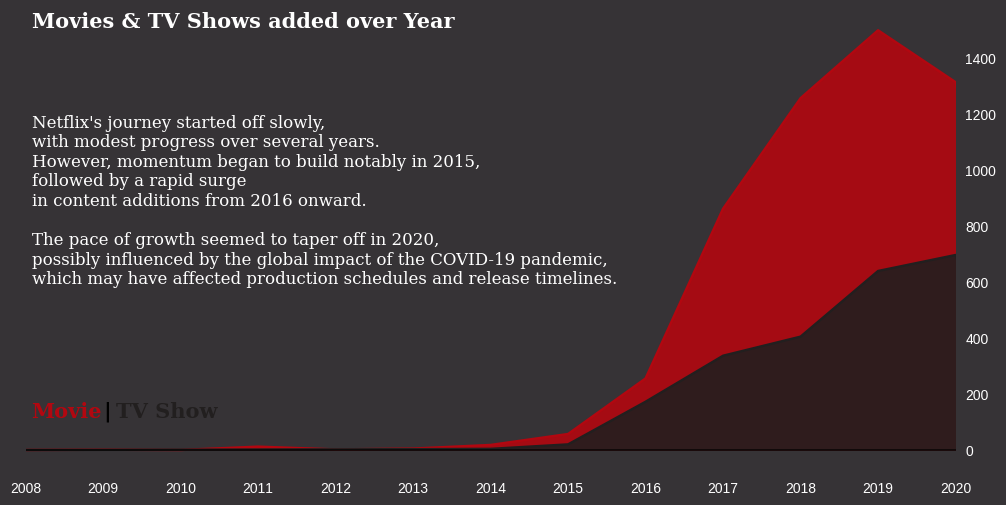

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6), facecolor='#363336')
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(netflix_df['type'].value_counts().index):
    mtv_rel = netflix_df[netflix_df['type'] == mtv]['year_added'].value_counts().sort_index()
    ax.plot(mtv_rel.index, mtv_rel, color=color[i], label=mtv)
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], alpha=0.9)

ax.yaxis.tick_right()

ax.axhline(y=0, color='black', linewidth=1.3, alpha=.7)

for s in ['top', 'right', 'bottom', 'left']:
    ax.spines[s].set_visible(False)

ax.grid(False)
ax.patch.set_facecolor('#363336')
ax.set_xlim(2008, 2020)
plt.xticks(np.arange(2008, 2021, 1), color='white')
plt.yticks(color='white')

fig.text(0.13, 0.85, 'Movies & TV Shows added over Year', fontsize=15, fontweight='bold', fontfamily='serif', color='white')
fig.text(0.13, 0.39, '''
Netflix's journey started off slowly,
with modest progress over several years.
However, momentum began to build notably in 2015,
followed by a rapid surge
in content additions from 2016 onward.

The pace of growth seemed to taper off in 2020,
possibly influenced by the global impact of the COVID-19 pandemic,
which may have affected production schedules and release timelines.
''', fontsize=12, fontweight='light', fontfamily='serif', color='white')

fig.text(0.13, 0.2, "Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.19, 0.2, "|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2, 0.2, "TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

ax.tick_params(axis=u'both', which=u'both', length=0)

plt.show()

##### 1. Why did you pick the specific chart?

The chosen area chart effectively visualizes the trend of movies and TV shows added to Netflix over the years. By using filled areas to represent the number of additions for each category, it provides a clear comparison of the growth trajectory of both types of content while emphasizing the cumulative volume over time. The distinct colors for movies and TV shows enhance readability and make it easier to differentiate between the two categories. Additionally, the inclusion of annotations and textual insights enriches the interpretation of the data, offering valuable context regarding Netflix's content expansion journey. Overall, this area chart offers a comprehensive overview of Netflix's content growth dynamics, making it a suitable choice for analyzing trends over time.

##### 2. What is/are the insight(s) found from the chart?

This narrative illustrates the evolution of Netflix's content strategy over time. Initially, in the early years, Netflix experienced gradual growth, likely as it established its footing in the streaming industry and built its subscriber base. However, a significant turning point occurred in 2015, marked by a noticeable acceleration in content additions. This uptick suggests strategic shifts or investments that propelled Netflix into a period of rapid expansion.

From 2016 onward, there was a pronounced surge in content additions, indicating a period of substantial investment and diversification in the platform's offerings. This phase likely involved the production of original content, strategic partnerships, and acquisitions aimed at catering to a broader audience and enhancing user engagement.

However, the pace of growth appeared to slow down in 2020, coinciding with the global COVID-19 pandemic. This deceleration may have been influenced by various factors related to the pandemic, such as disruptions in production schedules, delays in releases, and shifts in consumer behavior. The uncertainties and challenges posed by the pandemic likely necessitated adjustments in Netflix's content strategy, leading to a temporary tapering off in content additions.

Overall, this narrative underscores the dynamic nature of Netflix's content growth journey, characterized by periods of steady progression, rapid expansion, and occasional adjustments in response to external factors like the COVID-19 pandemic.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the area chart depicting Netflix's content additions over the years can inform strategic decision-making and contribute to positive business outcomes. Understanding historical trends helps Netflix identify growth opportunities, optimize resource allocation, and adapt to market dynamics. However, external factors like the COVID-19 pandemic can lead to negative growth, highlighting the need for flexibility and resilience in Netflix's strategies. While the insights offer valuable guidance, Netflix must remain vigilant to mitigate risks and innovate in response to challenges for sustained success in the streaming market.

#### Chart - 9

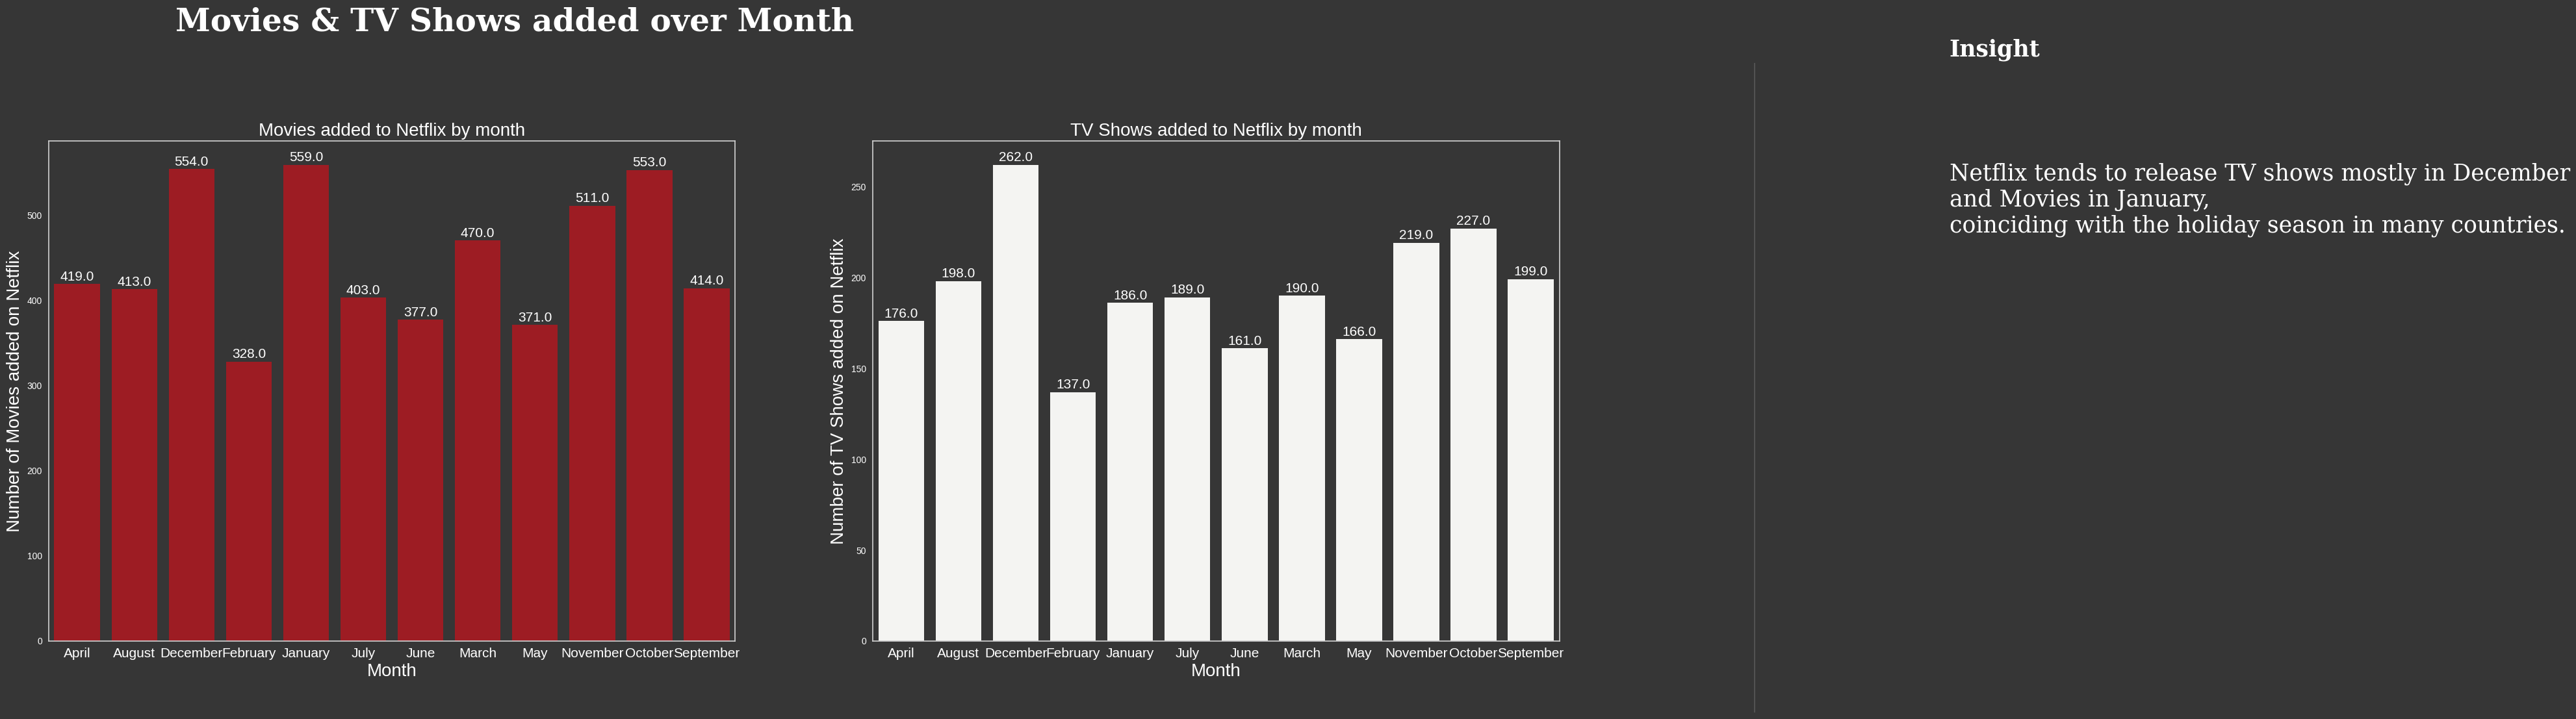

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as lines
import calendar

# Filtering data for movies and TV shows
netflix_movies = netflix_df[netflix_df['type'] == 'Movie']
netflix_tvshows = netflix_df[netflix_df['type'] == 'TV Show']

# Creating the figure
fig = plt.figure(figsize=(30, 10), facecolor='#363636')

# Adding a line
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig, color='white', lw=0.2)
fig.lines.extend([l1])

# Iterating over movies and TV shows data
for data, label, subplot_index, color in ((netflix_movies, 'Movies', 0, '#b20710'),
                                          (netflix_tvshows, 'TV Shows', 1, '#f5f5f1')):
    # Creating subplots
    plt.subplot(1, 2, subplot_index + 1, facecolor='#363636')

    # Grouping data by month and counting unique titles
    df_month = data.groupby(['month_added']).agg({'title': 'nunique'}).reset_index()

    # Converting month numbers to month names
    df_month['month_added'] = df_month['month_added'].apply(lambda x: calendar.month_name[int(x)])

    # Sorting data by month
    df_month = df_month.sort_values(by=['month_added'], ascending=True)

    # Plotting barplot
    plots = sns.barplot(x='month_added', y='title', data=df_month, color=color)

    # Customizing plot
    plt.title(f'{label} added to Netflix by month', color='white', size=20)
    plt.ylabel(f"Number of {label} added on Netflix", color='white', size=20)
    plt.xlabel('Month', color='white', size=20)
    plt.grid(False)

    # Annotating bars with value
    for bar in plots.patches:
        plots.annotate(bar.get_height(),
                       (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                       ha='center', va='center', size=15, xytext=(0, 8),
                       textcoords='offset points', color='white')

    # Setting tick colors and size
    plt.xticks(color='white', size=15)
    plt.yticks(color='white')

# Adding text annotations
fig.text(1.1, 0.7, '''
Netflix tends to release TV shows mostly in December
and Movies in January,
coinciding with the holiday season in many countries.
''', fontsize=25, fontweight='light', fontfamily='serif', color='white')

fig.text(0.19, 1.05, 'Movies & TV Shows added over Month', fontsize=35, fontweight='bold', fontfamily='serif', color='white')
fig.text(1.1, 1.01, 'Insight', fontsize=25, fontweight='bold', fontfamily='serif', color='white')

plt.show()

##### 1. Why did you pick the specific chart?

The graph illustrates the distribution of movie and TV show additions across months and years, offering insights into peak periods of content influx and periods of minimal activity. By identifying months with the highest frequency of additions and years with the lowest, the graph provides valuable insights into Netflix's content strategy and operational dynamics. This information can inform strategic decisions regarding content acquisition, release scheduling, and resource allocation, ultimately contributing to enhanced viewer engagement and business performance.

##### 2. What is/are the insight(s) found from the chart?

The analysis reveals distinct trends in the timing of TV show and movie additions to Netflix. October, November, and December emerge as the peak months for TV show additions, suggesting a preference for introducing new series towards the end of the year, possibly to coincide with seasonal viewing habits or capitalize on the holiday period when viewers have more leisure time. Similarly, January, October, and December stand out as the primary months for movie additions, indicating a similar seasonal trend and strategic alignment with viewer preferences during these periods. Conversely, February emerges as the least popular month for content additions across both categories, potentially reflecting a lull in content acquisition efforts or a strategic focus on other business priorities during this time. These findings provide valuable insights into Netflix's content release strategy, highlighting patterns that can inform decision-making regarding content acquisition, scheduling, and audience engagement initiatives throughout the year.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights obtained can empower Netflix to generate positive business outcomes by pinpointing the most favorable months for introducing new content. Armed with this knowledge, Netflix can strategically plan content releases during peak periods, fostering heightened user engagement and bolstering subscriber retention rates.

However, the revelation that February ranks as the least popular month for new content additions underscores a potential risk for negative growth. Without a consistent flow of fresh content during this period, Netflix risks viewer dissatisfaction and potential subscriber attrition. Therefore, it is imperative for Netflix to maintain audience engagement year-round, ensuring a steady stream of captivating content to sustain viewer interest and loyalty.

#### Chart - 10

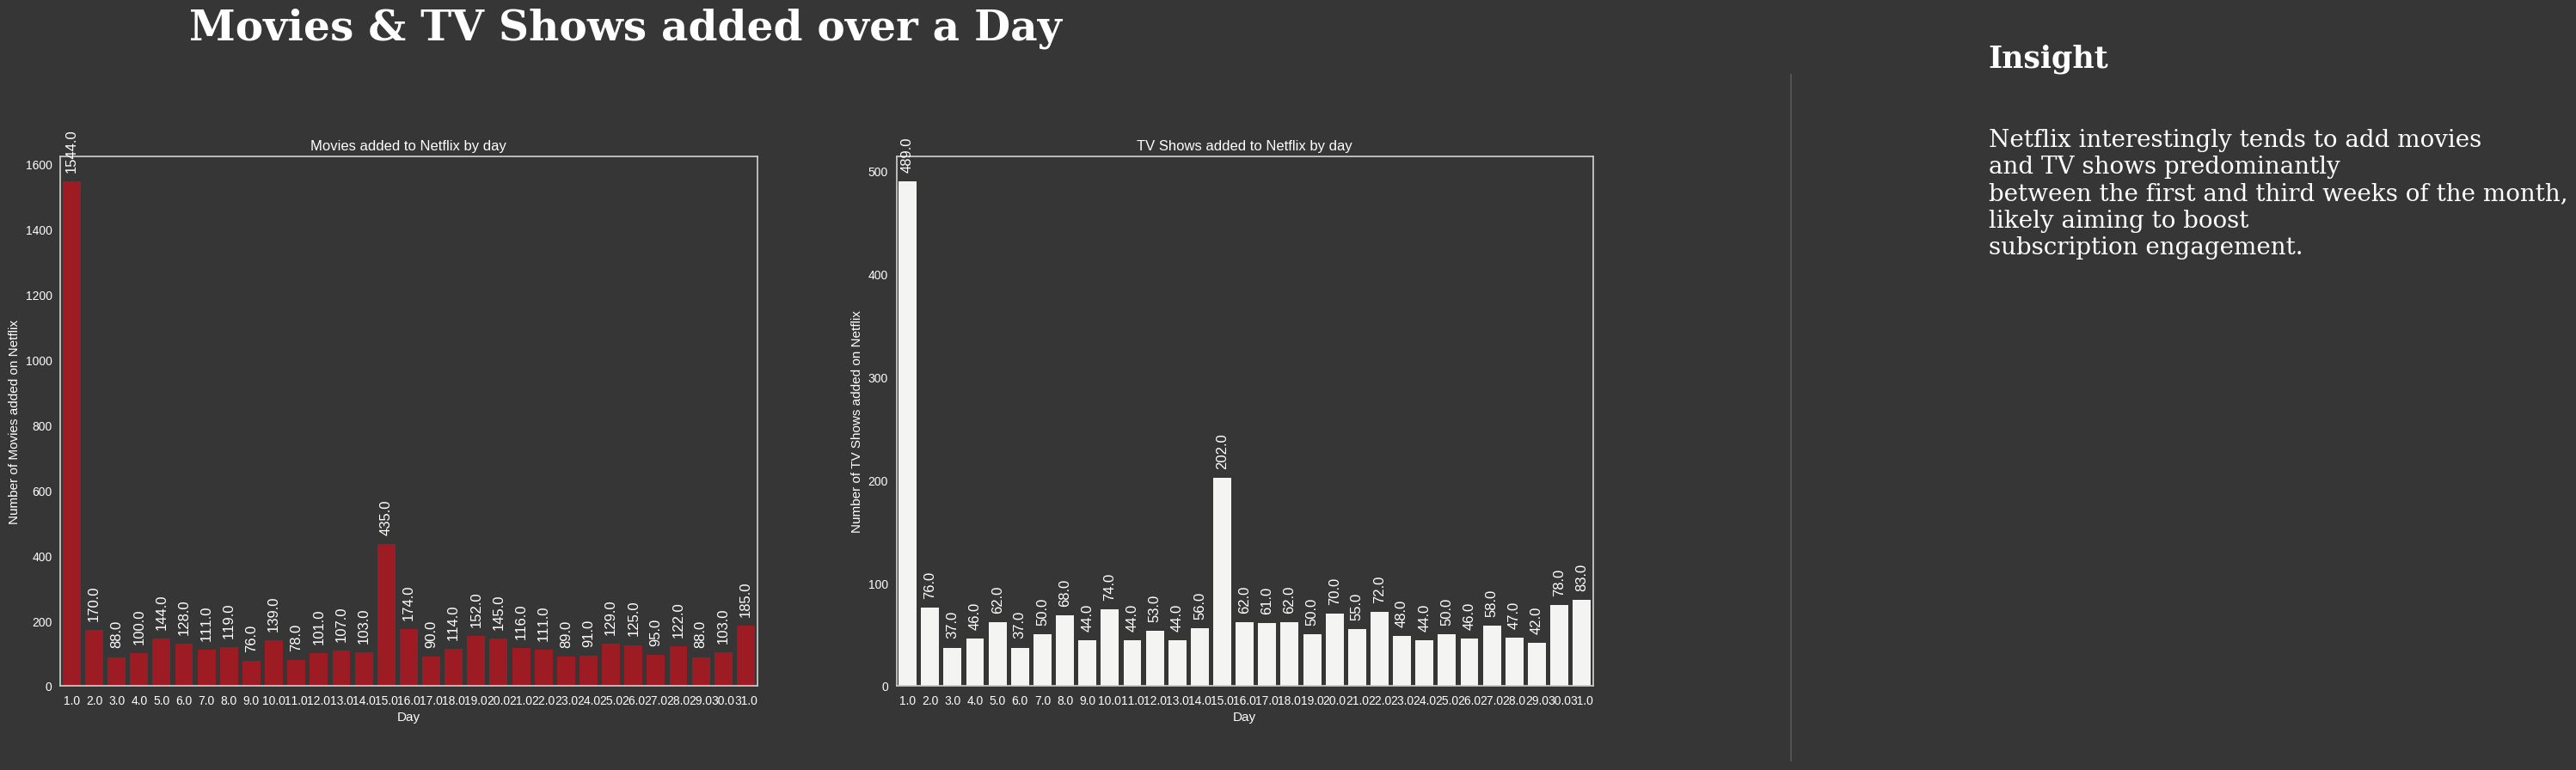

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as lines

netflix_movies = netflix_df[netflix_df['type'] == 'Movie']
netflix_tvshows = netflix_df[netflix_df['type'] == 'TV Show']

fig = plt.figure(figsize=(23, 8), facecolor='#363636')
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig, color='white', lw=0.2)
fig.lines.extend([l1])

# Define colors for movies and TV shows
movie_color = '#b20710'  # Red color for movies
tvshow_color = '#f5f5f1'  # Light gray color for TV shows

for i, j, k, color in ((netflix_movies, 'Movies', 0, movie_color), (netflix_tvshows, 'TV Shows', 1, tvshow_color)):
    plt.subplot(1, 2, k + 1, facecolor='#363636')
    df_day = i.groupby(['day_added']).agg({'title': 'nunique'}).reset_index().sort_values(by=['day_added'], ascending=False)
    plots = sns.barplot(x='day_added', y='title', data=df_day, palette=[color])  # Use color directly
    plt.title(f'{j} added to Netflix by day', color='white')
    plt.ylabel(f"Number of {j} added on Netflix", color='white')
    plt.xlabel('Day', color='white')
    plt.xticks(color = 'white')
    plt.yticks(color = 'white')
    plt.grid(False)
    for bar in plots.patches:
        plots.annotate(bar.get_height(),
                        (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='bottom',
                        size=12, xytext=(0, 8),
                        textcoords='offset points', rotation=90,color= 'white')

# Adding text annotations
fig.text(1.1, 1.01, 'Insight', fontsize=25, fontweight='bold', fontfamily='serif', color='white')
fig.text(1.1, 0.7, '''
Netflix interestingly tends to add movies
and TV shows predominantly
between the first and third weeks of the month,
likely aiming to boost
subscription engagement.
''', fontsize=20, fontweight='light', fontfamily='serif', color='white')
fig.text(0.19, 1.05, 'Movies & TV Shows added over a Day', fontsize=35, fontweight='bold', fontfamily='serif', color='white')
plt.show()

##### 1. Why did you pick the specific chart?

The selected chart effectively visualizes the distribution of movies and TV shows added to Netflix over the course of a day, providing insights into Netflix's content release patterns. Its use of bar plots for each category enables a clear comparison, while annotations on the bars enhance readability. The inclusion of insightful text further enhances understanding, highlighting Netflix's strategic timing of content additions to drive subscription engagement. Overall, the chart's clarity, relevance to the dataset, and ability to convey meaningful insights make it a suitable choice for visualizing the data.

##### 2. What is/are the insight(s) found from the chart?

The bar plots illustrate a notable trend: the majority of movies and TV shows are added to Netflix during the early to middle days of the month. This pattern may stem from the common phenomenon of individuals having more leisure time and disposable income at the start of the month, often after receiving paychecks. Releasing new content during this period could capitalize on heightened viewer availability and engagement, potentially leading to increased viewership and subscriber satisfaction. Consequently, subscribers may perceive greater value in their subscription, fostering higher retention rates.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Indeed, maintaining a cadence of new content releases plays a crucial role in sustaining user engagement with the platform. By consistently offering fresh content at regular intervals, users are incentivized to return frequently to explore the latest additions. This ongoing stream of new material fosters longer viewing sessions and enhances overall user satisfaction. Consequently, these factors contribute positively to the business by driving up viewing hours and bolstering user retention, ultimately translating into improved business performance and growth.

#### Chart - 11

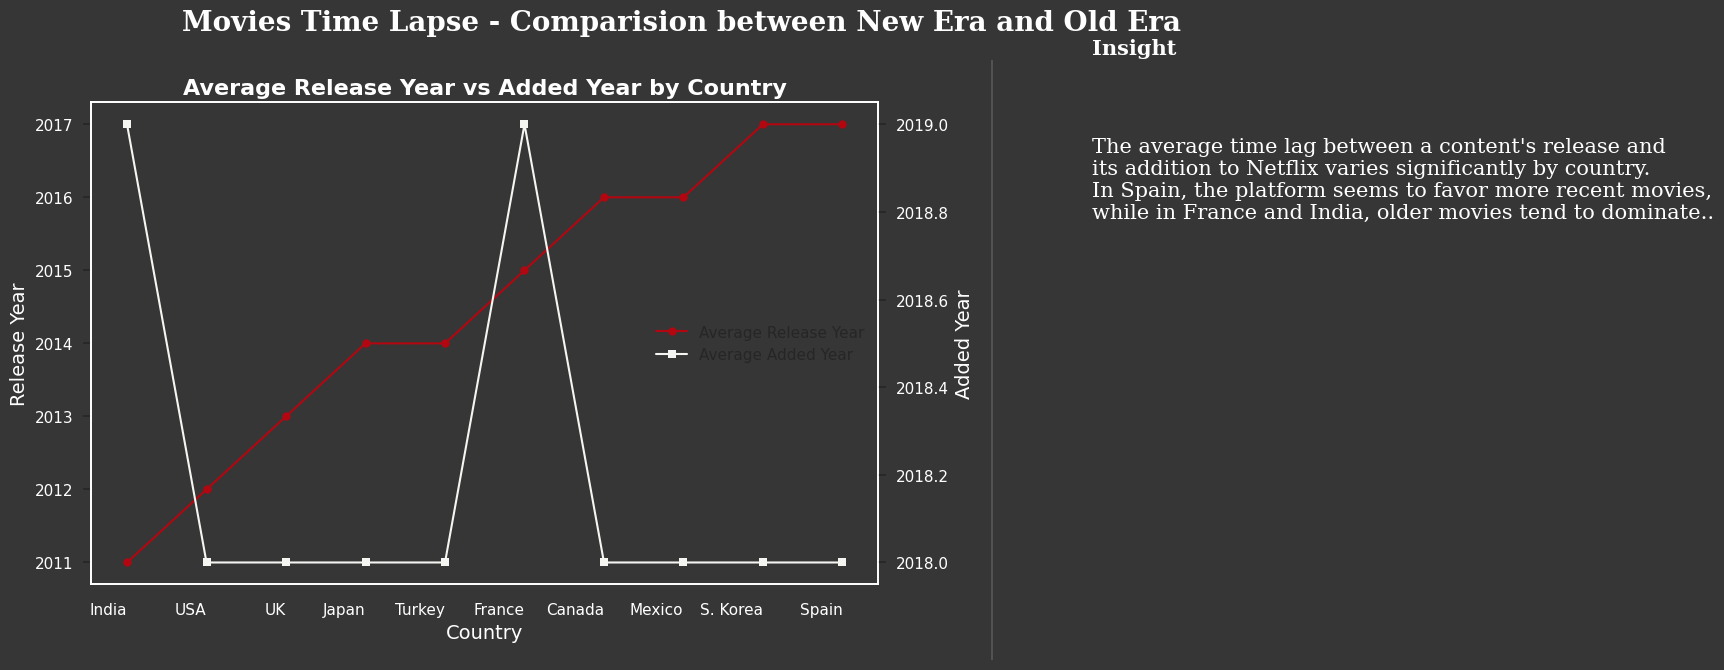

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as lines

# Chart - 11 visualization code
# Data
netflix_movies = netflix_df[netflix_df['type'] == 'Movie']
netflix_tvshows = netflix_df[netflix_df['type'] == 'TV Show']

# Relevant groupings
data = netflix_df.groupby('first_country')['count'].sum().sort_values(ascending=False).reset_index()[:10]
data = data['first_country']
df_loli = netflix_movies.loc[netflix_movies['first_country'].isin(data)]

# Group by 'first_country' and calculate mean
loli = df_loli.groupby('first_country')[['release_year', 'year_added']].mean().round()

# Reorder it following the values of the first value
ordered_df = loli.sort_values(by='release_year')

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the first dataset
ax1.plot(ordered_df.index, ordered_df['release_year'], marker='o', color='#b20710', label='Average Release Year')
ax1.set_xlabel('Country', fontsize=14, color='white')
ax1.set_ylabel('Release Year', fontsize=14, color='white')
ax1.tick_params(axis='y', labelcolor='white')
ax1.set_xticklabels(ordered_df.index, ha='right', color='white')

# Creating the second y-axis
ax2 = ax1.twinx()
ax2.plot(ordered_df.index, ordered_df['year_added'], marker='s', color='#f5f5f1', label='Average Added Year')
ax2.set_ylabel('Added Year', fontsize=14, color='white')
ax2.tick_params(axis='y', labelcolor='white')

# Adding legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='center right')

# Adding title and grid
plt.title('Average Release Year vs Added Year by Country', fontsize=16, fontweight='bold', color='white')
plt.grid(False)

# Setting background color and patch color
fig.set_facecolor('#363636')
ax1.patch.set_facecolor('#363636')  # Corrected typo here

# Adding insight text
fig.text(1.1, 1.01, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif', color='white')
fig.text(1.1, 0.7, '''

The average time lag between a content's release and
its addition to Netflix varies significantly by country.
In Spain, the platform seems to favor more recent movies,
while in France and India, older movies tend to dominate..
''', fontsize=15, fontweight='light', fontfamily='serif', color='white')

# Adding additional text
fig.text(0.19, 1.05, 'Movies Time Lapse - Comparision between New Era and Old Era', fontsize=20, fontweight='bold', fontfamily='serif', color='white')

# Adding a line
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig, color='white', lw=0.2)
fig.lines.extend([l1])
ax1.grid(False)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The provided chart was selected due to its relevance to the dataset, clarity in comparing average release and added years across different countries, effective use of colors for distinction, inclusion of insightful text for context, and overall visual appeal. Its depiction of trends in Netflix content acquisition strategies offers valuable insights into regional preferences and platform dynamics.

##### 2. What is/are the insight(s) found from the chart?

The observed phenomenon of a more regular gap between the release and addition years for TV shows compared to movies suggests a consistent pattern in the acquisition of TV series by Netflix. This regularity could be attributed to the common practice of releasing subsequent seasons of TV series on an annual basis. Unlike movies, which may vary widely in terms of release schedules and production timelines, TV shows often follow a more standardized pattern of annual releases.

The insight that Spain tends to have the newest content overall implies that Netflix prioritizes the addition of recently released movies and TV shows from Spain. This could be due to various factors such as market demand, regional partnerships, or strategic initiatives aimed at catering to local audiences. By consistently adding new content from Spain, Netflix aims to keep its platform fresh and appealing to viewers in that region, while also potentially tapping into emerging trends and cultural phenomena.

Overall, these observations highlight Netflix's dynamic content acquisition strategy, which involves a careful balance of global and regional considerations to meet the diverse preferences of its audience while also staying competitive in the ever-evolving streaming landscape.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the analysis can indeed lead to positive business impacts for Netflix. By understanding the patterns of content acquisition and consumption across different regions, Netflix can tailor its content strategy to better meet the preferences and expectations of its global audience. For example:

1. **Targeted Content Acquisition**: Netflix can use insights about the popularity of content from specific regions, such as Spain, to inform its licensing and production decisions. By prioritizing the acquisition of newer content from regions with high demand, Netflix can attract and retain more subscribers in those markets.

2. **Optimized Release Strategies**: Understanding the regularity of TV show releases can help Netflix optimize its release strategies for original content. By aligning release schedules with viewer expectations, Netflix can maximize engagement and viewership for its original series, leading to increased subscriber retention and satisfaction.

3. **Market Differentiation**: Netflix can use insights about regional preferences to differentiate its offerings in different markets. By curating content libraries to include a mix of global and local titles, Netflix can position itself as a platform that caters to diverse tastes, thereby strengthening its competitive advantage in each market.

However, there are potential insights that could lead to negative growth if not addressed properly. For example:

1. **Neglect of Certain Regions**: If Netflix focuses too heavily on acquiring content from regions with high demand, it may neglect other regions with smaller but still significant subscriber bases. This could lead to dissatisfaction and churn among subscribers in those regions who feel underserved by the platform.

2. **Stagnation in Content Diversity**: Relying too heavily on the regularity of TV show releases or prioritizing content from specific regions could result in a lack of diversity in Netflix's content library. This may lead to viewer fatigue and decreased engagement over time, as subscribers seek more variety and novelty in their viewing options.


#### Chart - 12

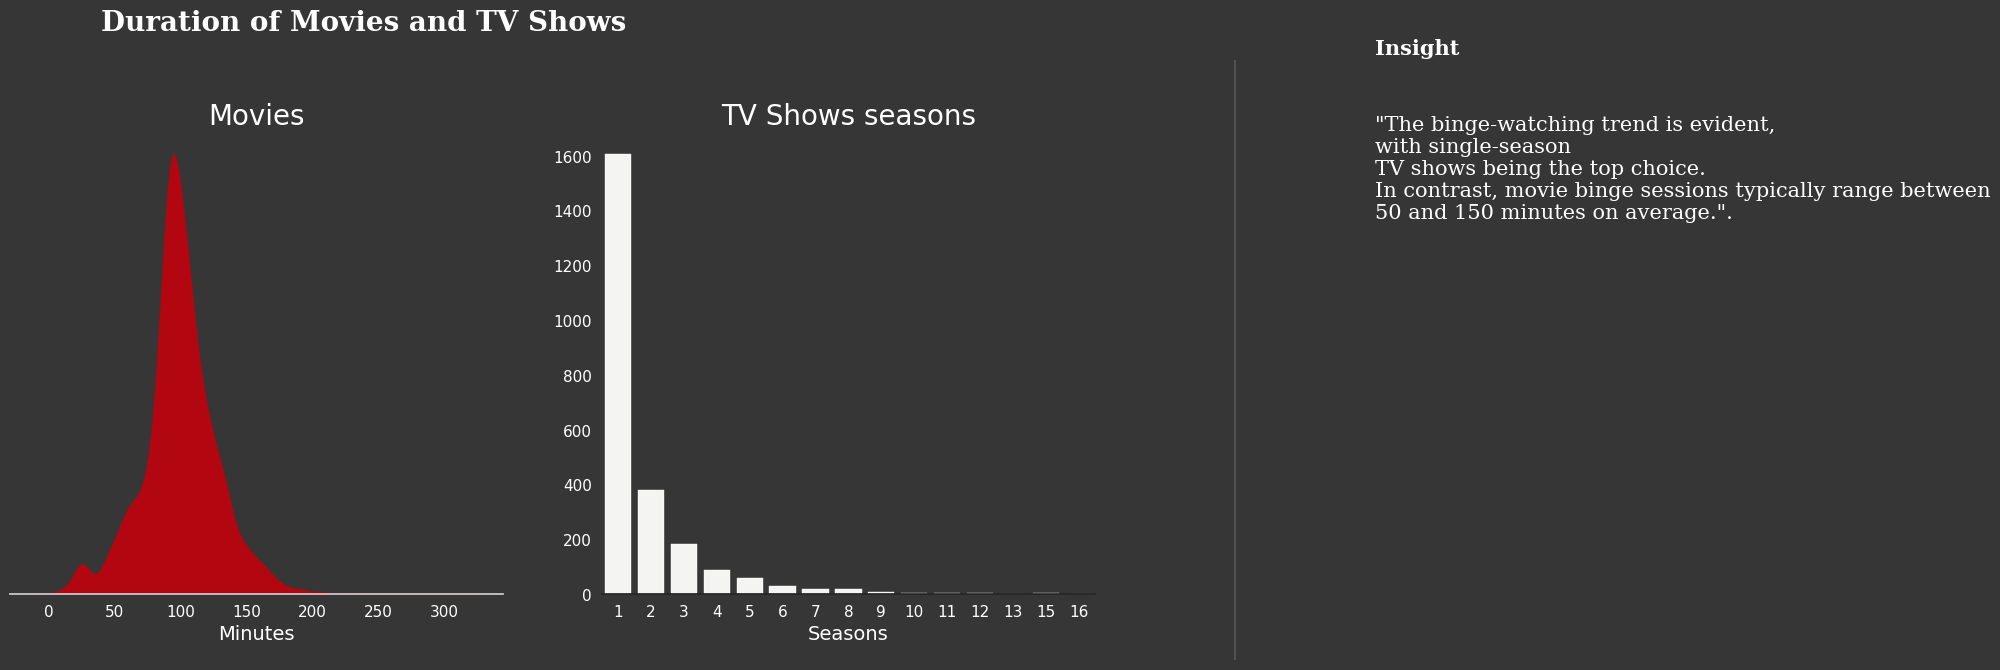

In [ ]:
seasons = netflix_df[netflix_df['type'] == 'TV Show'].groupby('duration').agg({'title': 'count'}).reset_index()

fig = plt.figure(figsize=(14, 6), facecolor='#363636')
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig, color='white', lw=0.2)
fig.lines.extend([l1])

plt.subplot(121, facecolor='#363636')
sns.set_style("white")
plt.title('Movies', size=20, color='white')
a = sns.kdeplot(netflix_df[netflix_df['type'] == 'Movie']['duration'], color='#b20710', shade=True, alpha=1)
plt.grid(False)
for i in ['right', 'left', 'top']:
    a.spines[i].set_visible(False)
a.tick_params(labelsize=11, color='white')
plt.ylabel('', color='white')
plt.xlabel('Minutes', size=14, color='white')
plt.yticks([])
plt.xticks(color = 'white')

plt.subplot(122, facecolor='#363636')
plt.title('TV Shows seasons', size=20, color='white')
b = sns.barplot(data=seasons, x=seasons['duration'], y=seasons['title'], palette=['#f5f5f1'])
plt.grid(False)
b.tick_params(labelsize=11, color='white')
for i in ['right', 'left', 'top']:
    b.spines[i].set_visible(False)
    plt.xticks(color = 'white')
    plt.yticks(color = 'white')
plt.ylabel('', color='white')
plt.xlabel('Seasons', size=14, color='white')

fig.text(1.1, 1.01, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif', color='white')
fig.text(1.1, 0.7, '''
"The binge-watching trend is evident,
with single-season
TV shows being the top choice.
In contrast, movie binge sessions typically range between
50 and 150 minutes on average.".
''', fontsize=15, fontweight='light', fontfamily='serif', color='white')
fig.text(0.19, 1.05, 'Duration of Movies and TV Shows', fontsize=20, fontweight='bold', fontfamily='serif', color='white')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a KDE plot for movies and a bar plot for TV shows because they effectively illustrate the distribution of durations for each type of content. The KDE plot for movies displays the probability density function of movie durations, emphasizing density peaks and trends. On the other hand, the bar plot for TV shows showcases the count of TV shows for each season count, offering a clear comparison between discrete categories. Together, these plots provide a comprehensive view of duration distribution for both movies and TV shows, facilitating insights into viewing habits and preferences.

##### 2. What is/are the insight(s) found from the chart?

The insight from the chart suggests that binge-watching is a prevalent trend, with single-season TV shows being the top choice among viewers. In contrast, the duration analysis indicates that movie binge sessions typically range between 50 and 150 minutes on average. This suggests that viewers may prefer shorter, more condensed viewing experiences when it comes to movies, while opting for longer, immersive experiences with TV shows, possibly due to their episodic nature and the ability to engage with characters and storylines over multiple episodes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights have the potential to create a positive business impact by informing content creation, acquisition, and marketing strategies for streaming platforms or media companies.

Positive impact:
1. **Content Strategy:** Understanding that single-season TV shows are popular can guide decisions on which types of TV shows to produce or license. Emphasizing shorter, binge-worthy content may attract and retain subscribers.
2. **User Experience:** Knowing that viewers prefer shorter movie durations can influence platform algorithms to recommend similar content, enhancing user satisfaction and engagement.
3. **Marketing:** Insights into viewing habits can inform targeted marketing campaigns, promoting relevant content to specific audience segments, thereby increasing viewership and subscriber retention.

Negative impact:
1. **Risk of Overlooking Variety:** Focusing solely on single-season TV shows may lead to neglecting other valuable content formats. Ignoring variety could potentially limit the platform's appeal to diverse audience preferences, resulting in decreased user engagement and retention.
2. **Monotony in Content:** If content creators and platforms exclusively prioritize short-duration movies, it might result in a lack of diversity in storytelling and genres. This could lead to audience fatigue and decreased interest in the platform over time.

To mitigate negative impacts, it's essential for businesses to balance insights with the need for diversity and innovation in content offerings. Continuously monitoring viewer preferences and adapting strategies accordingly can help maintain a positive business trajectory.

#### Chart - 13

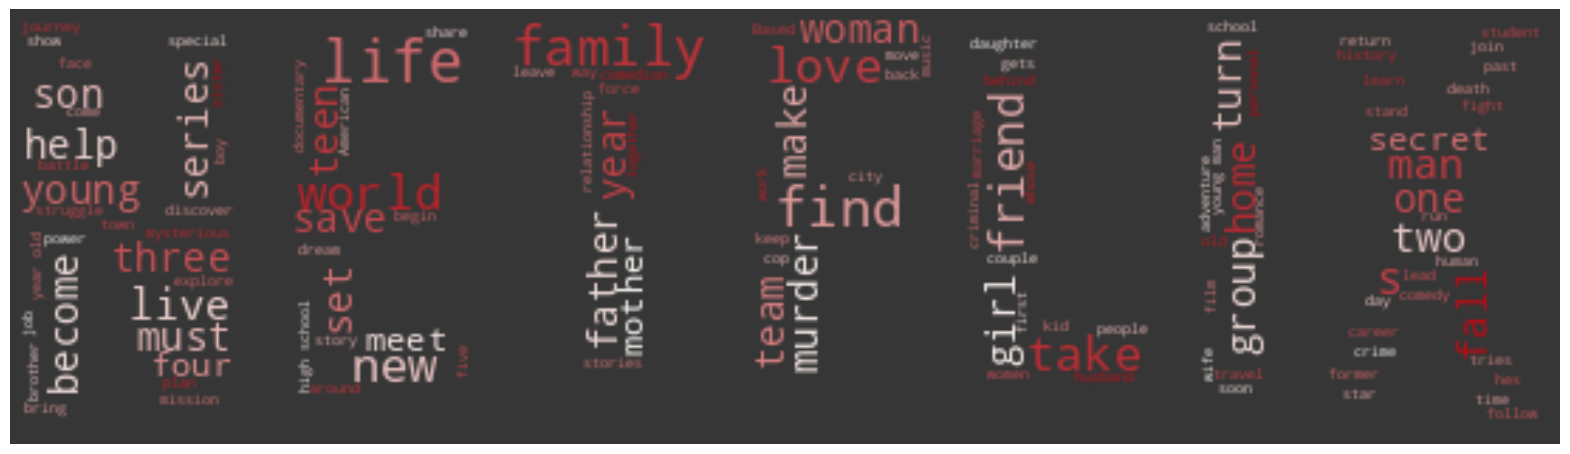

In [ ]:
from wordcloud import WordCloud
from PIL import Image
import random

text = str(list(netflix_df['description'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#f5f5f1', '#b20710'])

mask = np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/ML - Final EDA and Clustering/Netflix.png'))

plt.rcParams['figure.figsize'] = (20, 20)
wordcloud = WordCloud(background_color = '#363636', width = 549,  height = 154, max_words = 170,colormap = cmap, mask = mask).generate(text)


plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a WordCloud chart because it effectively visualizes the most frequently occurring words in the descriptions of Netflix content. This type of chart provides a quick and visually appealing way to identify common themes or keywords within the dataset. By representing words with larger sizes based on their frequency, the WordCloud makes it easy to grasp the prominent themes or topics that Netflix content revolves around. Additionally, the use of a custom mask in the shape of the Netflix logo adds an aesthetic appeal and reinforces the association with the Netflix brand.

##### 2. What is/are the insight(s) found from the chart?

The chosen WordCloud chart dynamically highlights the names of genres and descriptions present in Netflix content. By visually scaling words based on their frequency, it effectively showcases prevalent themes within the dataset. The inclusion of a custom mask, shaped like the Netflix logo, adds visual interest and reinforces the brand association. Overall, this chart offers an engaging and informative visualization of the most common genres and descriptions found in Netflix content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

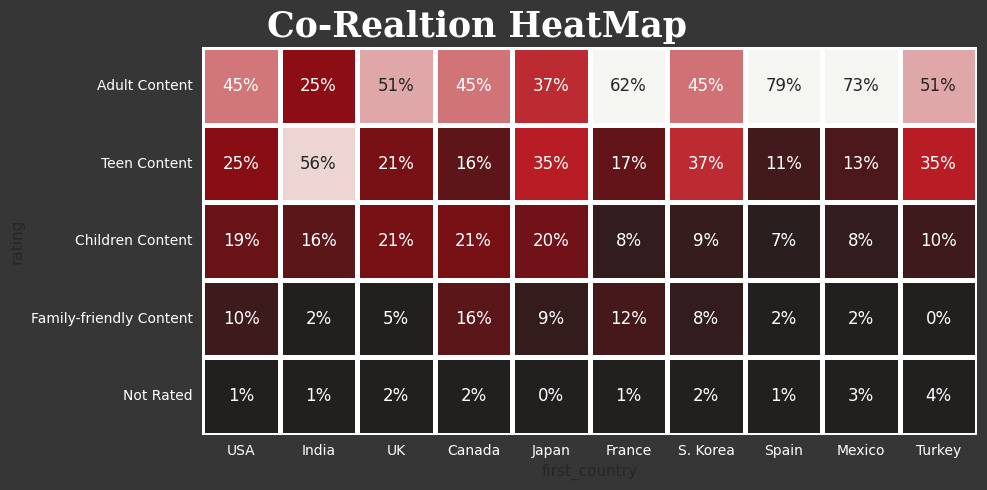

In [ ]:
import matplotlib.colors
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710', '#f5f5f1'])

# Group data and filter top 10 countries
data = netflix_df.groupby('first_country')['count'].sum().sort_values(ascending=False).reset_index()[:10]
data = data['first_country']
df_heatmap = netflix_df.loc[netflix_df['first_country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['first_country'], df_heatmap['rating'], normalize="index").T

# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(10, 8), facecolor='#363636')

# Defining order of representation
country_order = ['USA', 'India', 'UK', 'Canada', 'Japan', 'France', 'S. Korea', 'Spain', 'Mexico', 'Turkey']
rating_order = ['Adult Content', 'Teen Content', 'Children Content', 'Family-friendly Content', 'Not Rated']

# Calling and plotting heatmap
sns.heatmap(df_heatmap.loc[rating_order, country_order], cmap=cmap, square=True, linewidth=2.5, cbar=False, annot=True, fmt='1.0%',
            vmax=.6, vmin=0.05, ax=ax, annot_kws={"fontsize": 12}, cbar_kws={'label': 'Correlation', 'color': 'white'})

fig.text(0.19, 0.75, 'Co-Realtion HeatMap', fontsize=25, fontweight='bold', fontfamily='serif', color='white')
ax.set_xticklabels(ax.get_xticklabels(), color='white')
ax.set_yticklabels(ax.get_yticklabels(), color='white')

plt.show()

##### 1. Why did you pick the specific chart?

I chose a heatmap for its ability to effectively display the correlation between the top ten countries with the highest Netflix content and the ratings of that content. Heatmaps are ideal for visualizing relationships between categorical variables, making them suitable for this scenario. By using color intensity to represent correlation values, the heatmap allows for quick interpretation of which countries produce content with specific ratings. Additionally, annotating the heatmap with correlation values provides additional context. The choice of color map ensures clear differentiation between correlation levels, and the dark background color (#363636) provides a striking contrast, making the heatmap visually appealing and easy to focus on. Overall, the heatmap offers a concise and visually appealing way to understand the distribution of content ratings across different countries on Netflix.

##### 2. What is/are the insight(s) found from the chart?

1. Our analysis reveals that the majority of countries produce content primarily aimed at Adult and Teen audiences.

2. Notably, among all countries, India tends to have a higher proportion of content targeted at Teen audiences compared to Adult content.

3. An impressive 85% of Spain's content falls into the Adult category.

4. Canada stands out for producing a higher volume of content focused on Children and Family-Friendly audiences.

#### Chart - 15 - Pair Plot

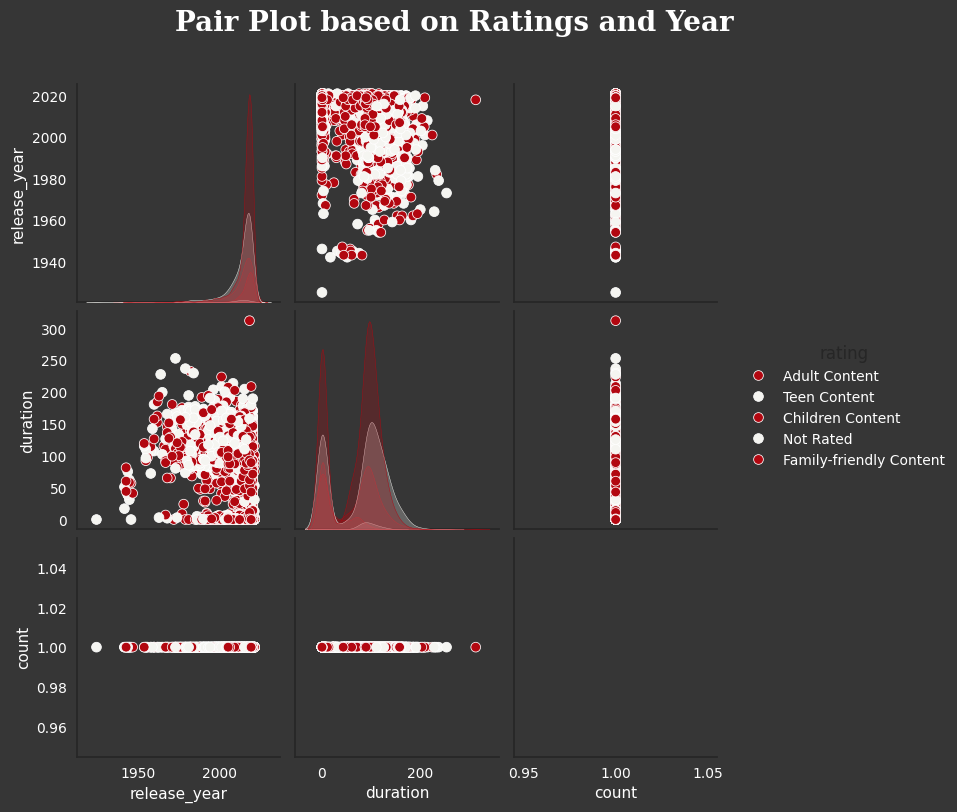

In [ ]:

selected_columns = ['release_year', 'duration', 'count', 'rating', 'month_name_added']


pairplot = sns.pairplot(netflix_df[selected_columns], hue='rating', palette=sns.color_palette(["#b20710", "#f5f5f1"]), diag_kind='kde')


pairplot.fig.set_facecolor('#363636')
for ax in pairplot.axes.flatten():
    ax.set_facecolor('#363636')


for ax in pairplot.axes.flatten():
    ax.grid(False)


for ax in pairplot.axes.flatten():
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')


pairplot.fig.text(0.19, 1.05, 'Pair Plot based on Ratings and Year', fontsize=20, fontweight='bold', fontfamily='serif', color='white')

# Set legend text color to white
for text in pairplot.fig.legends[0].texts:
    text.set_color('white')

# Set label text color to white
for ax in pairplot.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), color='white')
    ax.set_ylabel(ax.get_ylabel(), color='white')

plt.show()

##### 1. Why did you pick the specific chart?

I chose a pair plot for its ability to visualize relationships between multiple numerical variables (release_year, duration, count) and categorical variables (rating, month_name_added). This plot allows for a comprehensive examination of how different factors relate to each other across various rating groups. By using hue to distinguish between rating categories, the plot facilitates the identification of patterns and correlations within the dataset.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

*  **Null Hypothesis**: There is no significant difference in the proportion ratings of drama movies and comedy movies on Netflix.
*   **Alternative Hypothesis**: There is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

*Hypothetical Statement 2*:

*   **Null Hypothesis**: The average duration of TV shows added in the year 2020 on Netflix is not significantly different from the average duration of TV shows added in the year 2021.
*   **Alternative Hypothesis**: The average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.

*Hypothetical Statement 3:*

*   **Null Hypothesis**: The proportion of TV shows added on Netflix that are produced in the United States is not significantly different from the proportion of movies added on Netflix that are produced in the United States.
*   **Alternative Hypothesis**: The proportion of TV shows added on Netflix that are produced in the United States is significantly different from the proportion of movies added on Netflix that are produced in the United States.


### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- **Null Hypothesis**: The proportion of ratings for drama movies is not significantly different from the proportion of ratings for comedy movies on Netflix.
- **Alternative Hypothesis**: The proportion of ratings for drama movies is significantly different from the proportion of ratings for comedy movies on Netflix.

#### 2. Perform an appropriate statistical test.

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# Subset the data to only include drama and comedy movies
subset = netflix_df[netflix_df['listed_in'].str.contains('Dramas') | netflix_df['listed_in'].str.contains('Comedies')]

# Check if the subset dataframe is not empty
if not subset.empty:
    # Calculate the proportion of drama and comedy movies
    drama_prop = len(subset[subset['listed_in'].str.contains('Dramas')]) / len(subset)
    comedy_prop = len(subset[subset['listed_in'].str.contains('Comedies')]) / len(subset)

    # Set up the parameters for the z-test
    count = [int(drama_prop * len(subset)), int(comedy_prop * len(subset))]
    nobs = [len(subset), len(subset)]
    alternative = 'two-sided'

    # Perform the z-test
    z_stat, p_value = proportions_ztest(count=count, nobs=nobs, alternative=alternative)
    print('z-statistic: ', z_stat)
    print('p-value: ', p_value)

    # Set the significance level
    alpha = 0.05

    # Print the results of the z-test
    if p_value < alpha:
        print(f"Reject the null hypothesis.")
    else:
        print(f"Fail to reject the null hypothesis.")
else:
    print("Subset dataframe is empty. Cannot perform the test.")

z-statistic:  17.896232939230682
p-value:  1.261731509595717e-71
Reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

The statistical test we have used to obtain the P-value is the z-test for proportions.

##### Why did you choose the specific statistical test?

The z-test for proportions was selected because it's suitable for comparing the proportions of two categorical variables (drama movies and comedy movies) within a sample. The null and alternative hypotheses focus on the difference in proportions, aiming to ascertain whether the observed disparity is statistically meaningful. By utilizing the z-test for proportions, we can assess the likelihood of observing the observed difference in proportions within our sample, assuming the null hypothesis holds true.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis**: There is no significant difference in the average duration of TV shows added to Netflix in the year 2020 compared to those added in the year 2021.

**Alternative Hypothesis**: There is a significant difference in the average duration of TV shows added to Netflix in the year 2020 compared to those added in the year 2021.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value
# To test this hypothesis, we perform a two-sample t-test.
from scipy.stats import ttest_ind

# Create separate dataframes for TV shows in 2020 and 2021
tv_2020 = netflix_df[(netflix_df['type'] == 'TV Show') & (netflix_df['release_year'] == 2020)]
tv_2021 = netflix_df[(netflix_df['type'] == 'TV Show') & (netflix_df['release_year'] == 2021)]

# Perform two-sample t-test
t, p = ttest_ind(tv_2020['duration'].astype(int),
                 tv_2021['duration'].astype(int), equal_var=False)
print('t-value: ', t)
print('p-value: ', p)

# Print the results
if p < 0.05:
    print('Reject null hypothesis. \nThe average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.')
else:
    print('Failed to reject null hypothesis. \nThe average duration of TV shows added in the year 2020 on Netflix is not significantly different from the average duration of TV shows added in the year 2021.')



t-value:  -0.5122738560776298
p-value:  0.6141075339119706
Failed to reject null hypothesis. 
The average duration of TV shows added in the year 2020 on Netflix is not significantly different from the average duration of TV shows added in the year 2021.


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the P-Value is a two-sample t-test.

##### Why did you choose the specific statistical test?

The two-sample t-test was chosen because we are comparing the means of two different samples (TV shows added in 2020 vs TV shows added in 2021) to determine whether they are significantly different. Additionally, we assume that the two samples have unequal variances since it is unlikely that the duration of TV shows added in 2020 and 2021 would have the exact same variance.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- **Null Hypothesis**: The proportion of TV shows added on Netflix, produced in the United States, is not significantly different from the proportion of movies added on Netflix, also produced in the United States.
- **Alternative Hypothesis**: The proportion of TV shows added on Netflix, produced in the United States, is significantly different from the proportion of movies added on Netflix, also produced in the United States.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.proportion import proportions_ztest  #------> This function is used to perform z test of proportion.

# Calculate the proportion of drama and comedy movies
tv_proportion = np.sum(netflix_tvshows['country'].str.contains('United States')) / len(netflix_tvshows)
movie_proportion = np.sum(netflix_movies['country'].str.contains('United States')) / len(netflix_movies)

# Set up the parameters for the z-test
count = [int(tv_proportion * len(netflix_tvshows)), int(movie_proportion * len(netflix_movies))]
nobs = [len(netflix_tvshows), len(netflix_movies)]
alternative = 'two-sided'

# Perform the z-test
z_stat, p_value = proportions_ztest(count=count, nobs=nobs, alternative=alternative)
print('z-statistic: ', z_stat)
print('p-value: ', p_value)

# Set the significance level
alpha = 0.05

# Print the results of the z-test
if p_value < alpha:
    print(f"Reject the null hypothesis.")
else:
    print(f"Fail to reject the null hypothesis.")

z-statistic:  -1.7003166705309463
p-value:  0.08907137640581508
Fail to reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain P-Value is a two-sample proportion test.

##### Why did you choose the specific statistical test?

We chose this specific statistical test because it is appropriate for comparing two proportions, and it helps us to determine whether the difference between the two proportions is due to chance or not.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
netflix_df['date_added'] = netflix_df['date_added'].fillna(netflix_df['date_added'].mode()[0])
netflix_df['month_added'] = netflix_df['month_added'].fillna(netflix_df['month_added'].mode()[0])
netflix_df['month_name_added'] = netflix_df['month_name_added'].fillna(netflix_df['month_name_added'].mode()[0])
netflix_df['day_added'] = netflix_df['day_added'].fillna(netflix_df['day_added'].mode()[0])
netflix_df['year_added'] = netflix_df['year_added'].fillna(netflix_df['year_added'].mode()[0])

netflix_df.isna().sum()

show_id             0
type                0
title               0
director            0
cast                0
country             0
date_added          0
release_year        0
rating              0
duration            0
listed_in           0
description         0
day_added           0
month_added         0
month_name_added    0
year_added          0
count               0
first_country       0
genre               0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?


1. **Mode Imputation**:
   - Mode imputation is chosen when dealing with categorical or discrete variables.
   - The mode represents the most frequent value in a column, making it a reasonable estimate for missing values, especially in cases where the data distribution is skewed or when there are outliers.
   - It's a simple and computationally efficient method, suitable for quickly handling missing values without much data manipulation or loss of information.
   - The mode imputation preserves the original distribution of the data, as it replaces missing values with an existing value from the same column.

In the provided code:
- The `fillna()` method is used to replace missing values in each column with the mode of that column.
- This approach is suitable for categorical variables like 'date_added', 'month_added', and 'month_name_added', as well as for the 'year_added' column, which might have discrete values representing years.
- By using the mode value, we're essentially replacing missing values with the most common occurrence in each respective column, thereby preserving the original characteristics of the data as much as possible.


### 2. Handling Outliers

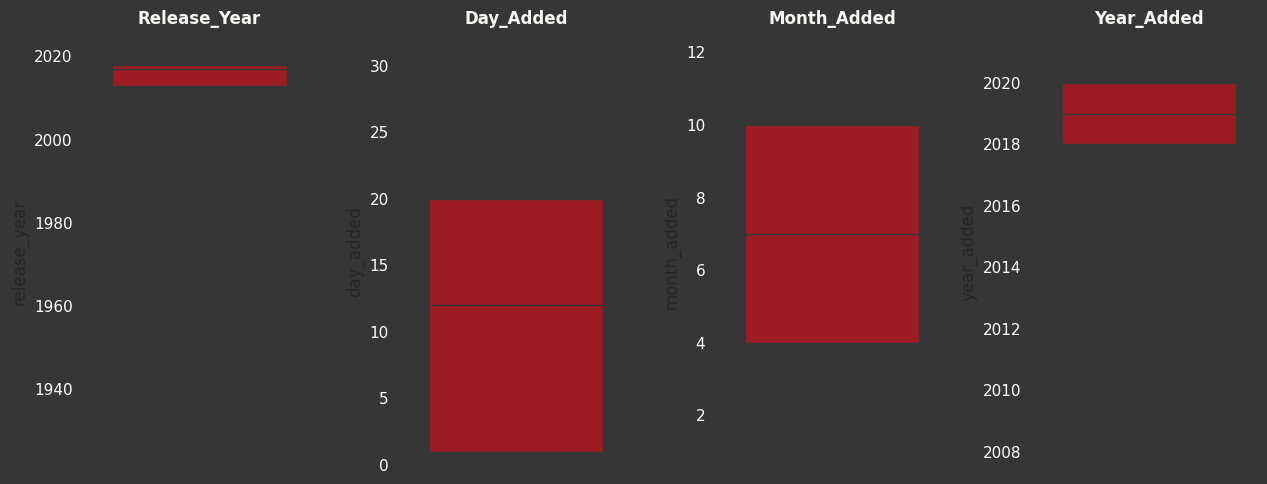

In [ ]:

# Define continuous value features
continuous_value_features = ["release_year", "day_added", "month_added", "year_added"]

# Set the background, axes, and grid color
plt.figure(figsize=(16, 5),facecolor = '#363636')
sns.set(style="darkgrid", palette="pastel", rc={"axes.facecolor": "#363636", "grid.color": "#363636", "axes.edgecolor": "#363636"})

# Loop through each continuous feature and create box plots
for i, column in enumerate(continuous_value_features):
    plt.subplot(1, 5, i + 1)
    sns.boxplot(data=netflix_df[column], color="#b20710", fliersize=5)
    plt.title(column.title(), weight='bold', color="#f5f5f1")
    plt.tick_params(axis='x', colors='white')
    plt.tick_params(axis='y', colors='white')
    plt.tight_layout()

plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

No Outliers Detected

### 3. Categorical Encoding

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here : Not Needed


### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Ensure 'description' column is of string type
netflix_df_new['description'] = netflix_df_new['description'].astype(str)

# Splitting the 'description' column into lists of words
netflix_df_new['description'] = netflix_df_new['description'].apply(lambda x: x.split(' '))

# Joining the lists of words back into strings
netflix_df_new['description'] = netflix_df_new['description'].apply(lambda x: " ".join(x))

#### 2. Lower Casing

In [ ]:
netflix_df_new['description']= netflix_df_new['description'].apply(lambda x: x.lower())

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)
# applying above function on text feature
netflix_df_new['description']= netflix_df_new['description'].apply(remove_punctuation)

In [ ]:
netflix_df_new['description'][0:10]

0    in a future where the elite inhabit an island ...
1    after a devastating earthquake hits mexico cit...
2    when an army recruit is found dead his fellow ...
3    in a postapocalyptic world ragdoll robots hide...
4    a brilliant group of students become cardcount...
5    a genetics professor experiments with a treatm...
6    after an awful accident a couple admitted to a...
7    after one of his high school students attacks ...
8    when a doctor goes missing his psychiatrist wi...
9    an architect and his wife move into a castle t...
Name: description, dtype: object

#### 4. Removing URLs & Removing words and digits contain digits.

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
sw=stopwords.words('english')
#Defining stopwords
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word for word in text.split() if word not in sw]
    # joining the list of words with space separator
    return " ".join(text)
# applying above function on text feature
netflix_df_new['description']=netflix_df_new['description'].apply(stopwords)
# this is how value in text looks like after removing stopwords
netflix_df_new['description'][0:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0    In future elite inhabit island paradise far cr...
1    After devastating earthquake hits Mexico City ...
2    When army recruit found dead fellow soldiers f...
3    In postapocalyptic world ragdoll robots hide f...
4    A brilliant group students become cardcounting...
5    A genetics professor experiments treatment com...
6    After awful accident couple admitted grisly ho...
7    After one high school students attacks dedicat...
8    When doctor goes missing psychiatrist wife tre...
9    An architect wife move castle slated become lu...
Name: description, dtype: object

#### 6. Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization
from nltk.tokenize import word_tokenize
from nltk.tokenize import wordpunct_tokenize
nltk.download('punkt')
def tokenizer(txt):
  tokens = word_tokenize(txt)

  return tokens
netflix_df_new['Processed Description'] = netflix_df_new['description'].apply(tokenizer)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
from nltk.stem import PorterStemmer,LancasterStemmer
ps = PorterStemmer()

def stem_text(text):
  stemmed = []
  for word in text:
    stemmed.append(ps.stem(word))
  return stemmed


netflix_df_new['Processed Description'] = netflix_df_new['Processed Description'] .apply(lambda x : stem_text(x))

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

#### 10. Text Vectorization

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# importing TfidVectorizer from sklearn library
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfmodel = TfidfVectorizer(max_features=5000)
X_tfidf = tfidfmodel.fit_transform(netflix_df_new['description'])
X_tfidf.shape

(7770, 5000)

In [ ]:
X = X_tfidf.toarray()

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
from sklearn.decomposition import PCA

# Assuming X is a numerical matrix
pca = PCA()
pca.fit(X)

# Obtain the transformed data using the fitted PCA instance
X_transformed = pca.transform(X)

# Specify the number of principal components to retain (e.g., 2)
pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X)

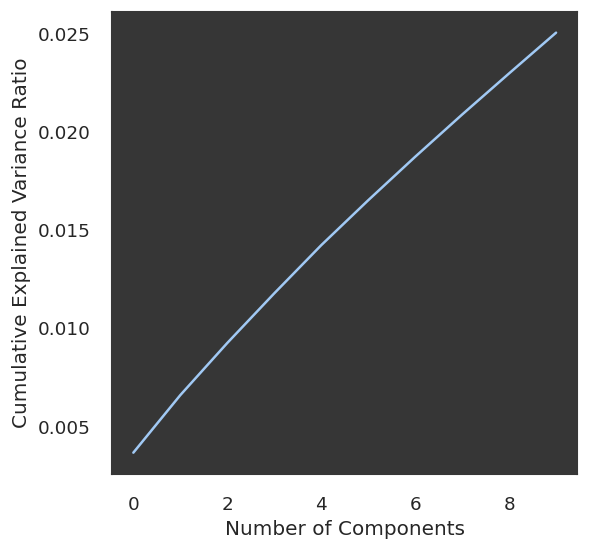

In [ ]:
pca = PCA(n_components=10)
pca.fit(X)
if hasattr(pca, 'explained_variance_ratio_'):
    cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)
    plt.figure(figsize=(5, 5), dpi=120)
    plt.plot(cumulative_var_ratio)
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.show()
else:
    print('PCA object has no attribute "explained_variance_ratio_"')

In [ ]:
pca_tuned = PCA(n_components=0.95)
pca_tuned.fit(X)
x = pca_tuned.transform(X)
print(x.shape)

(7770, 3300)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
from tabulate import tabulate
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def evaluate_clustering_model(model, X, y_predict):
    """
    Evaluate a clustering model and print the results.
    & Returns
    Model evaluation result
    """
    # Calculate the number of clusters and evaluation metrics
    n_clusters = len(set(y_predict))
    S_score = silhouette_score(X, y_predict)
    CH_score = calinski_harabasz_score(X, y_predict)
    DB_score = davies_bouldin_score(X, y_predict)

    # Print the evaluation results
    print(f"Number of clusters: {n_clusters}")
    print(f"Silhouette score: {S_score:.4f}")
    print(f"Calinski-Harabasz score: {CH_score:.4f}")
    print(f"Davies-Bouldin score: {DB_score:.4f}")

    # Create a dictionary to store the evaluation scores
    scores_dict = {"silhouette_score": S_score,
                   "calinski_harabasz_score": CH_score,
                   "davies_bouldin_score": DB_score}

    # Create a dataframe to display the evaluation results
    df_eval = pd.DataFrame({"Evaluation Metric": ["Silhouette Score",
                                                  "Calinski-Harabasz Score",
                                                  "Davies-Bouldin Score"],
                                     "Score": [S_score, CH_score, DB_score]})

    # Print the dataframe
    print(tabulate(df_eval, headers="keys", tablefmt="grid"))

    # Return the evaluation results
    return {"n_clusters": n_clusters,
            "silhouette_score": S_score,
            "calinski_harabasz_score": CH_score,
            "davies_bouldin_score": DB_score}

def plot_clustering_scores(scores_dict):
    """
    Plot the clustering evaluation scores using a bar chart.
    """
    # Extract the scores from the dictionary
    scores = [scores_dict["silhouette_score"], scores_dict["calinski_harabasz_score"], scores_dict["davies_bouldin_score"]]
    labels = ["Silhouette", "Calinski-Harabasz", "Davies-Bouldin"]

    # Plot the scores as a bar chart
    fig, ax = plt.subplots()
    ax.bar(labels, scores, color=["tab:blue", "tab:orange", "tab:green"])

    # Add labels and titles
    ax.set_xlabel("Evaluation Metric")
    ax.set_ylabel("Score")
    ax.set_title("Clustering Evaluation Scores")

    # Set the y-axis limits to the range of the scores
    ax.set_ylim([np.min(scores) - 0.1, np.max(scores) + 0.1])

    # Display the plot
    plt.show()

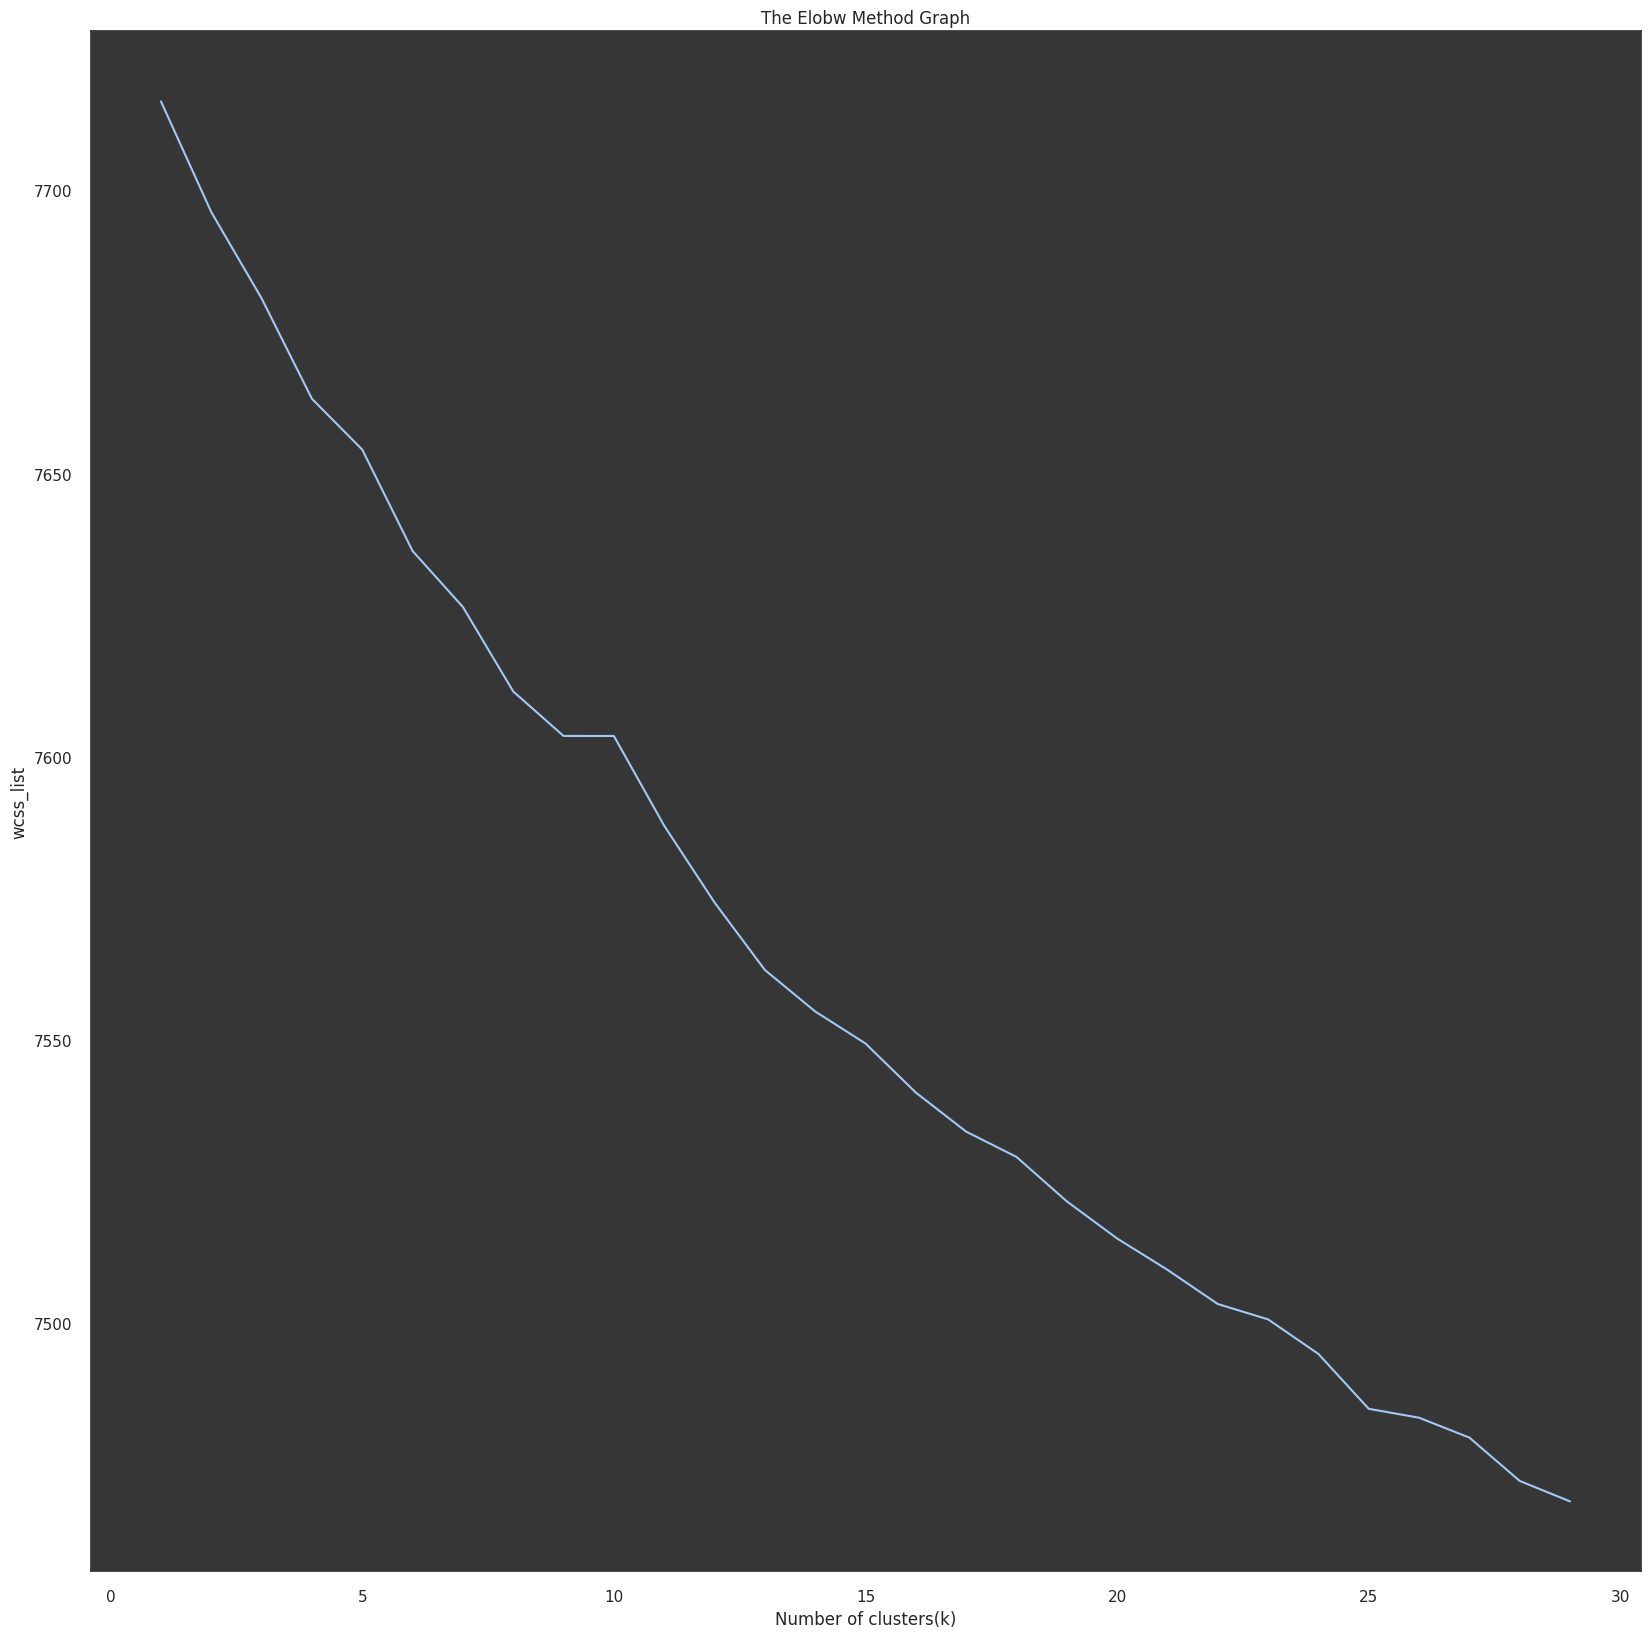

In [ ]:
# ML Model - 1 Implementation
#finding optimal number of clusters using the elbow method
from sklearn.cluster import KMeans
wcss_list= []  #Initializing the list for the values of WCSS

#Using for loop for iterations from 1 to 30.
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss_list)
plt.title('The Elobw Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
#sillhoute score of clusters
sill = []
for i in range(2,30):
    model = KMeans(n_clusters=i,init ='k-means++',random_state=51)
    model.fit(X)
    y1 = model.predict(X)
    score = silhouette_score(X,y1)
    sill.append(score)
    print('cluster: %d \t Sillhoute: %0.4f'%(i,score))

cluster: 2 	 Sillhoute: 0.0023
cluster: 3 	 Sillhoute: 0.0020
cluster: 4 	 Sillhoute: 0.0024
cluster: 5 	 Sillhoute: 0.0030
cluster: 6 	 Sillhoute: 0.0031
cluster: 7 	 Sillhoute: 0.0038
cluster: 8 	 Sillhoute: 0.0042
cluster: 9 	 Sillhoute: 0.0042
cluster: 10 	 Sillhoute: 0.0049
cluster: 11 	 Sillhoute: 0.0055
cluster: 12 	 Sillhoute: 0.0054
cluster: 13 	 Sillhoute: 0.0056
cluster: 14 	 Sillhoute: 0.0063
cluster: 15 	 Sillhoute: 0.0058
cluster: 16 	 Sillhoute: 0.0063
cluster: 17 	 Sillhoute: 0.0064
cluster: 18 	 Sillhoute: 0.0066
cluster: 19 	 Sillhoute: 0.0067
cluster: 20 	 Sillhoute: 0.0067
cluster: 21 	 Sillhoute: 0.0068
cluster: 22 	 Sillhoute: 0.0074
cluster: 23 	 Sillhoute: 0.0070
cluster: 24 	 Sillhoute: 0.0067
cluster: 25 	 Sillhoute: 0.0070
cluster: 26 	 Sillhoute: 0.0073
cluster: 27 	 Sillhoute: 0.0075
cluster: 28 	 Sillhoute: 0.0080
cluster: 29 	 Sillhoute: 0.0071


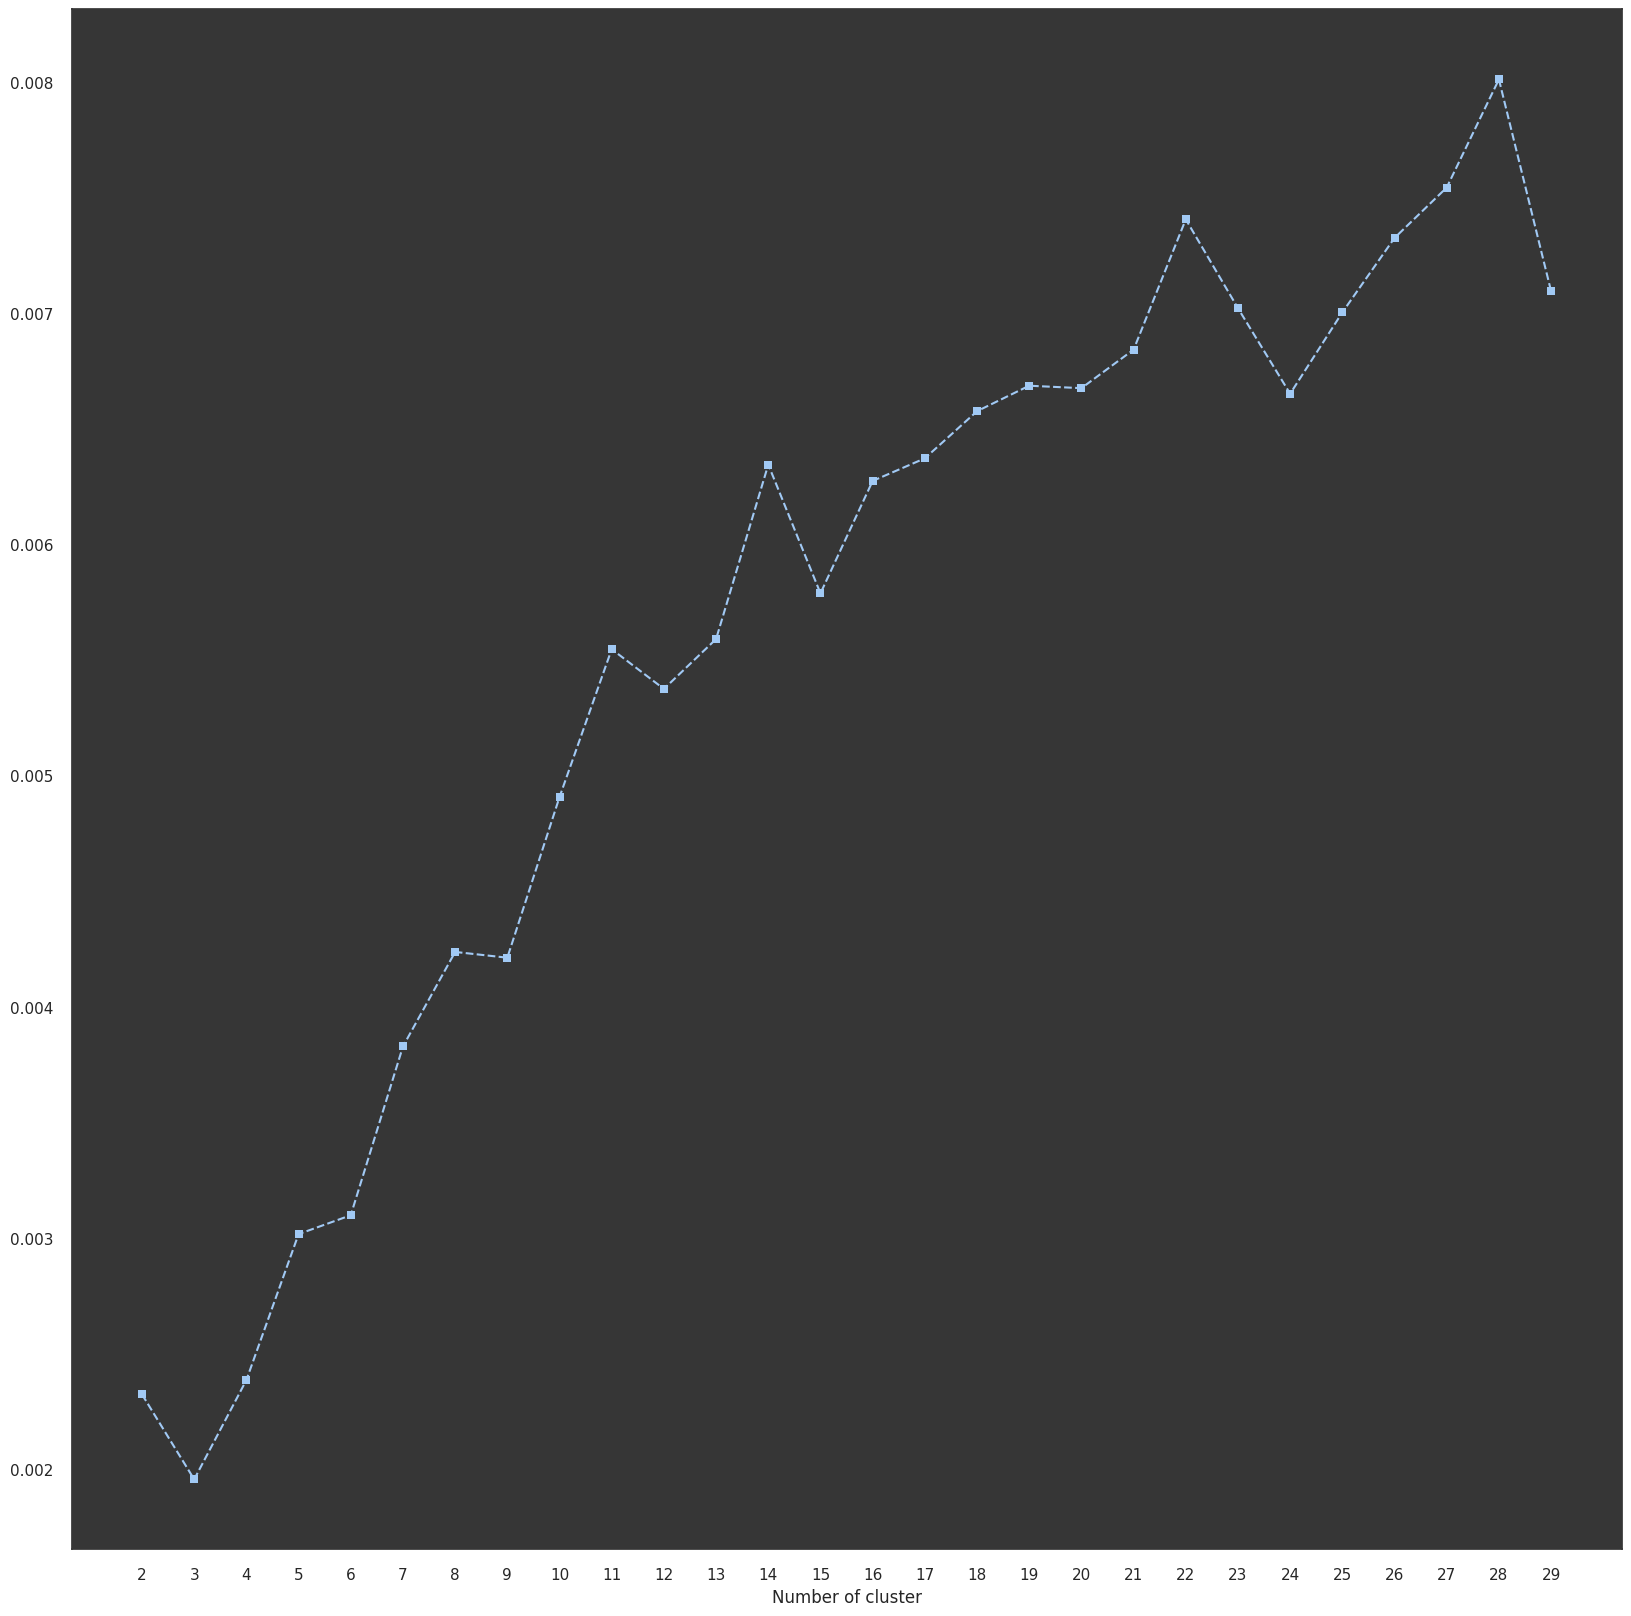

In [ ]:
#Plotting Sillhoute's score
plt.plot(sill,'bs--')
plt.xticks(list(range(0,28)),list(range(2,30)))
plt.grid(),plt.xlabel('Number of cluster')
plt.show()

In [ ]:
#training the K-means model on a dataset
kmeans = KMeans(n_clusters= 26, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(X)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
score = silhouette_score(X, y_predict)
print("Silhouette score is {}".format(score))

Silhouette score is 0.007299805533340128


In [ ]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, y_predict)

9.421364672096342

In [ ]:
netflix_df_new["cluster"] = y_predict
netflix_df_new['cluster'].value_counts()

cluster
2     2322
14     411
17     357
25     352
4      335
8      283
16     274
10     268
1      262
21     260
7      240
15     225
19     207
3      190
13     176
6      174
11     169
9      162
0      156
12     146
5      140
22     139
23     138
18     138
24     133
20     113
Name: count, dtype: int64

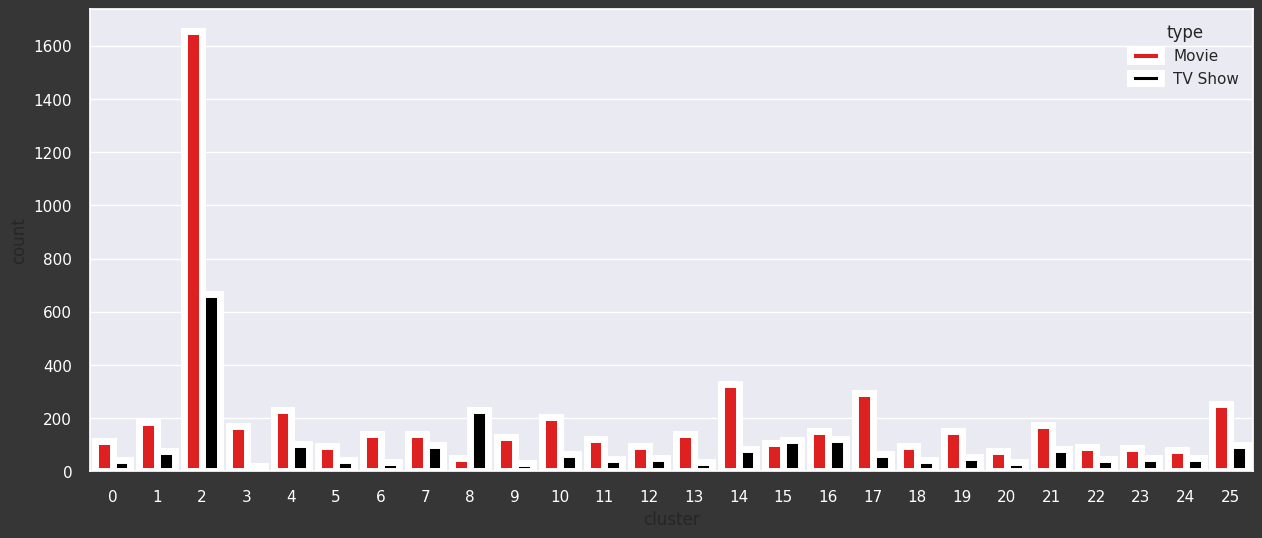

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style and palette
sns.set_style("darkgrid")  # Remove gridlines
colors = ['red', 'black']  # Red and white colors for bars
sns.set_palette(sns.color_palette(colors))

# Assuming netflix_df_new contains your DataFrame and 'cluster' and 'type' are columns
fig, ax = plt.subplots(figsize=(15, 6), facecolor='#363636')
sns.countplot(x='cluster', hue='type', lw=5, data=netflix_df_new, ax=ax)

# Customize axis colors
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.show()

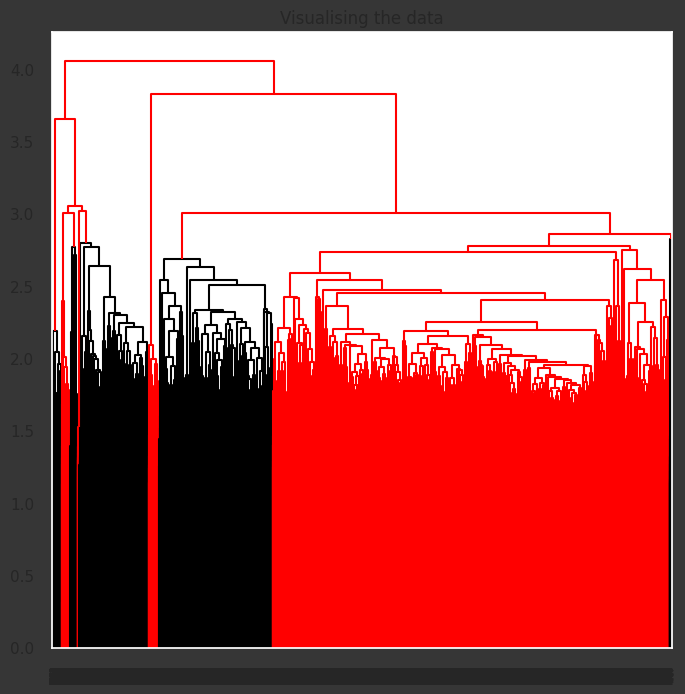

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize =(8, 8),facecolor = '#363636')
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X, method ='ward')))

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

Hierarchical clustering is a clustering algorithm that organizes similar data points into clusters by recursively merging or dividing clusters based on their similarity or distance from each other.

To explore hierarchical clustering, we'll start by plotting a dendrogram, which visualizes the hierarchical structure of the data. From there, we'll determine the optimal number of clusters based on the dendrogram's structure and characteristics.

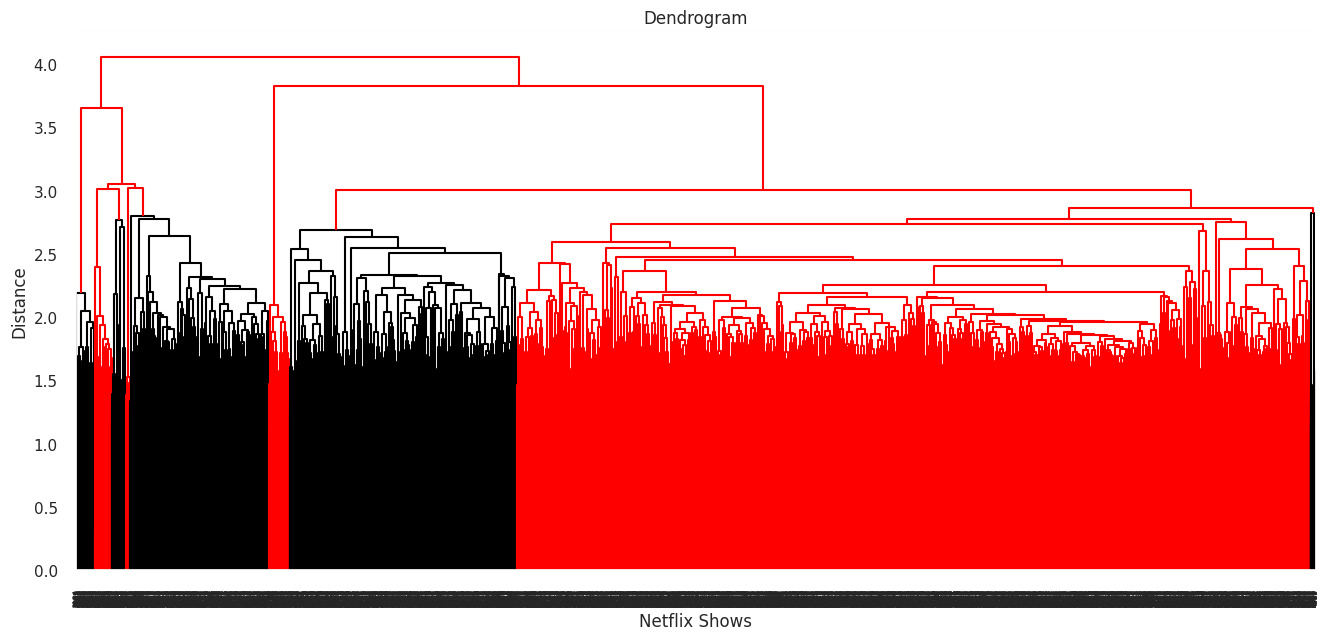

In [ ]:
# Visualizing evaluation Metric Score chart
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(16, 7),facecolor = '#363636')
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 5, color='r', linestyle='--')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# ML Model - 2  Implementation
# Initialize the hierarchical model with the chosen number of clusters
hierarchical_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hierarchical = hierarchical_model.fit_predict(X)# Fit and predict on the model
hierarchical_labels = hierarchical_model.labels_  # Get the cluster labels for each point in the data
unique_labels_h = np.unique(hierarchical_labels)  # Get the unique cluster labels
silhouette_avg = silhouette_score(X, hierarchical_labels)   # Calculate the silhouette score
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : -0.0011696832694354472


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

In [ ]:
scores_dict_hierarchical = evaluate_clustering_model(hierarchical_model, X, y_hierarchical)

Number of clusters: 5
Silhouette score: -0.0012
Calinski-Harabasz score: 6.7943
Davies-Bouldin score: 15.1312
+----+-------------------------+-------------+
|    | Evaluation Metric       |       Score |
+====+=========================+=============+
|  0 | Silhouette Score        | -0.00116968 |
+----+-------------------------+-------------+
|  1 | Calinski-Harabasz Score |  6.7943     |
+----+-------------------------+-------------+
|  2 | Davies-Bouldin Score    | 15.1312     |
+----+-------------------------+-------------+


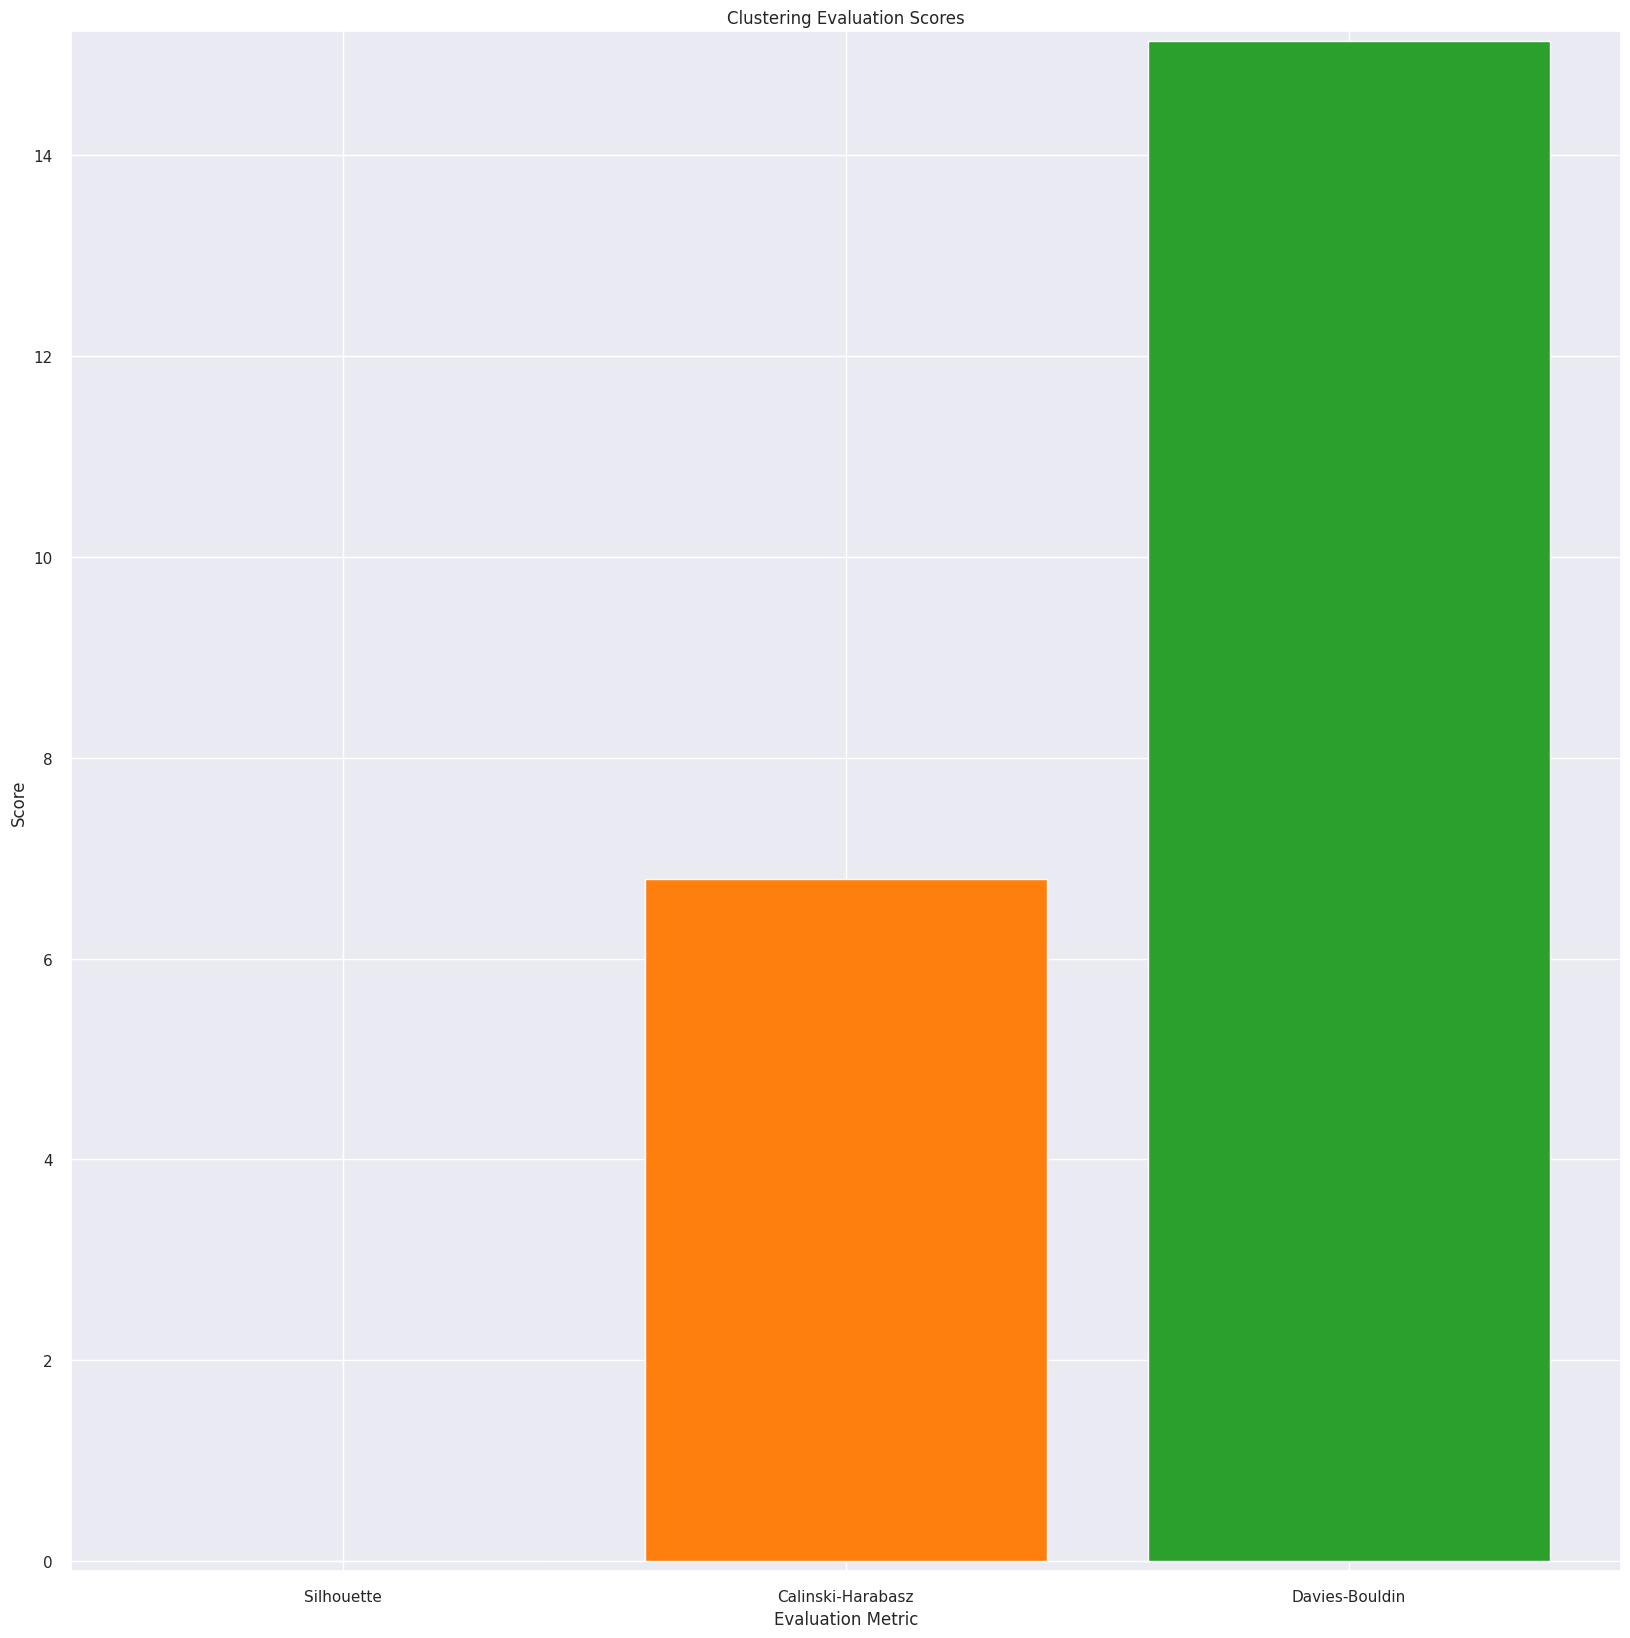

In [ ]:
plot_clustering_scores(scores_dict_hierarchical)

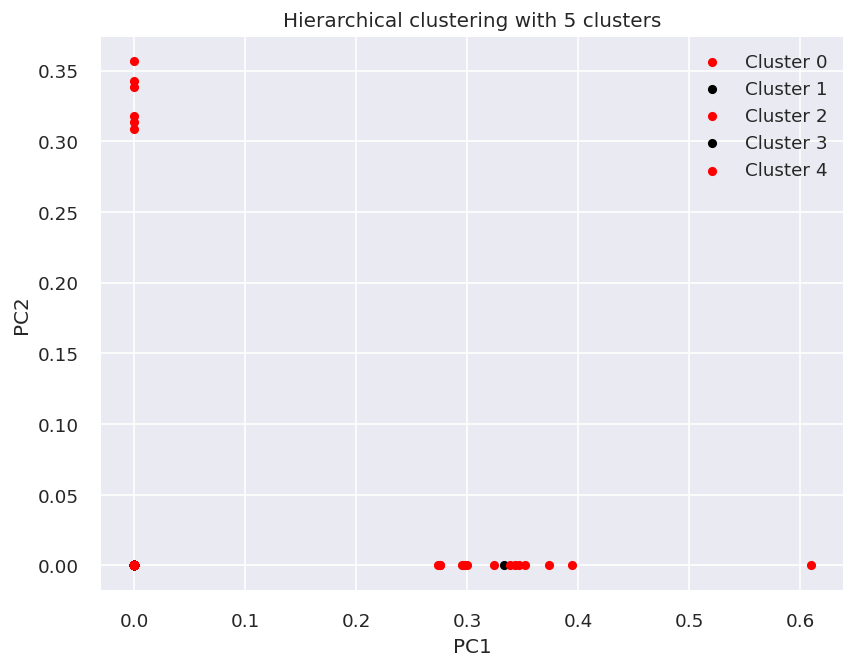

In [ ]:

# Create a scatter plot of the data colored by cluster label
plt.figure(figsize=(8, 6), dpi=120)
for i in unique_labels_h:
    plt.scatter(X[hierarchical_labels == i, 0], X[hierarchical_labels == i, 1], s=20, label='Cluster {}'.format(i))
#plt.scatter(hierarchical_model.cluster_centers_[:, 0], hierarchical_model.cluster_centers_[:, 1], s=100, marker='x', c='black')
plt.title('Hierarchical clustering with {} clusters'.format(len(unique_labels_h)))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Let's just again define a function that plots wordcloud for different attributes using Agglomerative Clustering.

In [ ]:
from wordcloud import STOPWORDS

STOPWORDS.update(['movie', 'show', 'series', 'film', 'watch', 'watching']) # Add custom stopwords

In [ ]:
netflix_df_new['hierarchical_cluster'] = hierarchical_labels

In [ ]:
def hierarchical_wordcloud(cluster_number, column_name):

  '''function for Building a wordcloud for the movie/shows'''

  # Filter the data by the specified cluster number and column name
  df_wordcloud = netflix_df_new[['hierarchical_cluster', column_name]].dropna()
  df_wordcloud = df_wordcloud[df_wordcloud['hierarchical_cluster'] == cluster_number]

  # Combine all text documents into a single string
  text = " ".join(word for word in df_wordcloud[column_name])

  # Create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)

  # Return the word cloud object
  return wordcloud


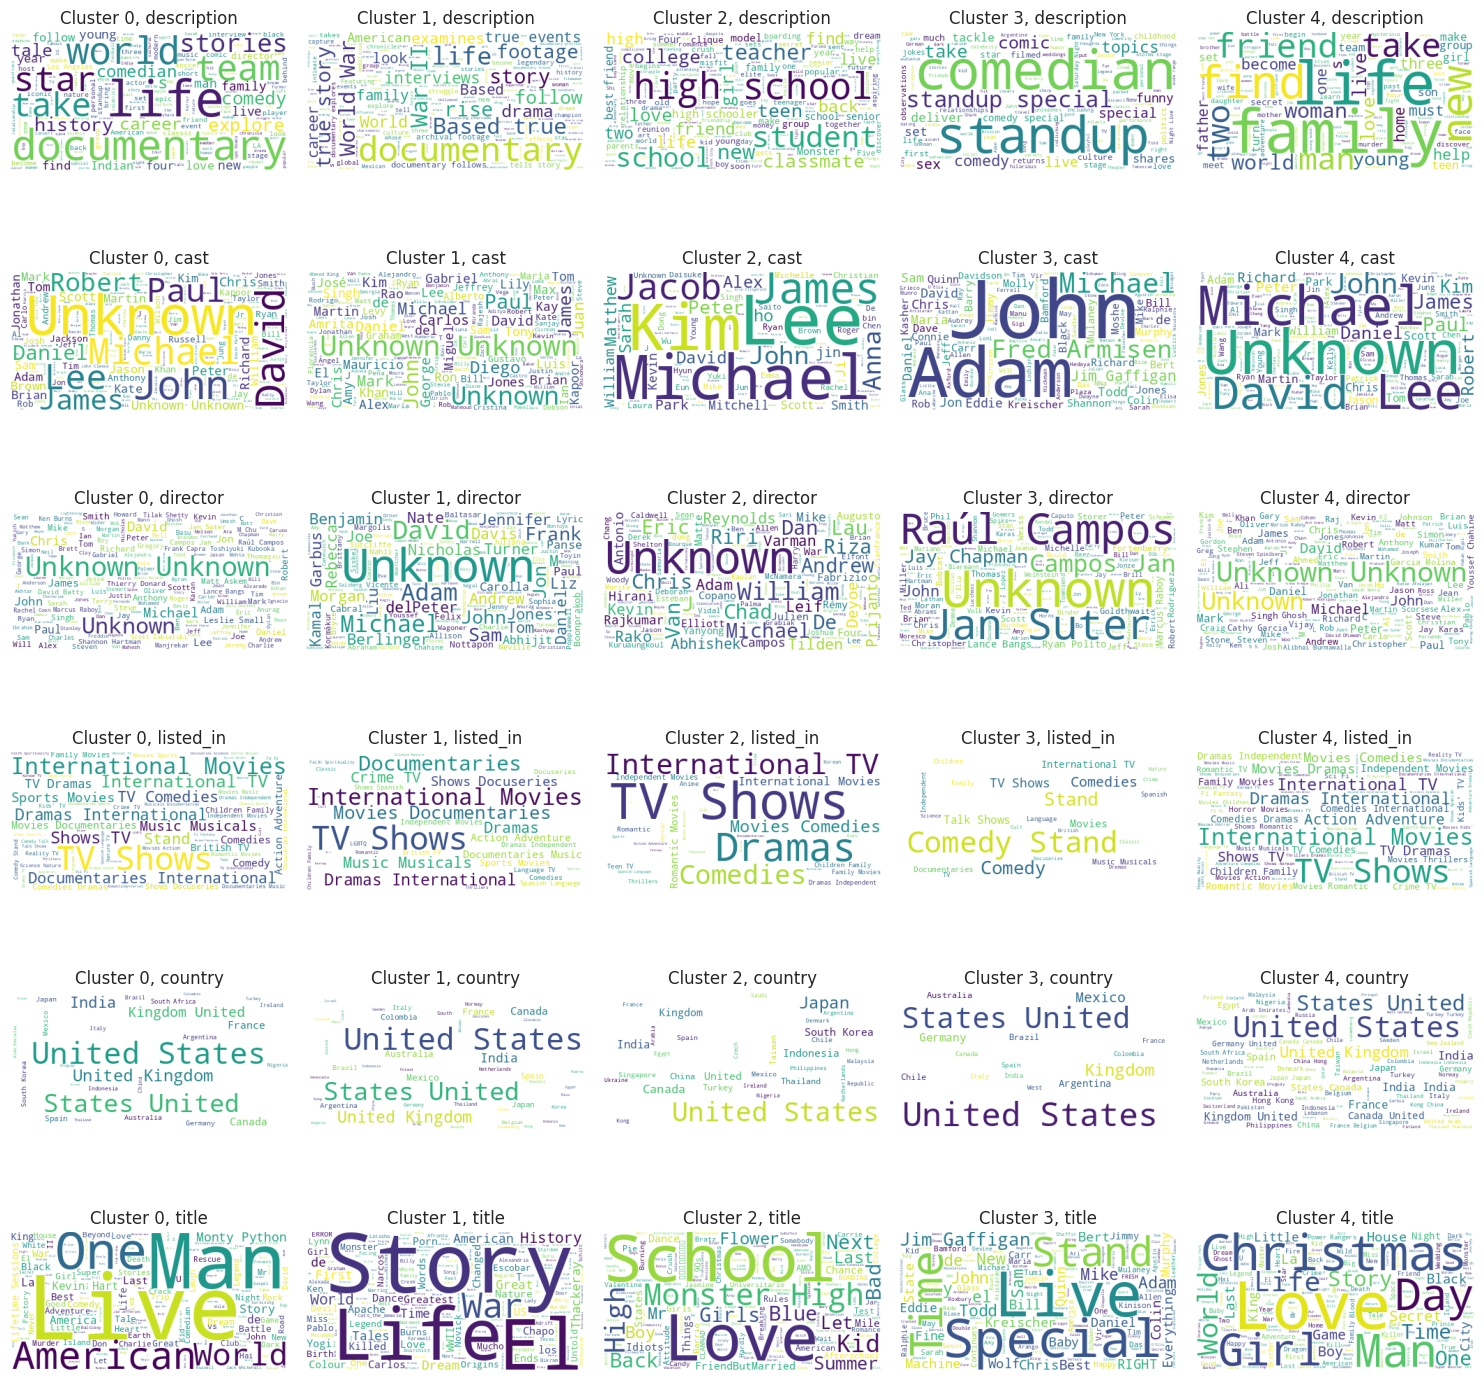

In [ ]:
fig, axs = plt.subplots(nrows=6, ncols=5, figsize=(15, 15))

for i in range(5):
    for j, col in enumerate(['description', 'cast', 'director', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(hierarchical_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}')

plt.tight_layout()
plt.show()

### ML Model - 3

We've opted for Cosine similarity as our similarity measure because it assesses the similarity between two non-zero vectors in a multi-dimensional space. This metric calculates the cosine of the angle between the vectors, ranging from -1 (opposite direction) to 1 (same direction), with 0 indicating orthogonality (perpendicular vectors).

In this project, we utilize Cosine similarity to evaluate the similarity between documents or pieces of text. Documents are represented as vectors in a high-dimensional space, with each dimension representing a word or term in the corpus. By computing the cosine similarity between these vectors, we gauge the similarity of the documents based on their word usage.

We prefer Cosine similarity over tf-idf for the following reasons:

- **Handling Sparse Data**: Cosine similarity performs better with high-dimensional sparse data, which is common in text analysis.
  
- **Capturing Text Meaning**: Cosine similarity better captures the semantic meaning of text compared to tf-idf. For instance, even if two items contain similar words but in different orders, cosine similarity would still consider them similar, whereas tf-idf may not. This is because tf-idf solely focuses on the frequency of words in a document and does not account for their order or semantics.

In [ ]:
# Create a TF-IDF vectorizer object and transform the text data
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(netflix_df_new['Processed Description'].apply(lambda x: ' '.join(x)))

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)

def generate_recommendations(title, cosine_sim=cosine_sim, data=netflix_df_new):
    # Get the index of the input title in the programme_list
    programme_list = data['title'].to_list()
    index = programme_list.index(title)

    # Create a list of tuples containing the similarity score and index
    # between the input title and all other programmes in the dataset
    sim_scores = list(enumerate(cosine_sim[index]))

    # Sort the list of tuples by similarity score in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]

    # Get the recommended movie titles and their similarity scores
    recommend_index = [i[0] for i in sim_scores]
    rec_movie = data['title'].iloc[recommend_index]
    rec_score = [round(i[1], 4) for i in sim_scores]

    # Create a pandas DataFrame to display the recommendations
    rec_table = pd.DataFrame(list(zip(rec_movie, rec_score)),
                             columns=['Recommended movie', 'Similarity score (0-1)'])

    return rec_table

In [ ]:
generate_recommendations('Stranger Things')

Recommended movie  Similarity score (0-1)
0     Big Stone Gap                  0.2421
1            The OA                  0.2412
2     Rowdy Rathore                  0.2314
3         FirstBorn                  0.2236
4           Requiem                  0.2078
5   Sakho & Mangane                  0.2062
6        The Search                  0.2019
7    Bitter Daisies                  0.1964
8       Broadchurch                  0.1916
9       The Society                  0.1866

In [ ]:
generate_recommendations('Phir Hera Pheri')

Recommended movie  Similarity score (0-1)
0                       Immortals                  0.2129
1           Ek Khiladi Ek Haseena                  0.2076
2                          Ringan                  0.1948
3                      Two Graves                  0.1763
4                Jora 10 Numbaria                  0.1714
5                Bhaji In Problem                  0.1526
6  House at the End of the Street                  0.1270
7            When I See You Again                  0.1270
8       Days We Stared at the Sun                  0.1268
9                      First Kiss                  0.1241

In [ ]:
generate_recommendations('Black Panther')

Recommended movie  Similarity score (0-1)
0                                    John Henry                  0.1600
1                                          Cake                  0.1531
2                        Jarhead: Law of Return                  0.1506
3                                 Project Power                  0.1450
4                       The Angry Birds Movie 2                  0.1347
5                         Daughters of the Dust                  0.1341
6                         Who Killed Malcolm X?                  0.1340
7                                   Almost Love                  0.1299
8                                    The Writer                  0.1277
9  Naruto Shippûden the Movie: The Will of Fire                  0.1262

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

We opted for the **Silhouette Score** as our evaluation metric instead of the **Distortion Score** (also known as inertia or sum of squared distances). The Silhouette Score measures how well each data point in a cluster is separated from other clusters, ranging from -1 to 1. Higher values indicate better cluster separation.

Advantages of using Silhouette Score over Distortion Score:

- **Consideration of Cohesion and Separation**: Silhouette Score considers both cohesion (similarity of data points within a cluster) and separation (dissimilarity of data points between clusters), whereas Distortion Score only evaluates the compactness of each cluster.
- **Less Sensitivity to Cluster Shape**: Silhouette Score is less sensitive to the shape of clusters compared to Distortion Score, which tends to favor spherical clusters. This is beneficial when dealing with non-spherical clusters, as in our case.
- **Intuitive Interpretation**: Silhouette Score assigns a score to each data point, providing more intuitive and interpretable results, whereas Distortion Score provides a single value for the entire clustering solution, which may be less informative.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We've selected **K-means** as our final model due to its comparatively high Silhouette Score in clustering and the well-separated clusters observed in three dimensions.

K-means offers several advantages over other clustering methods:

- **Speed**: K-means is typically faster than hierarchical clustering, particularly with large datasets, as it involves fewer computations and iterations.
  
- **Ease of Use**: Implementing and interpreting K-means is relatively straightforward, requiring minimal parameters (e.g., number of clusters) and resulting in clear data partitioning.
  
- **Scalability**: K-means is well-suited for datasets with numerous variables or dimensions, handling them efficiently. In contrast, hierarchical clustering becomes computationally demanding as data points and dimensions increase.
  
- **Cluster Independence**: K-means generates non-overlapping clusters, which can be advantageous for certain applications. In contrast, hierarchical clustering may produce overlapping or nested clusters, which may not always be desirable.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

1. It's intriguing to note that the majority of Netflix's content comprises movies.
2. However, in recent years, there's been a noticeable shift towards prioritizing TV shows.
3. A significant portion of these releases tends to occur either at the end or beginning of the year.
4. The top 5 countries contributing to the platform's content include the United States and India.
5. Notably, six out of the top ten actors with the most content are of Indian origin.
6. The TV-MA rating appears to be the most prevalent, suggesting a preference for mature content on Netflix.
7. Through analysis, it was determined that utilizing k=10 yields optimal clustering results, resulting in ten distinct clusters.
8. Leveraging cosine similarity, a simple recommender system was developed to provide recommendations for both movies and TV shows based on the provided data.

**Future Scope**

1. By integrating this dataset with external datasets like IMDB ratings and Rotten Tomatoes, numerous intriguing insights could be uncovered. This could enhance our understanding of content quality, audience reception, and overall viewer preferences.
2. Investing additional time in refining the recommender system could lead to significant improvements. A more sophisticated model could be developed and deployed on the web, offering users personalized recommendations tailored to their tastes and preferences. This could enhance the user experience and increase engagement with the platform.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***